# Every shot Kobe Bryant ever took. All 30,699 of them

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import seaborn as sns
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns',1000)

In [2]:
# set headers, otherwise the API may not return what we're looking for
HEADERS = {'user-agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) '
                          'AppleWebKit/537.36 (KHTML, like Gecko) '
                          'Chrome/45.0.2454.101 Safari/537.36'),
           'referer': 'http://stats.nba.com/scores/'
          }

In [14]:
# Get all Kobe shot data from 1996 to 2016 and put it into an array
# This player ID comes from stats.nba.com (http://stats.nba.com/player/#!/977/stats/)
playerID = "977"
seasons = []
for season in range(1996,2016):
    # The stats.nba.com API wants season as "1996-97"
    seasonString = str(season) + '-' + str(season+1)[2:]

    # The stats.nba.com endpoint we are using is http://stats.nba.com/stats/shotchartdetail
    # More info on endpoints: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=' + seasonString + '&AheadBehind=&PlayerID='+ playerID +'&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID='
    response = requests.get(shot_chart_url, headers=HEADERS)
    
    # Split response into headers and content
    headers = response.json()['resultSets'][0]['headers']
    shots = response.json()['resultSets'][0]['rowSet']

    # Create pandas dataframe to hold the data
    shot_df = pd.DataFrame(shots, columns=headers)

    # add extra column for season
    shot_df['SEASON'] = seasonString

    # add extra column for playoff flag
    shot_df['playoffs'] = 0
    
    seasons.append(shot_df)
    

# Do the same thing for all the playoff shots
for season in range(1996,2016):
    seasonString = str(season) + '-' + str(season+1)[2:]

    # This URL is the same except for the parameter SeasonType=Playoffs
    shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?CFID=&CFPARAMS=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&EndPeriod=10&EndRange=28800&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&PlayerID='+ playerID +'&Position=&RangeType=0&RookieYear=&Season=' + str(season) + '-' + str(season+1)[2:] + '&SeasonSegment=&SeasonType=Playoffs&StartPeriod=1&StartRange=0&TeamID=1610612747&VsConference=&VsDivision='
    response = requests.get(shot_chart_url, headers=HEADERS)
    
    headers = response.json()['resultSets'][0]['headers']
    shots = response.json()['resultSets'][0]['rowSet']
    
    shot_df = pd.DataFrame(shots, columns=headers)
    shot_df['SEASON'] = str(season) + '-' + str(season+1)[2:]
    shot_df['playoffs'] = 1
    
    seasons.append(shot_df)

In [15]:
# combine all season and playoffs dataframes into one dataframe
kobe_all_shots = pd.concat(seasons)

# dump a csv file
# kobe_all_shots.to_csv("kobe_all_shots.csv)

In [76]:
# This number is two shots lower than it should be because two shots are missing from the data
len(kobe_all_shots)

30697

In [77]:
kobe_all_shots.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,SEASON,playoffs,COMBINED_SHOT_TYPE
0,Shot Chart Detail,0029600027,102.0,977.0,Kobe Bryant,1.610613e+09,Los Angeles Lakers,1.0,0.0,42.0,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18.0,-140.0,116.0,1.0,0.0,1996-97,0,Jump Shot
1,Shot Chart Detail,0029600031,127.0,977.0,Kobe Bryant,1.610613e+09,Los Angeles Lakers,2.0,10.0,8.0,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16.0,-131.0,97.0,1.0,0.0,1996-97,0,Jump Shot
2,Shot Chart Detail,0029600044,124.0,977.0,Kobe Bryant,1.610613e+09,Los Angeles Lakers,2.0,8.0,37.0,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23.0,-142.0,181.0,1.0,1.0,1996-97,0,Jump Shot
3,Shot Chart Detail,0029600044,144.0,977.0,Kobe Bryant,1.610613e+09,Los Angeles Lakers,2.0,6.0,34.0,Missed Shot,Jump Shot,3PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0.0,0.0,0.0,1.0,0.0,1996-97,0,Jump Shot
4,Shot Chart Detail,0029600044,151.0,977.0,Kobe Bryant,1.610613e+09,Los Angeles Lakers,2.0,5.0,27.0,Made Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13.0,-10.0,138.0,1.0,1.0,1996-97,0,Jump Shot


In [17]:
# Combine NBA's very specific shot type descriptions into broader categories for filtering
#combine shot types
kobe_all_shots['COMBINED_SHOT_TYPE'] = kobe_all_shots['ACTION_TYPE']

kobe_all_shots.replace(to_replace={
        'COMBINED_SHOT_TYPE': {
            '(.+)?Jump (.+)?(S|s)hot':'Jump Shot',
            '(.+)?Fadeaway(.+)?':'Jump Shot',
            '(.+)?Dunk Shot':'Dunk',
            '(.+)?Layup (S|s)hot': "Layup",
            '(.+)?Hook.+':"Hook Shot",
            '(.+)?Tip.+':"Tip Shot",
            '(.+)?Bank.+':"Bank Shot",
            '(.+)?Finger Roll.+':"Layup"
        }
    }, regex=True, inplace=True)
kobe_all_shots.COMBINED_SHOT_TYPE.value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: COMBINED_SHOT_TYPE, dtype: int64

In [18]:
# Draw the court — this code comes from Savvas Tjortjoglou (http://savvastjortjoglou.com/nba-shot-sharts.html)
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

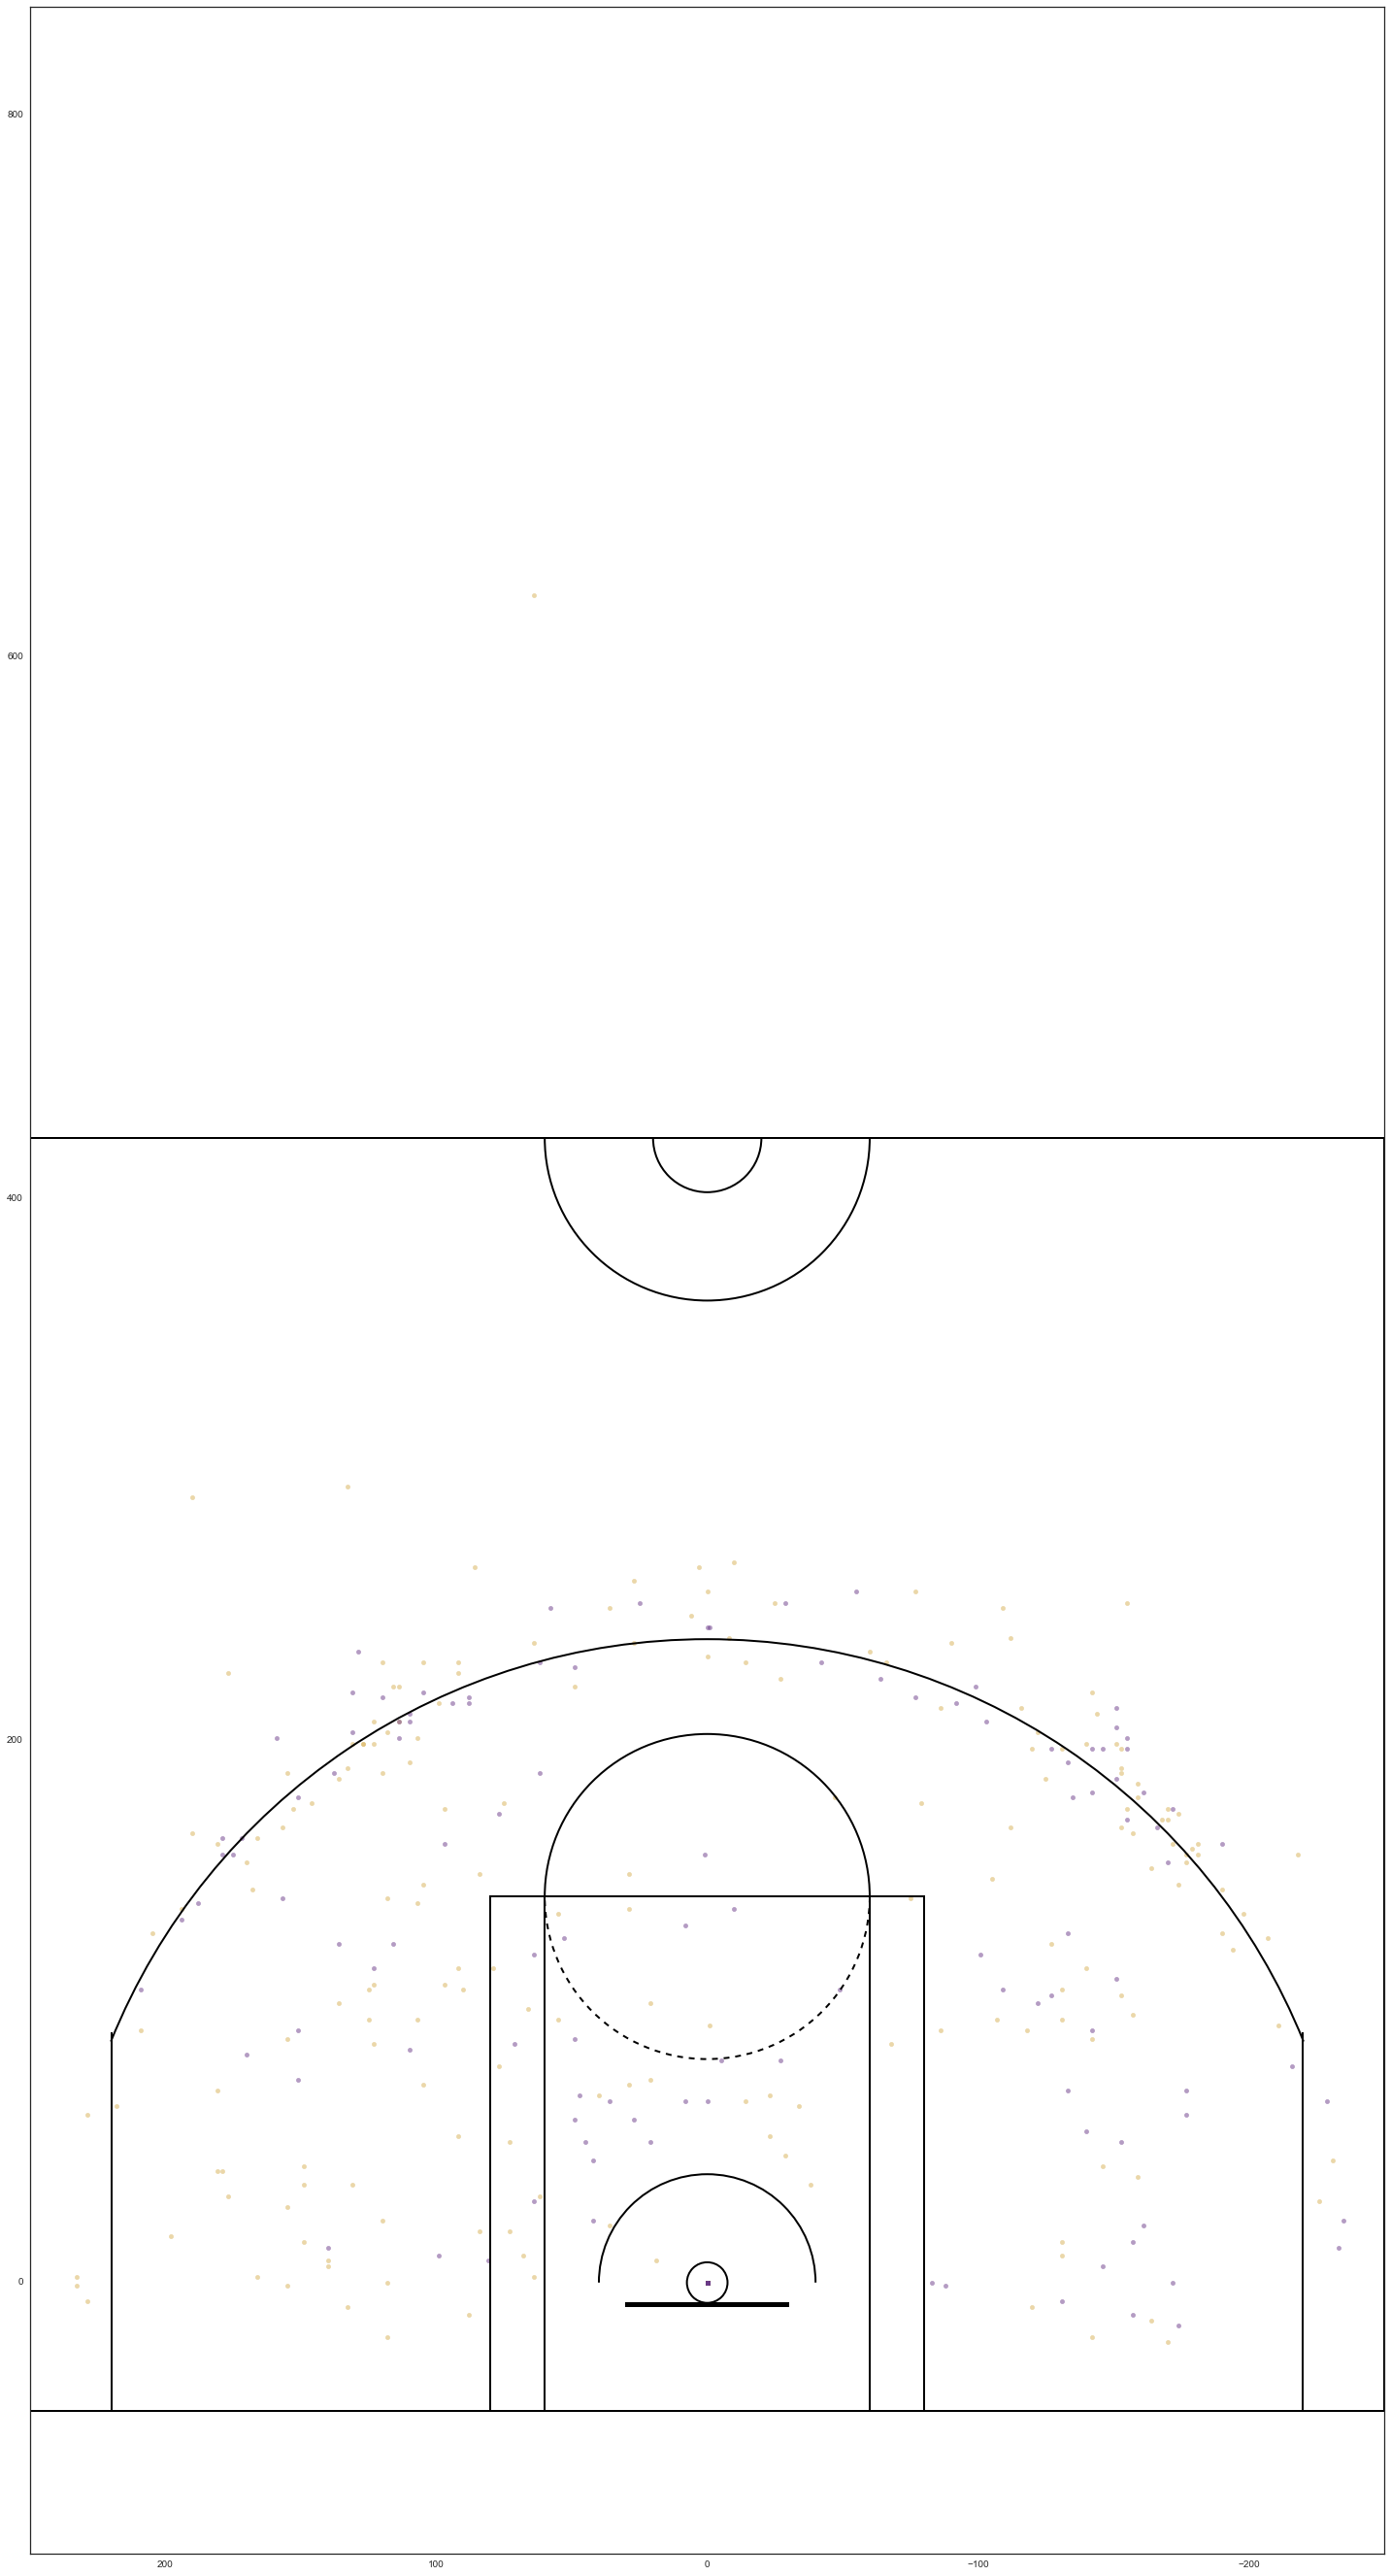

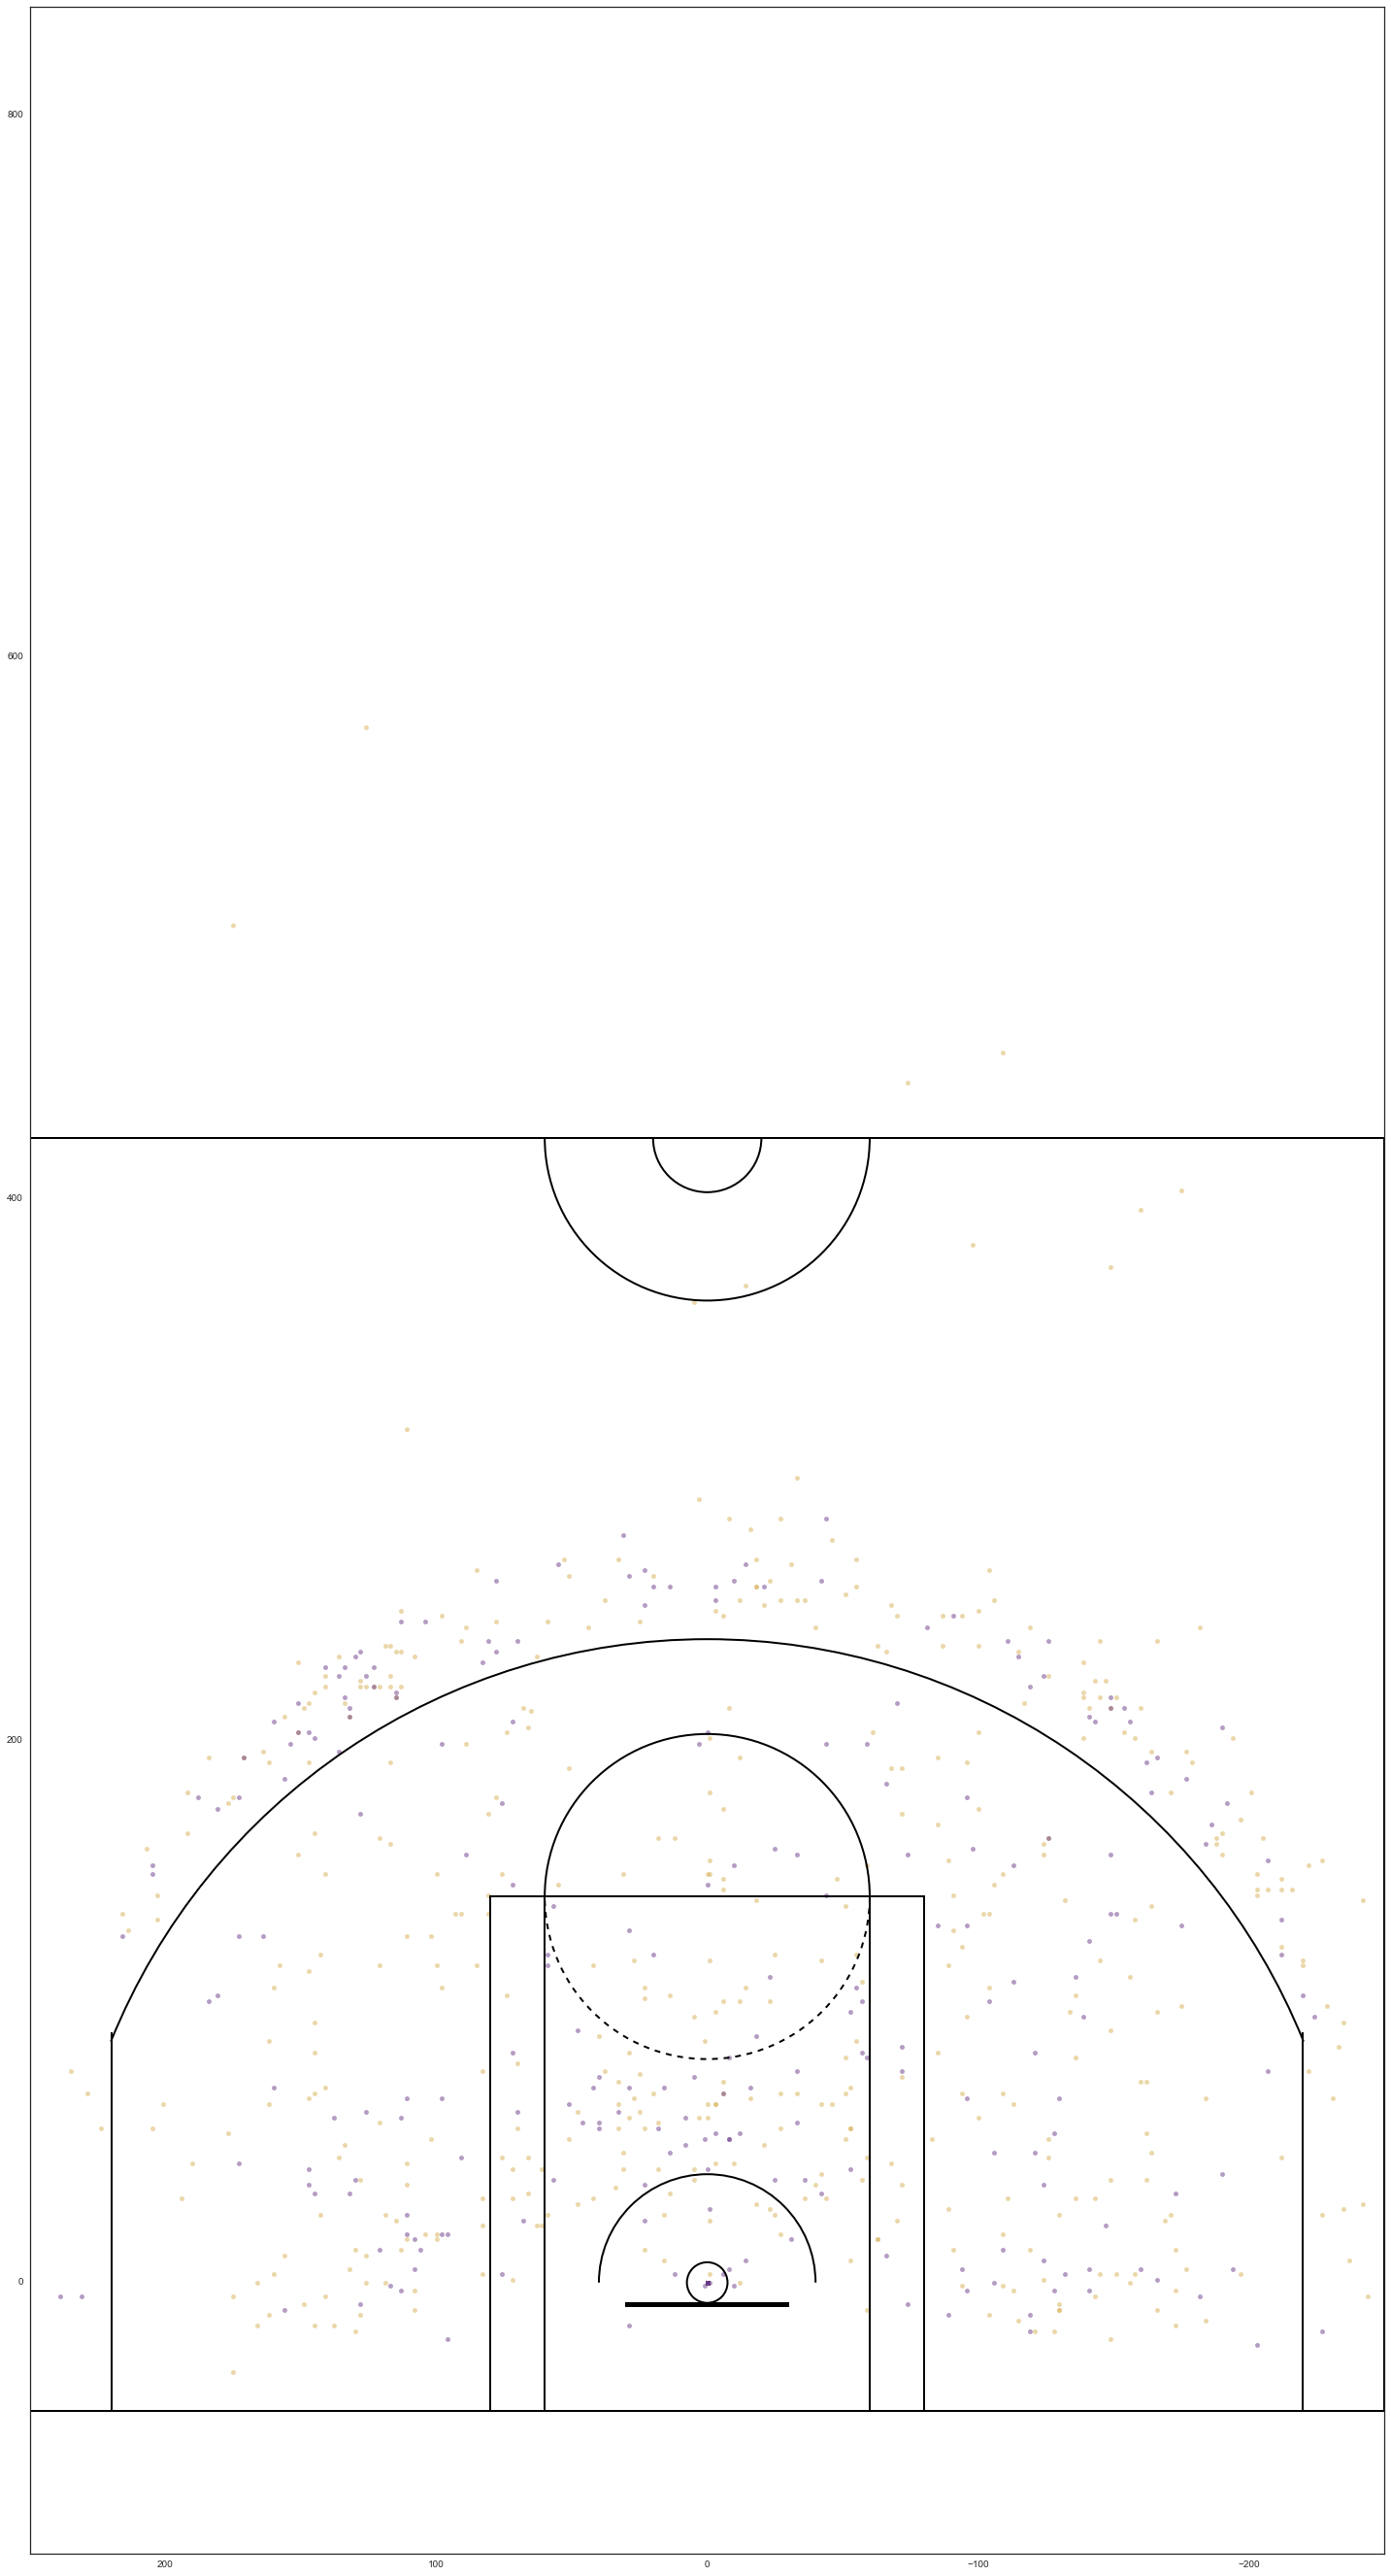

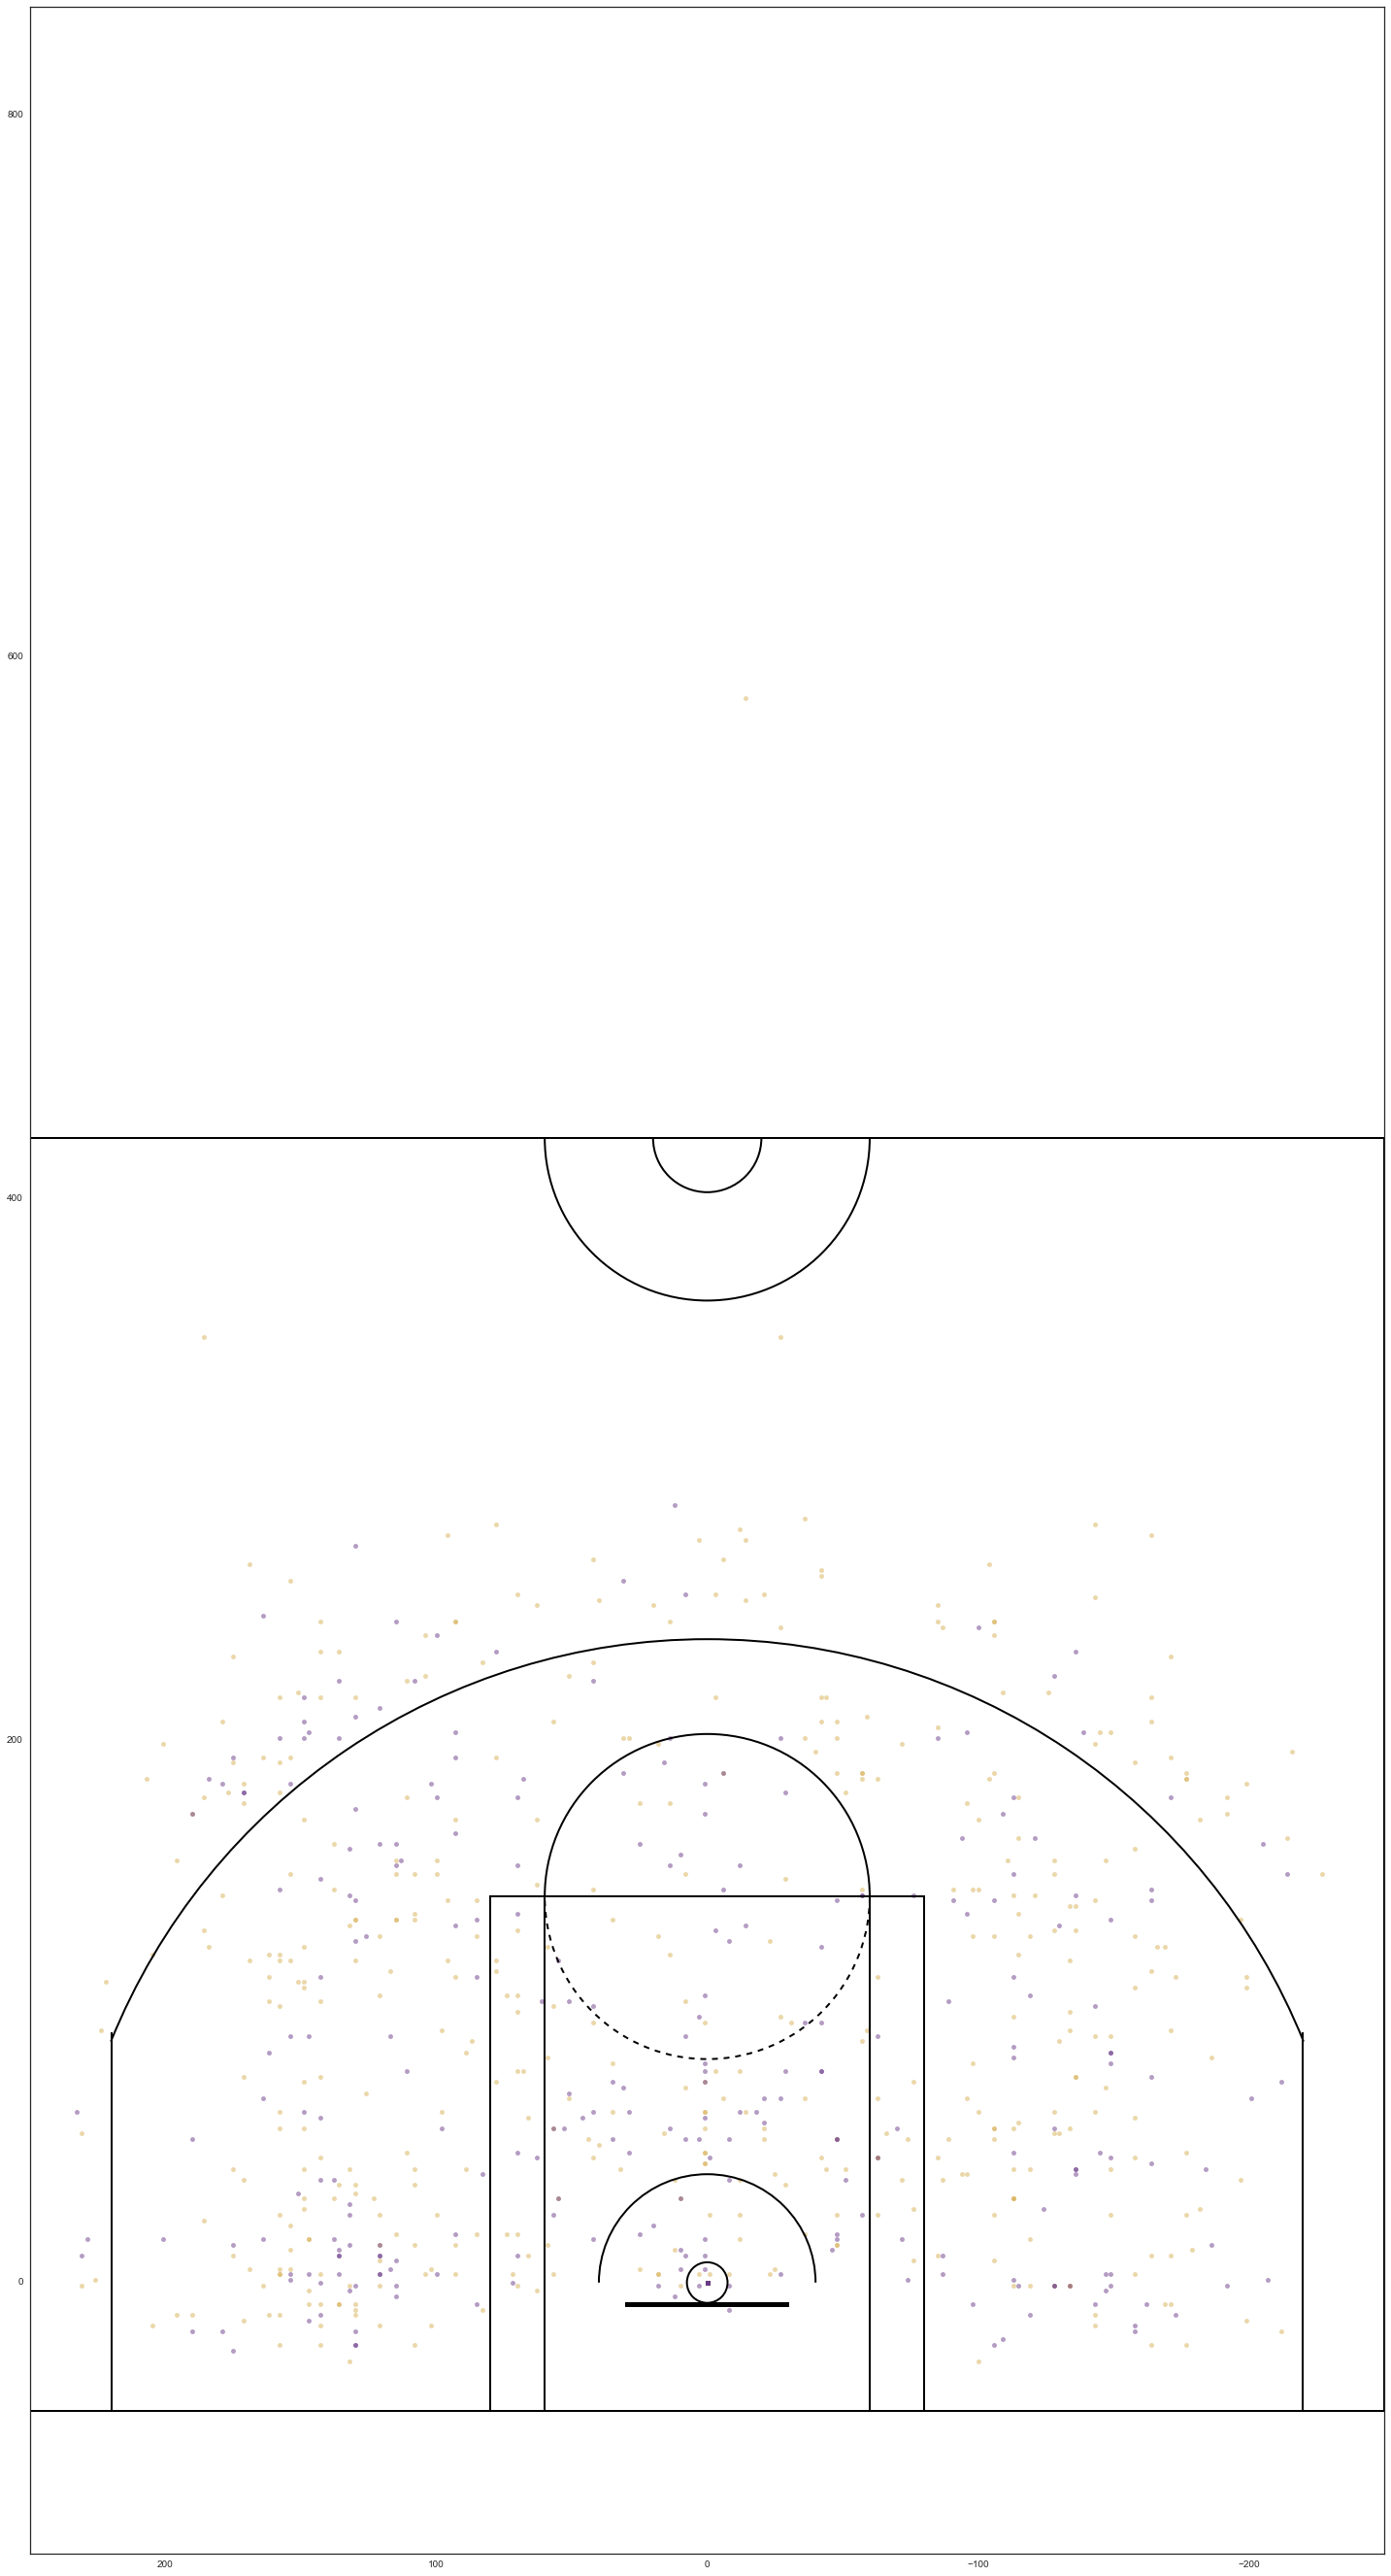

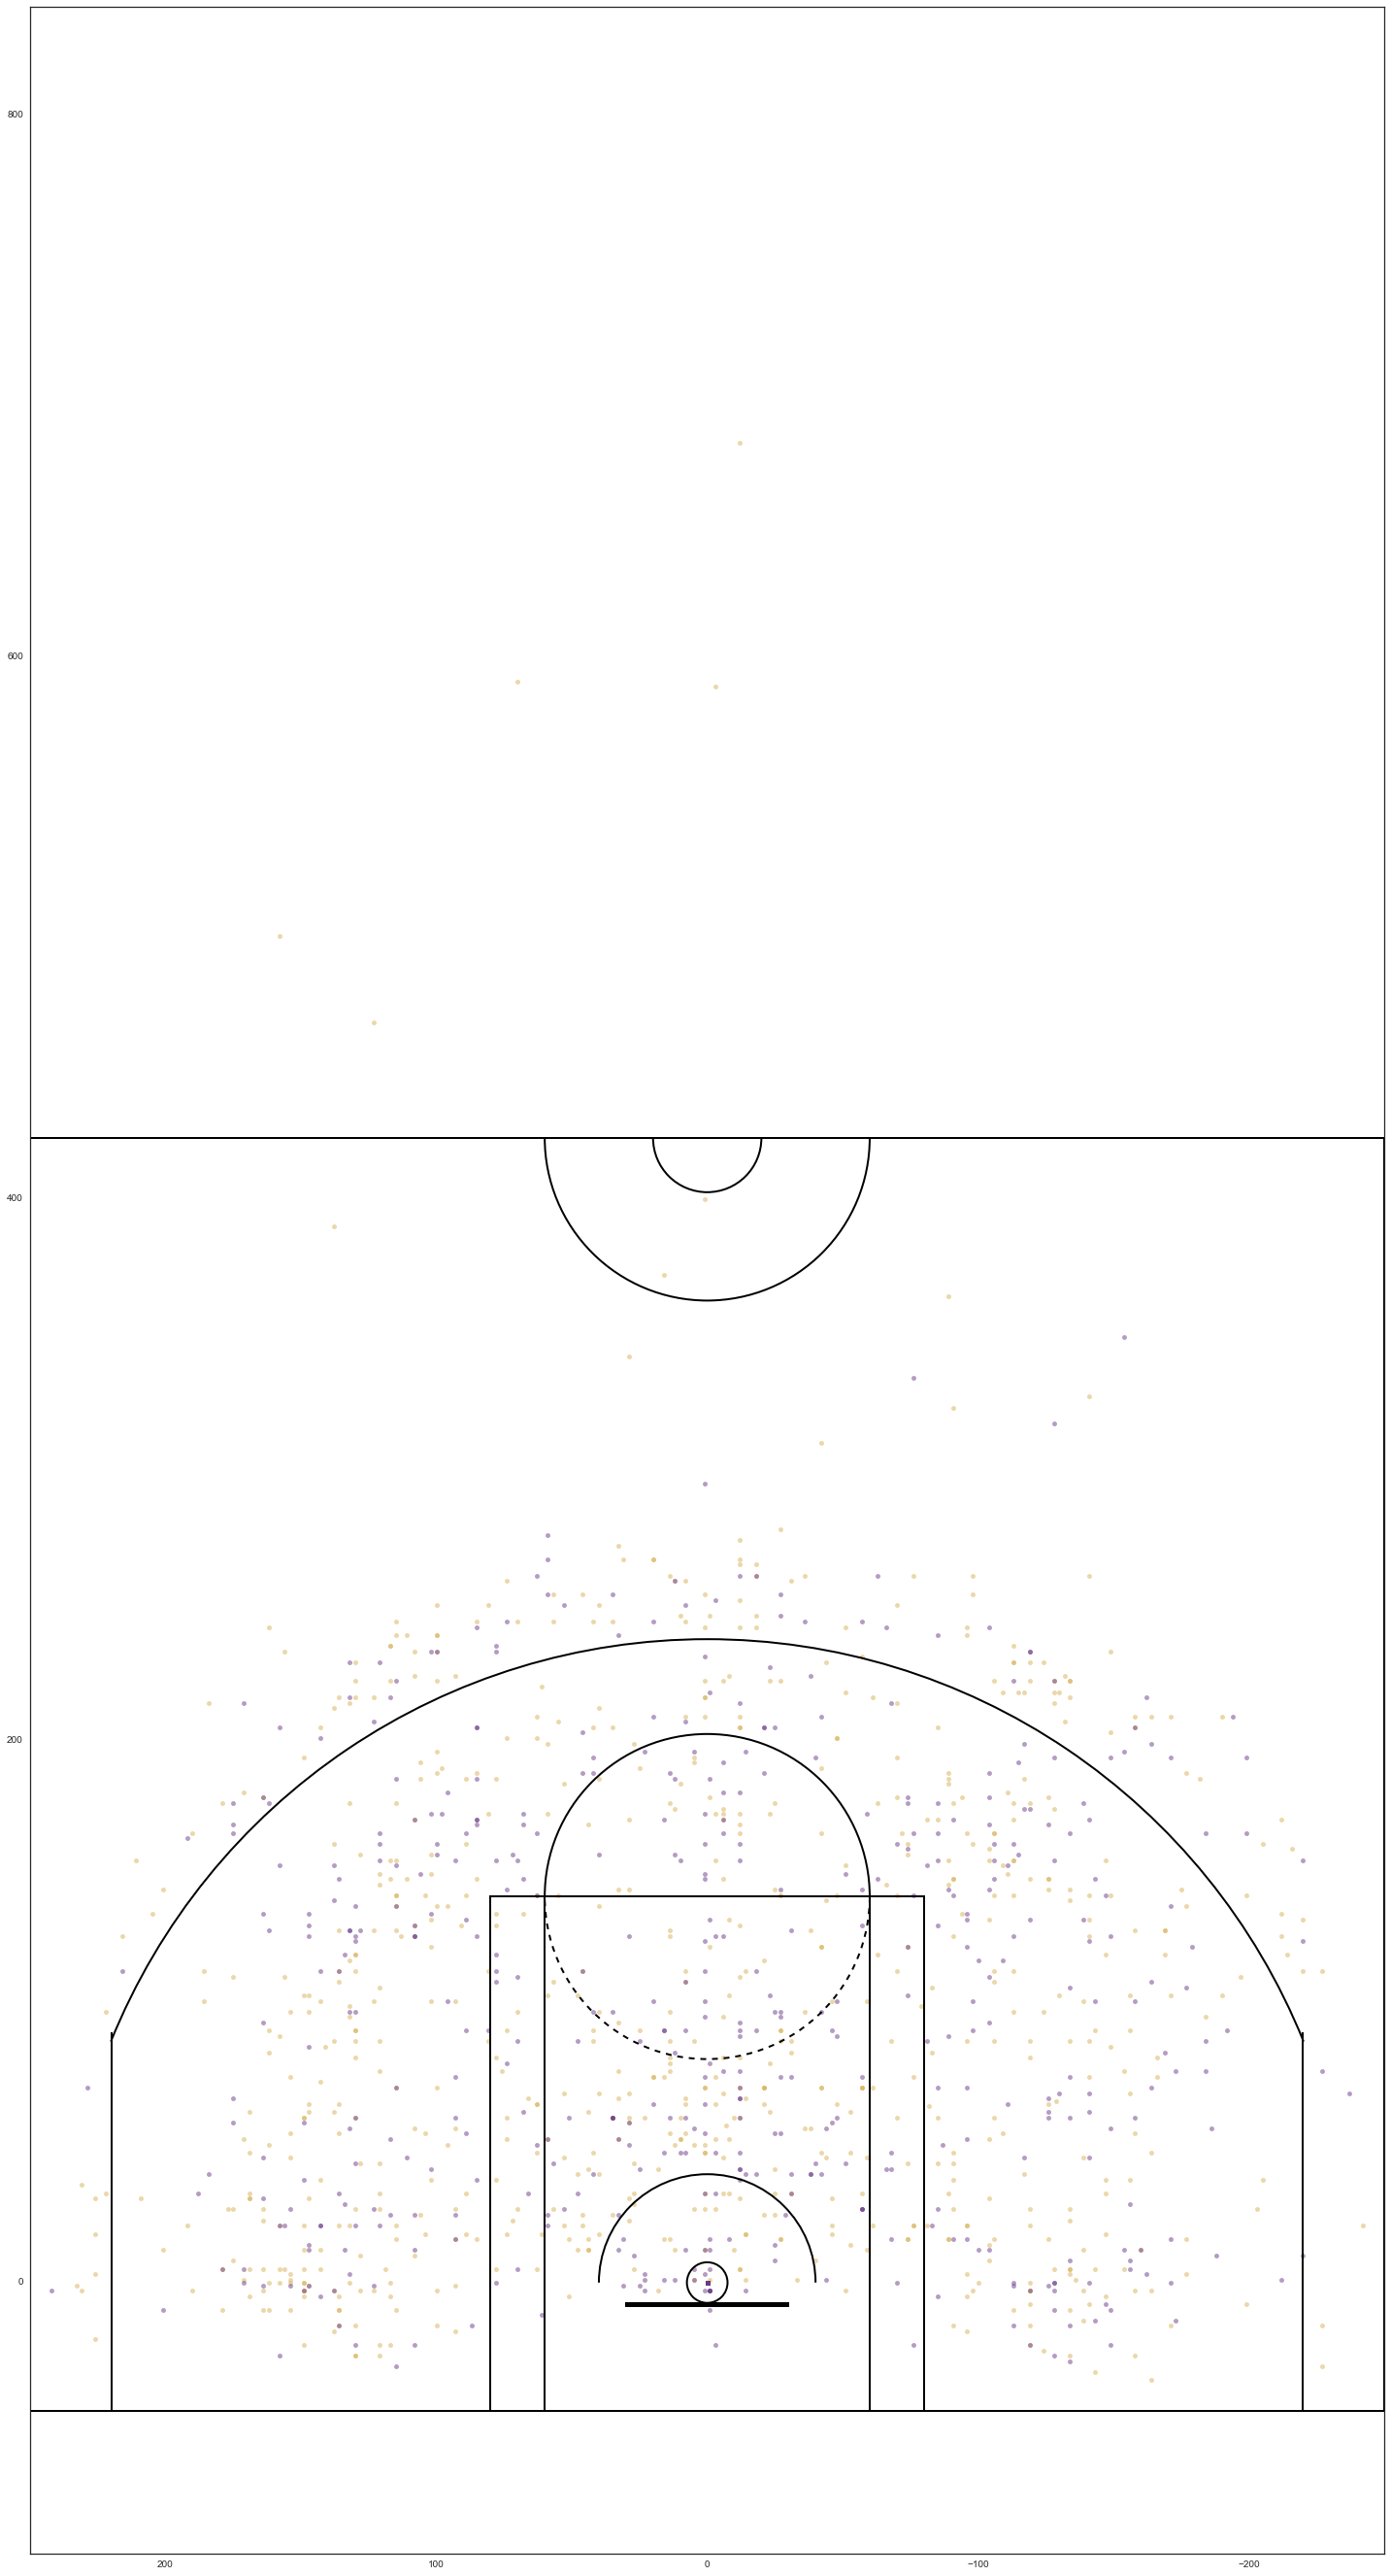

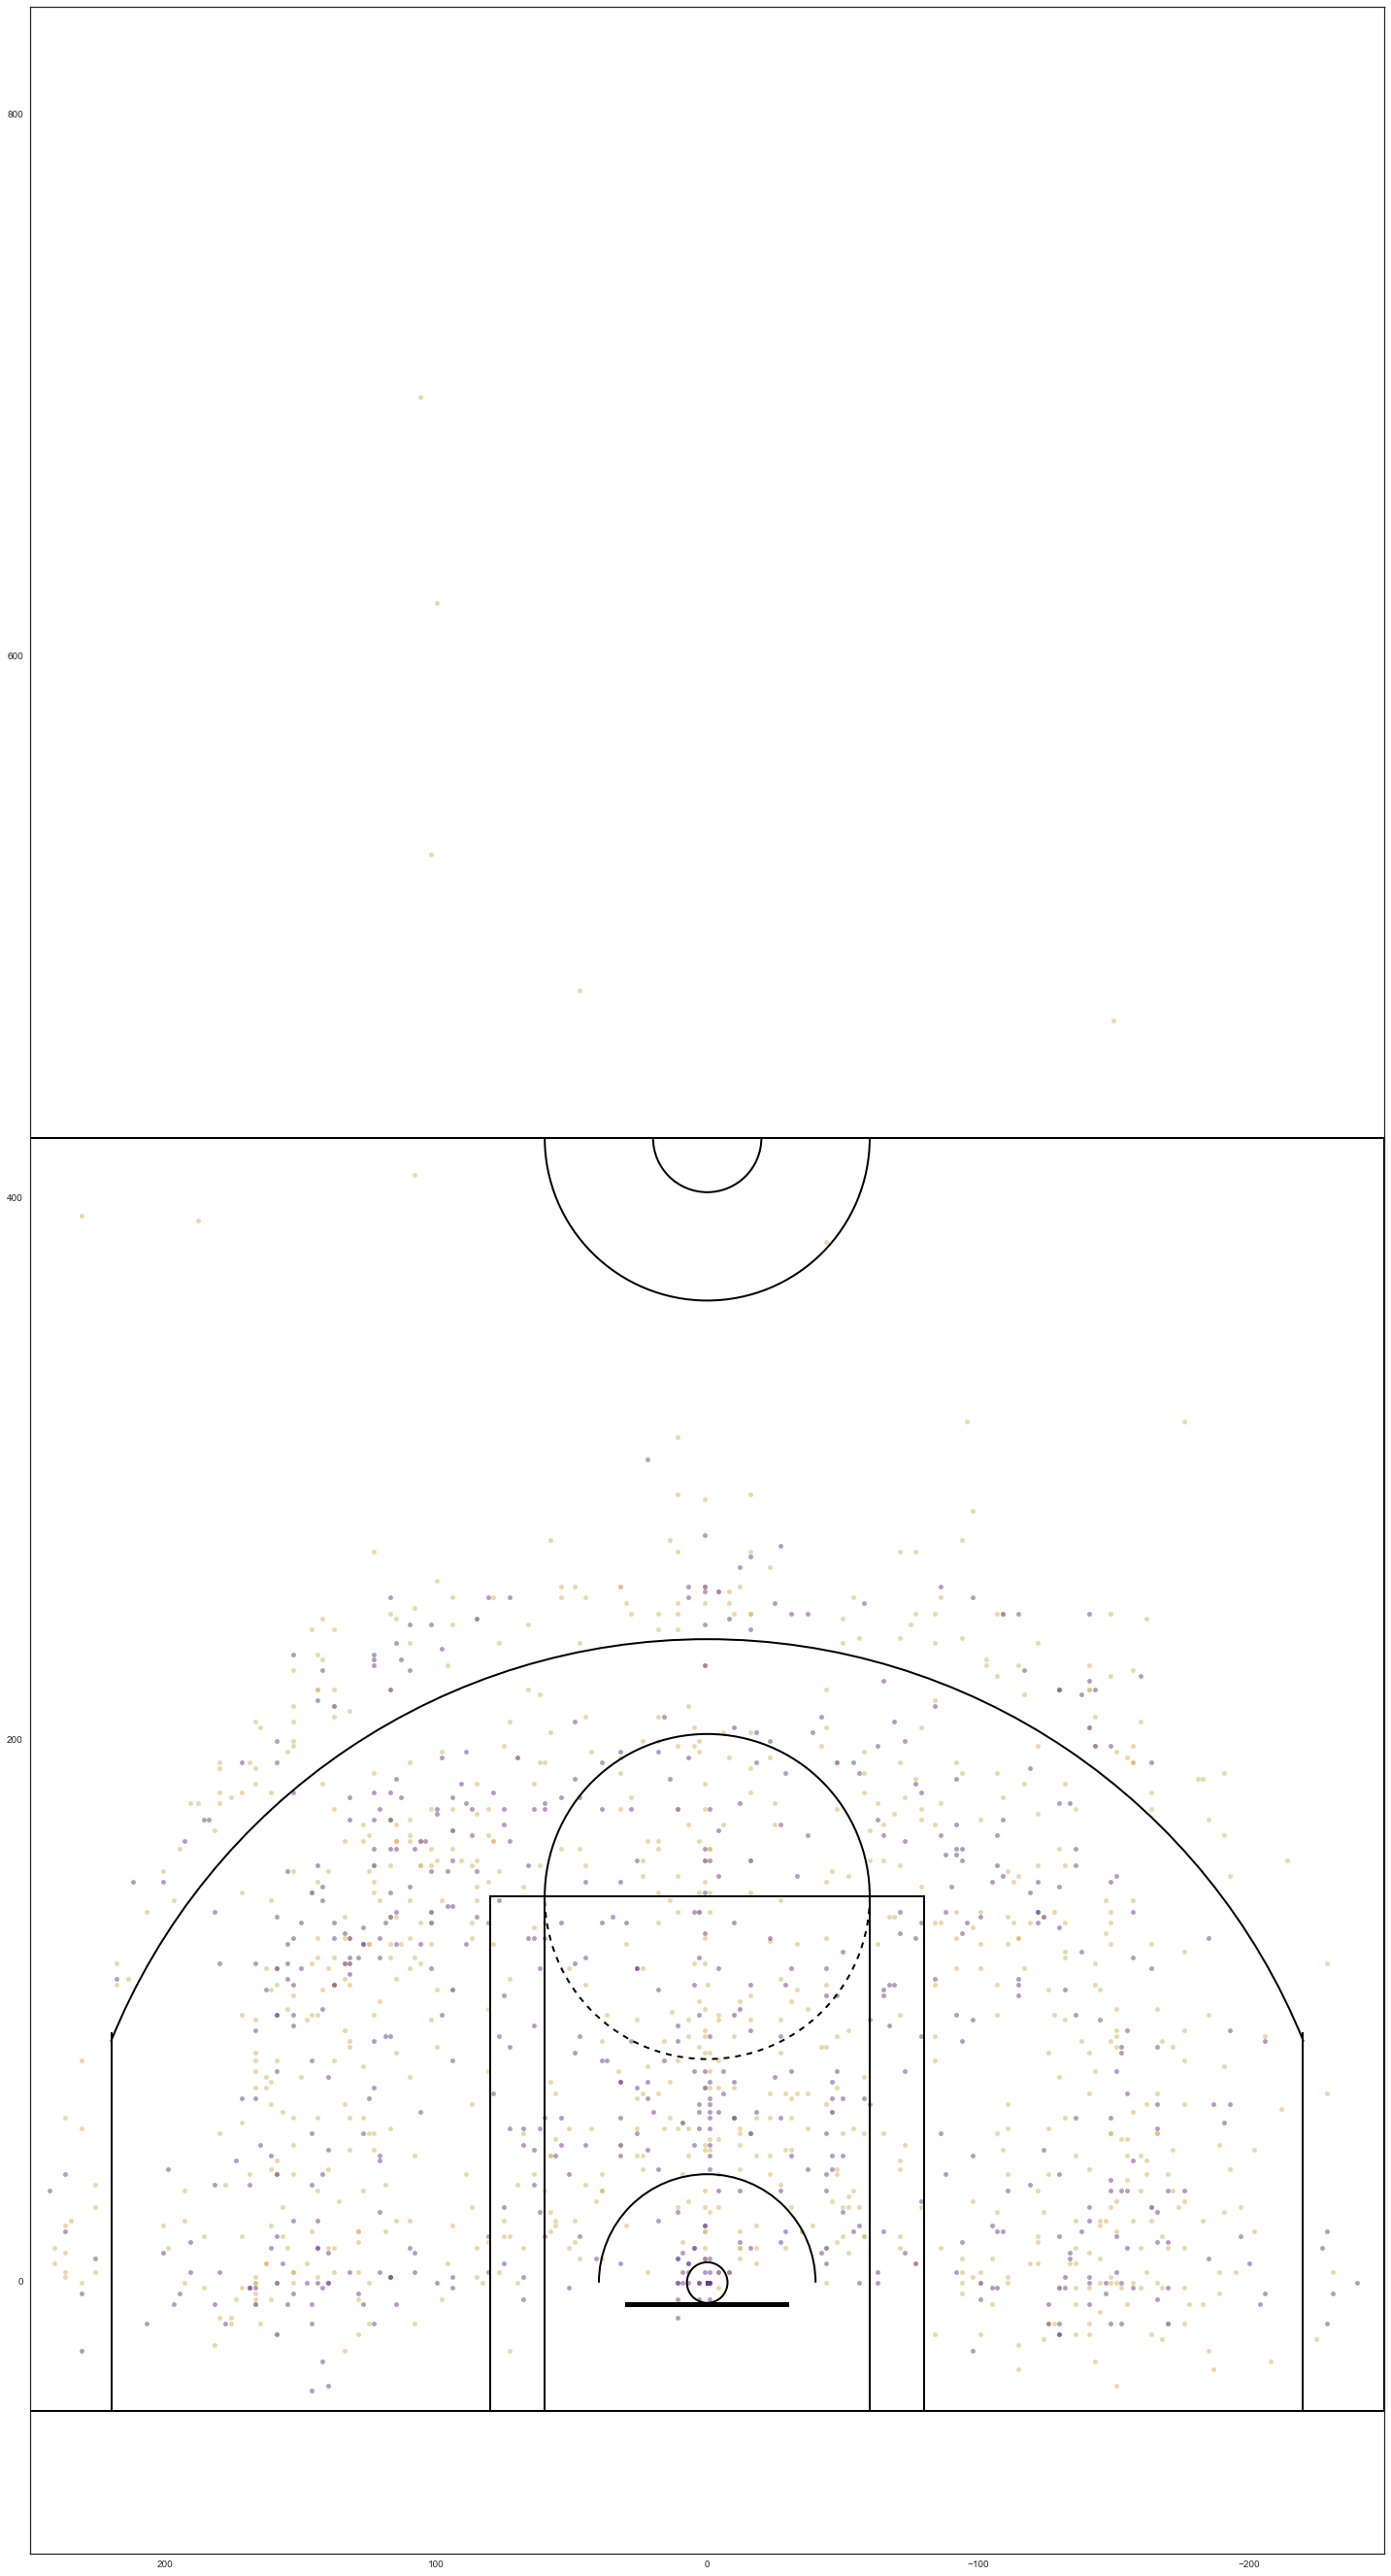

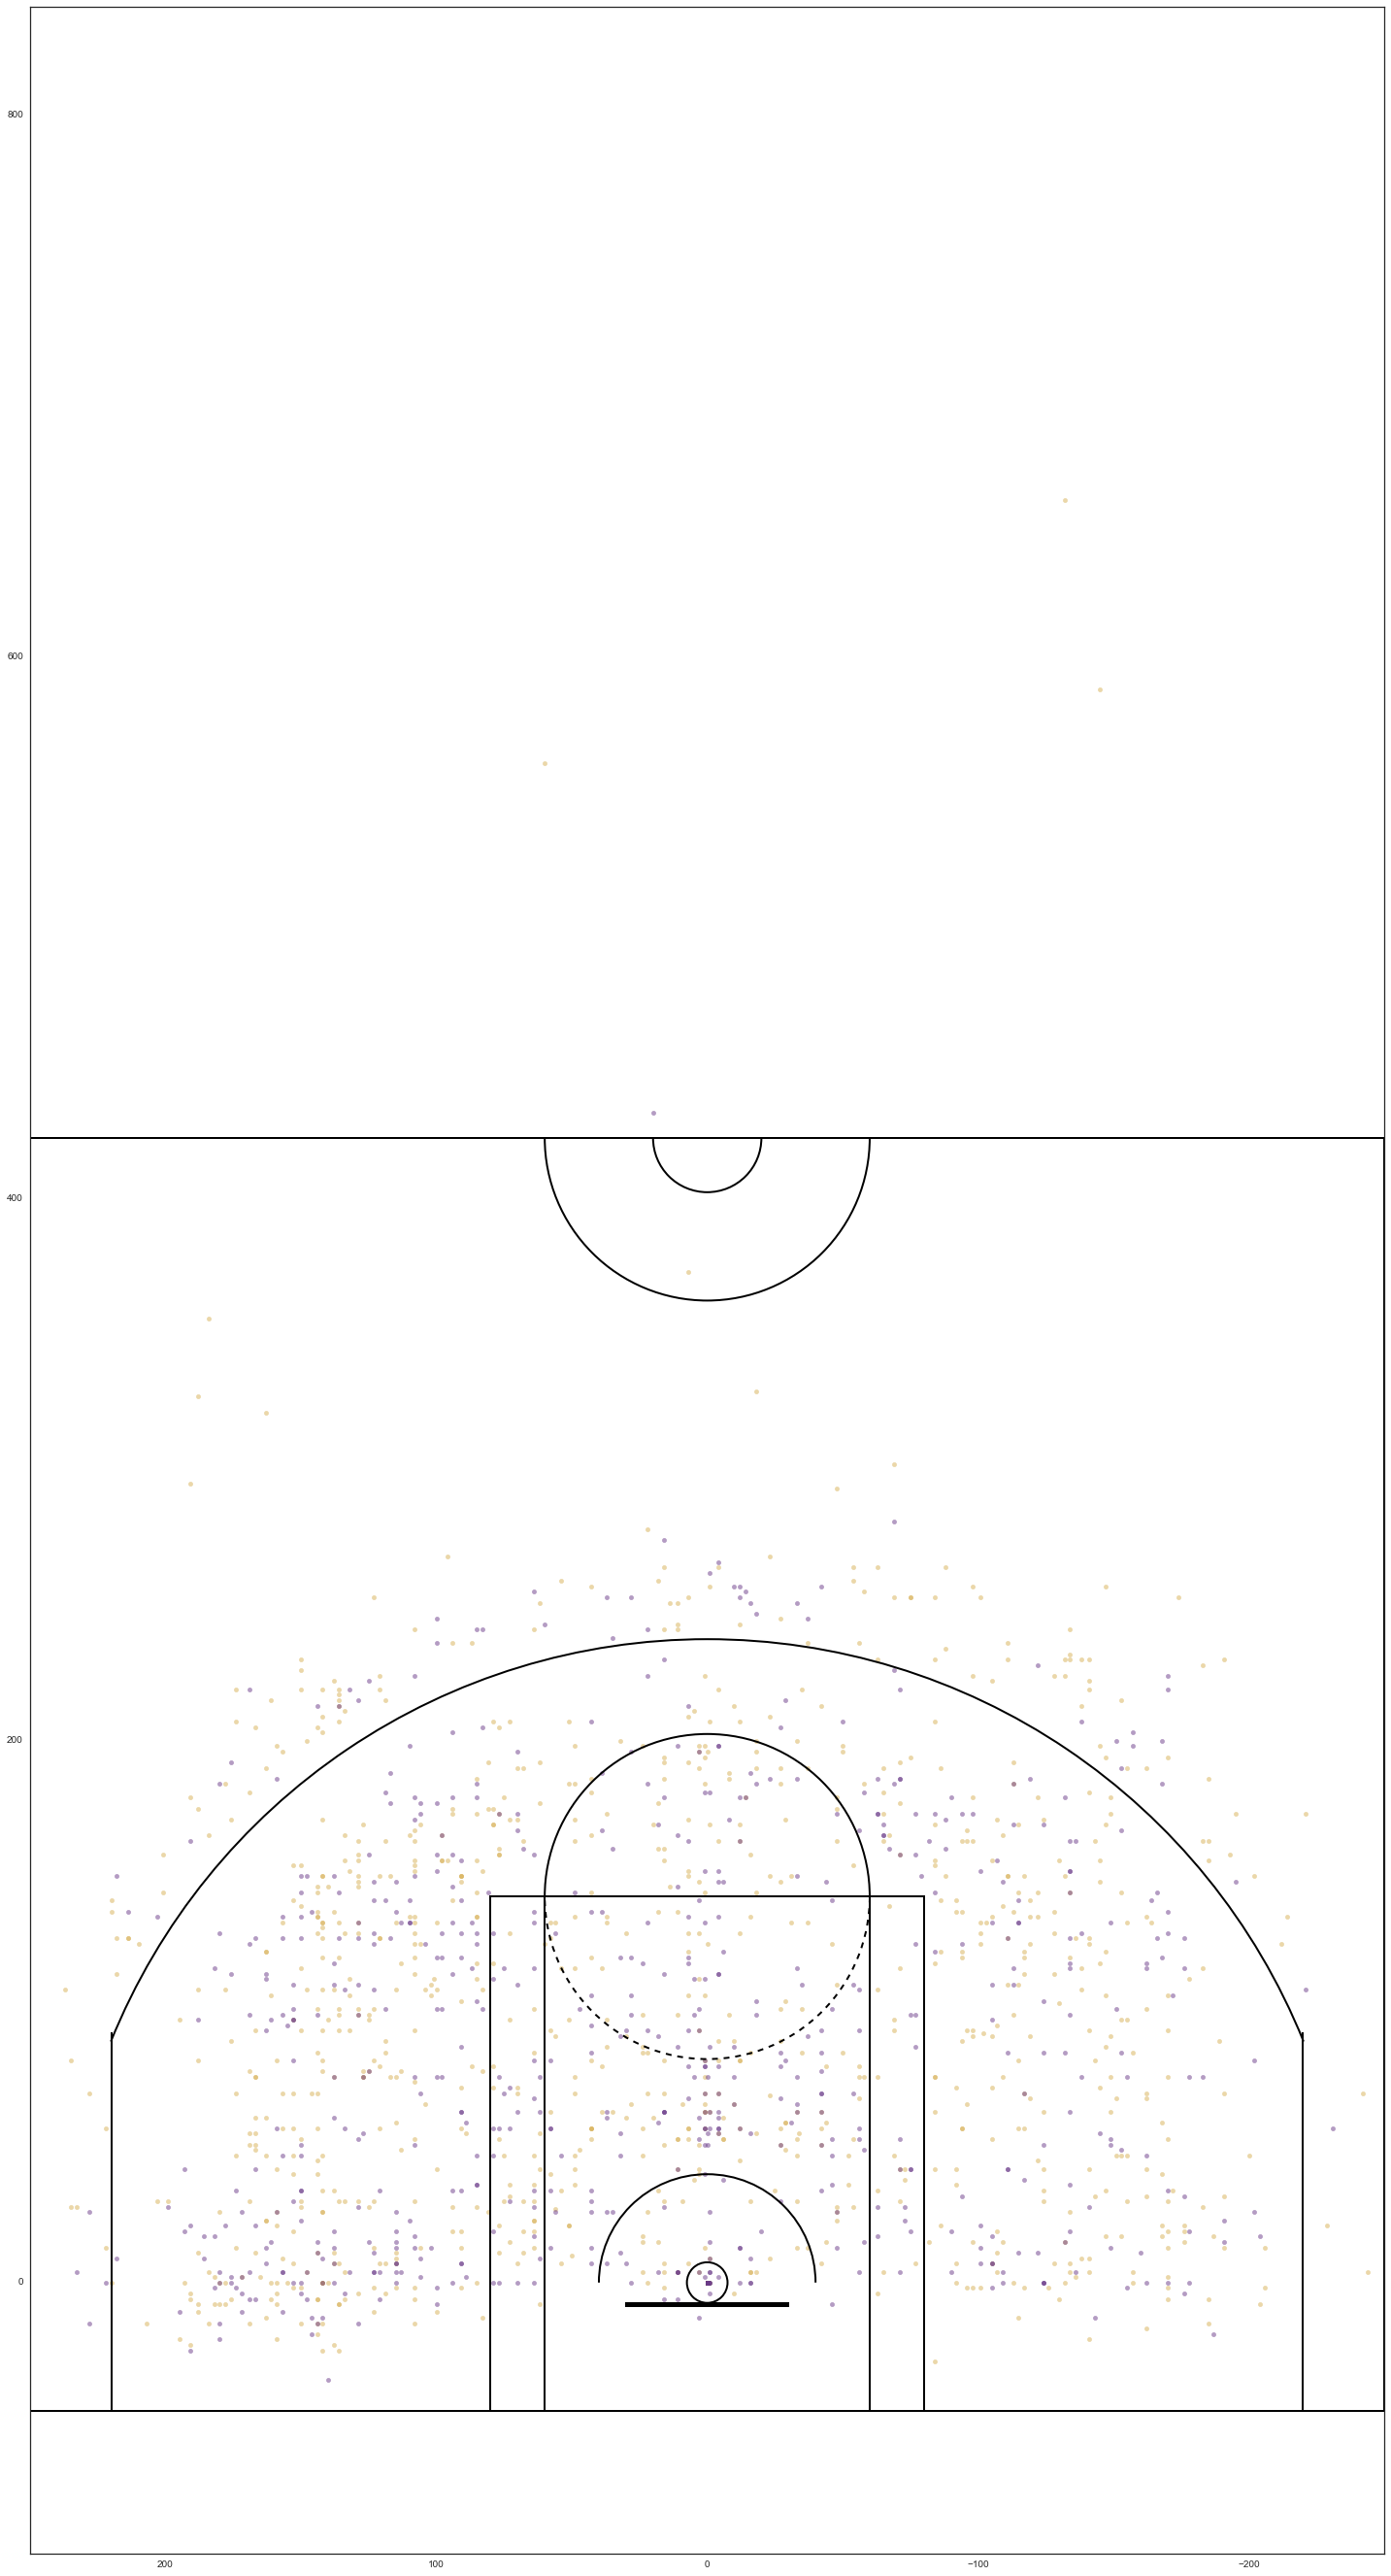

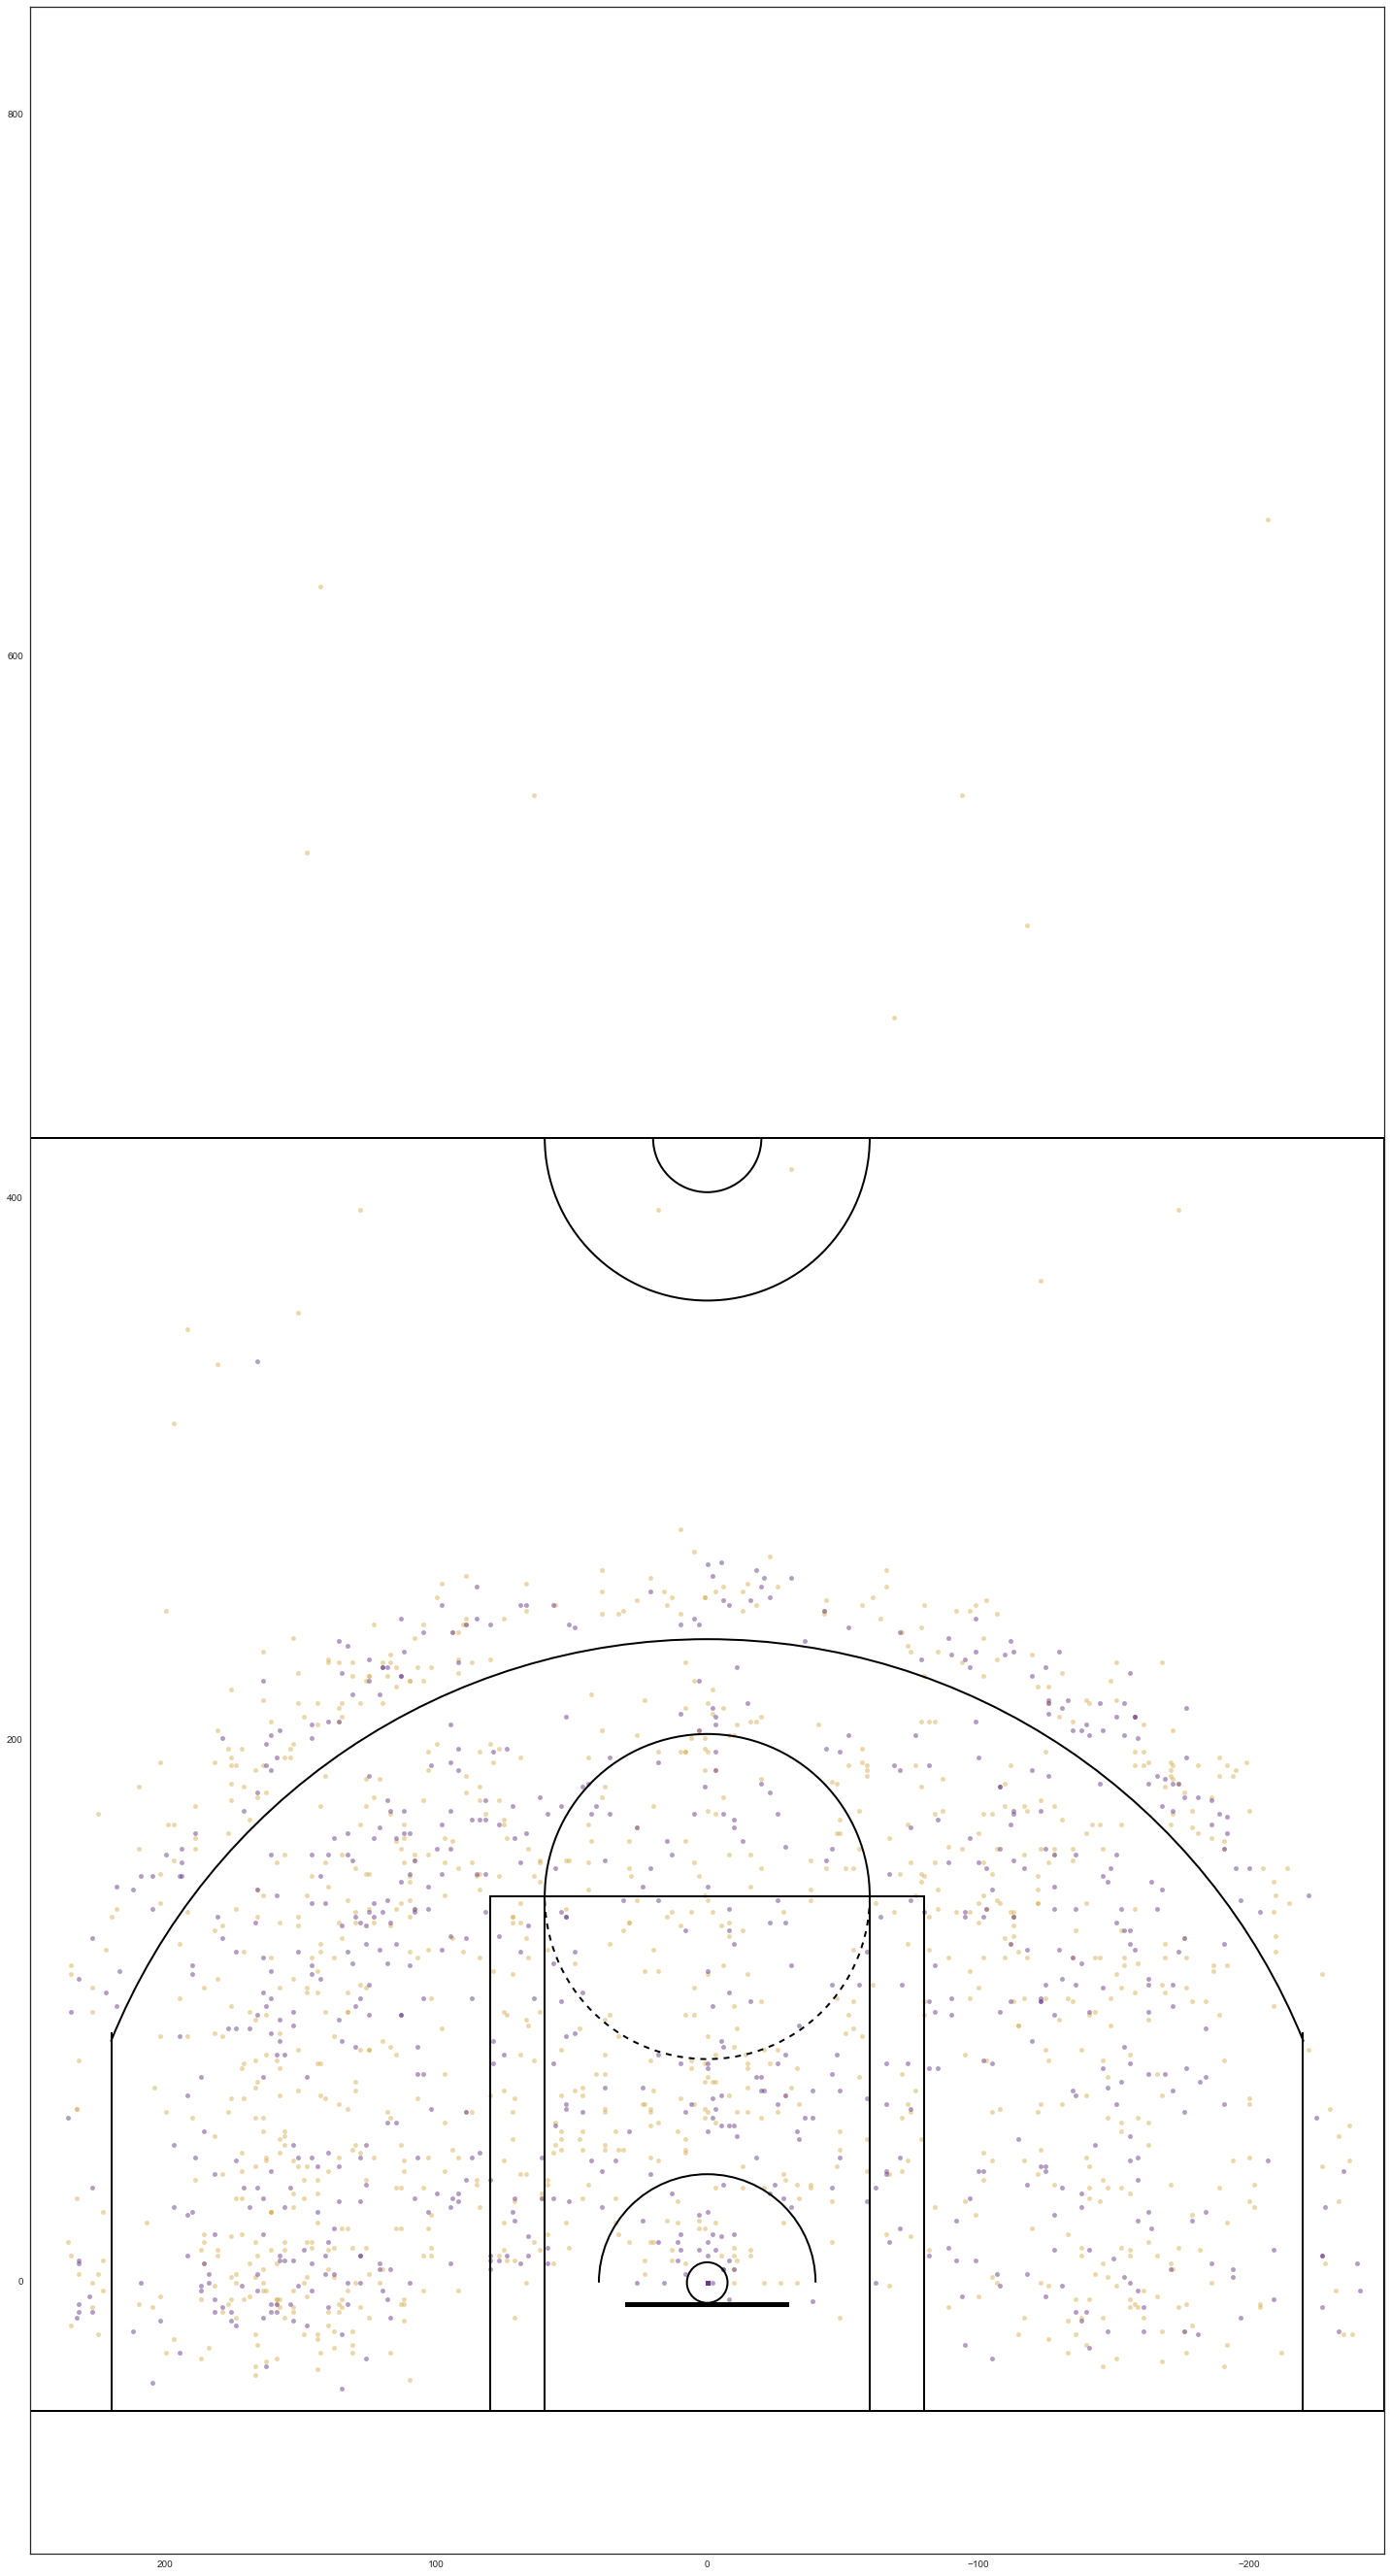

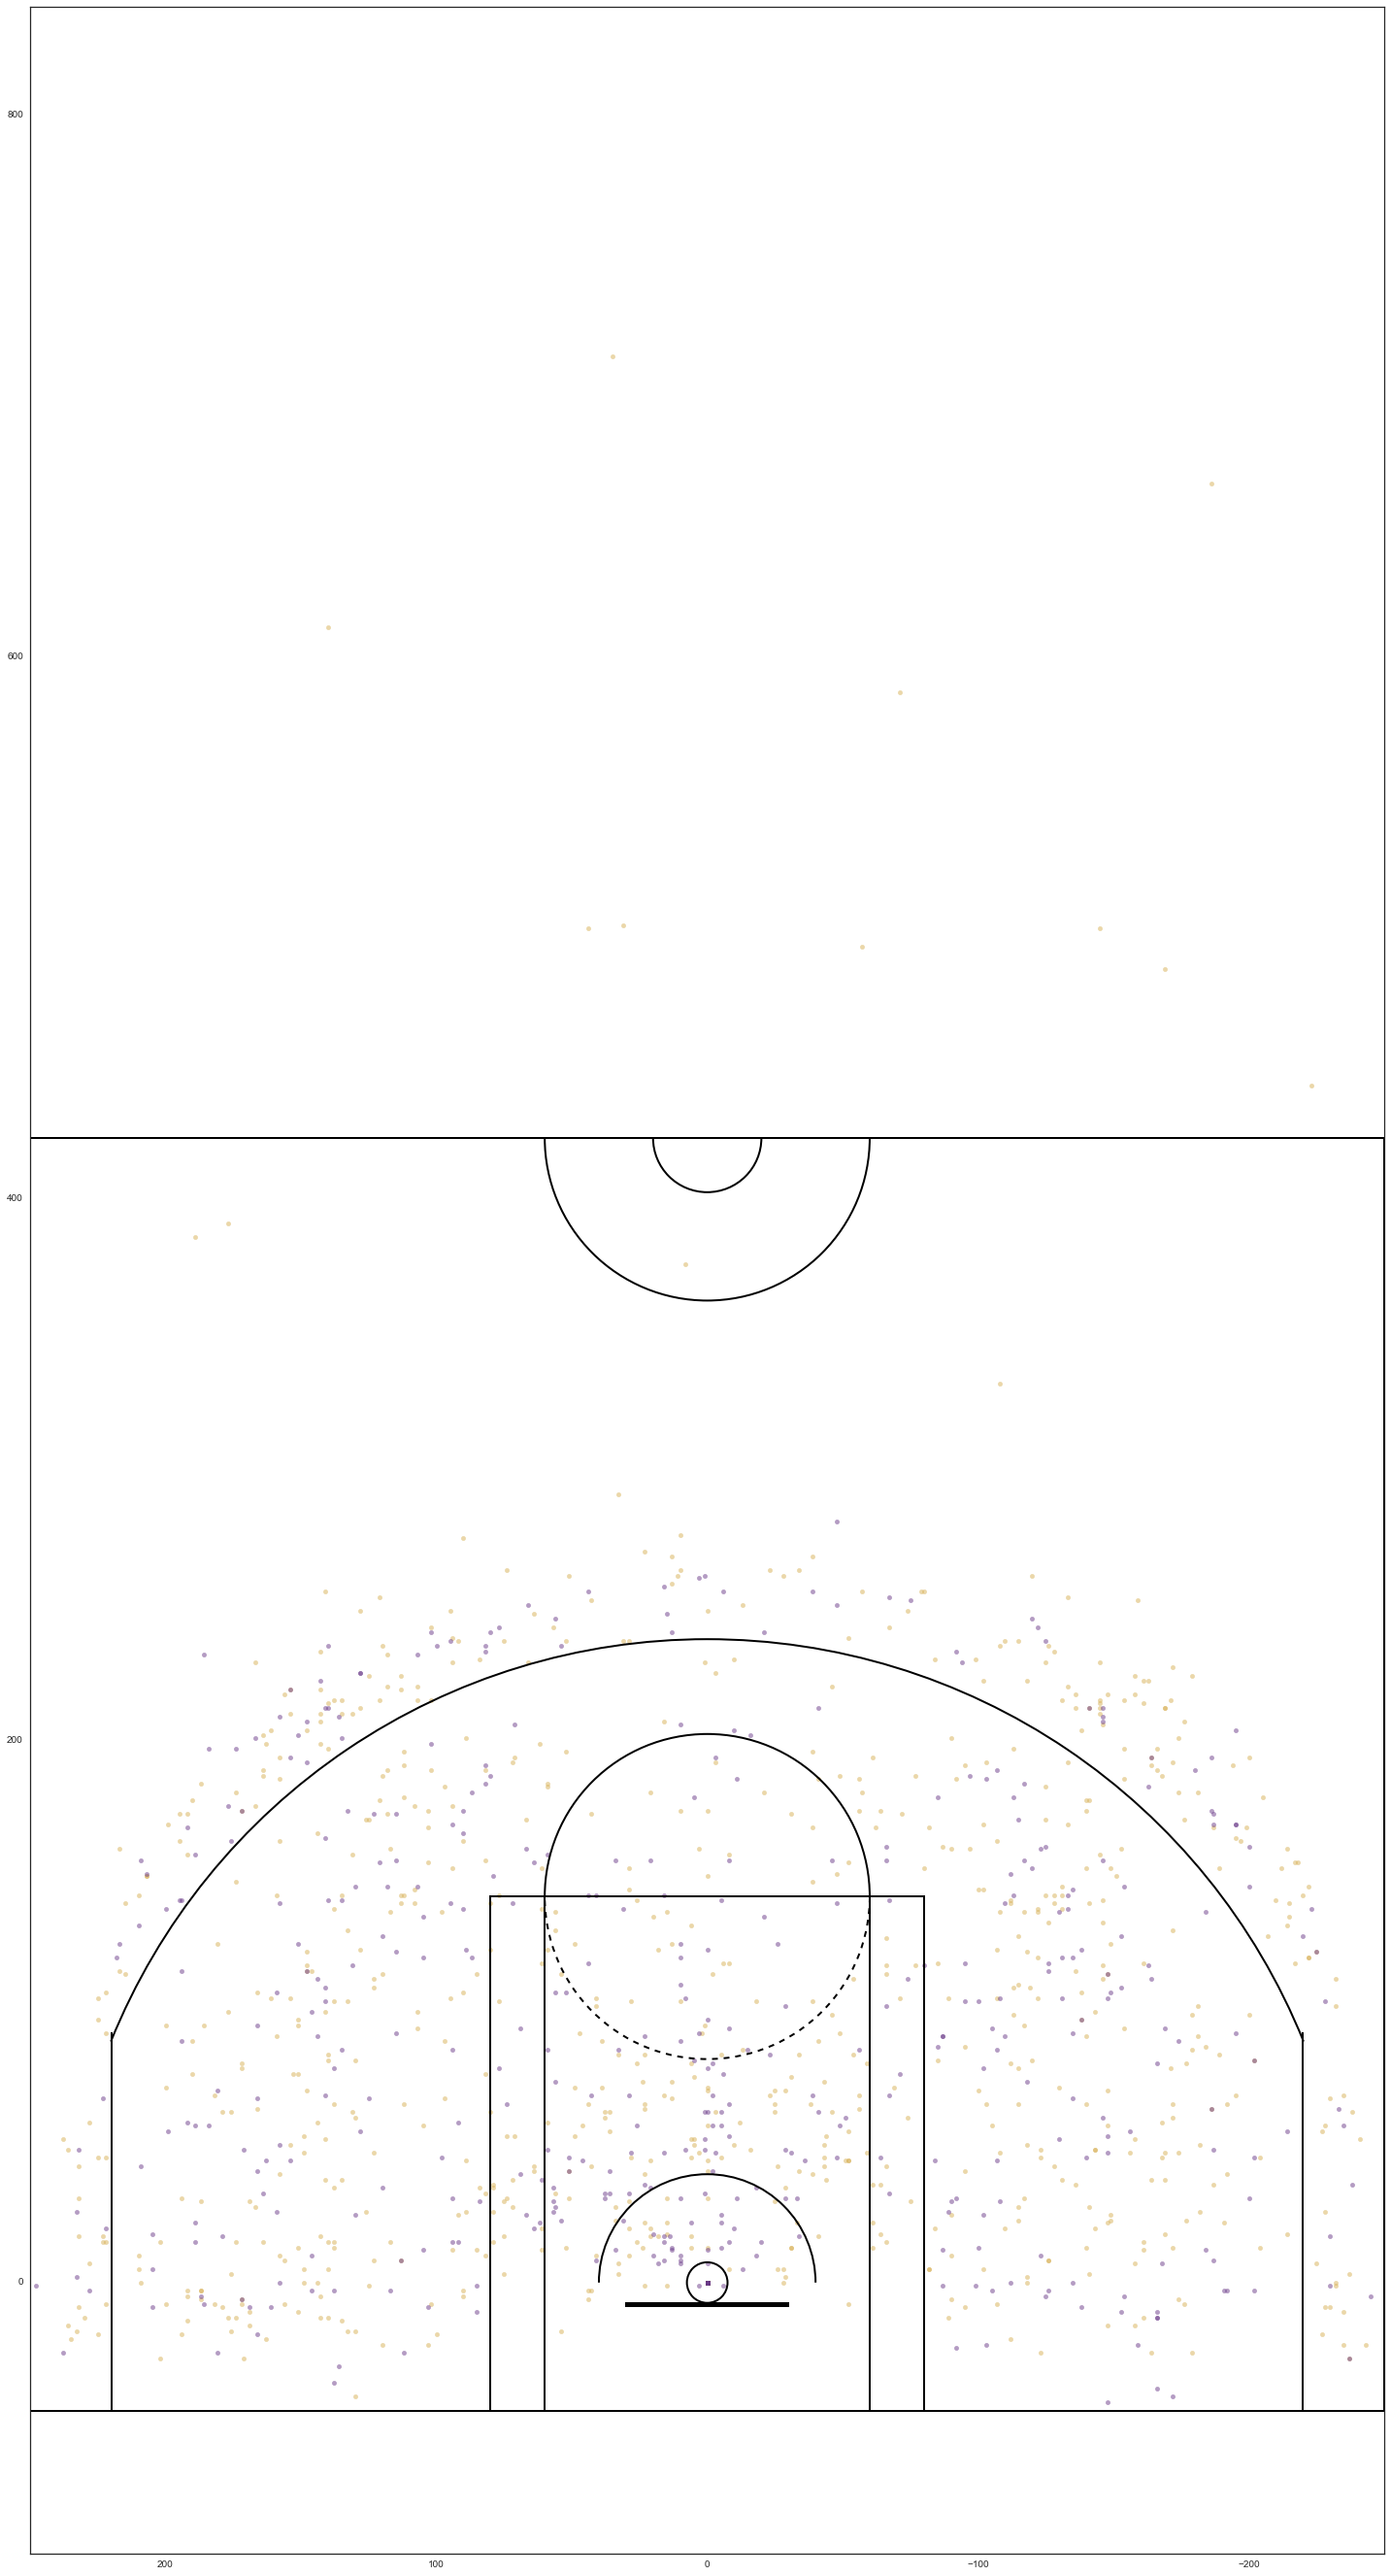

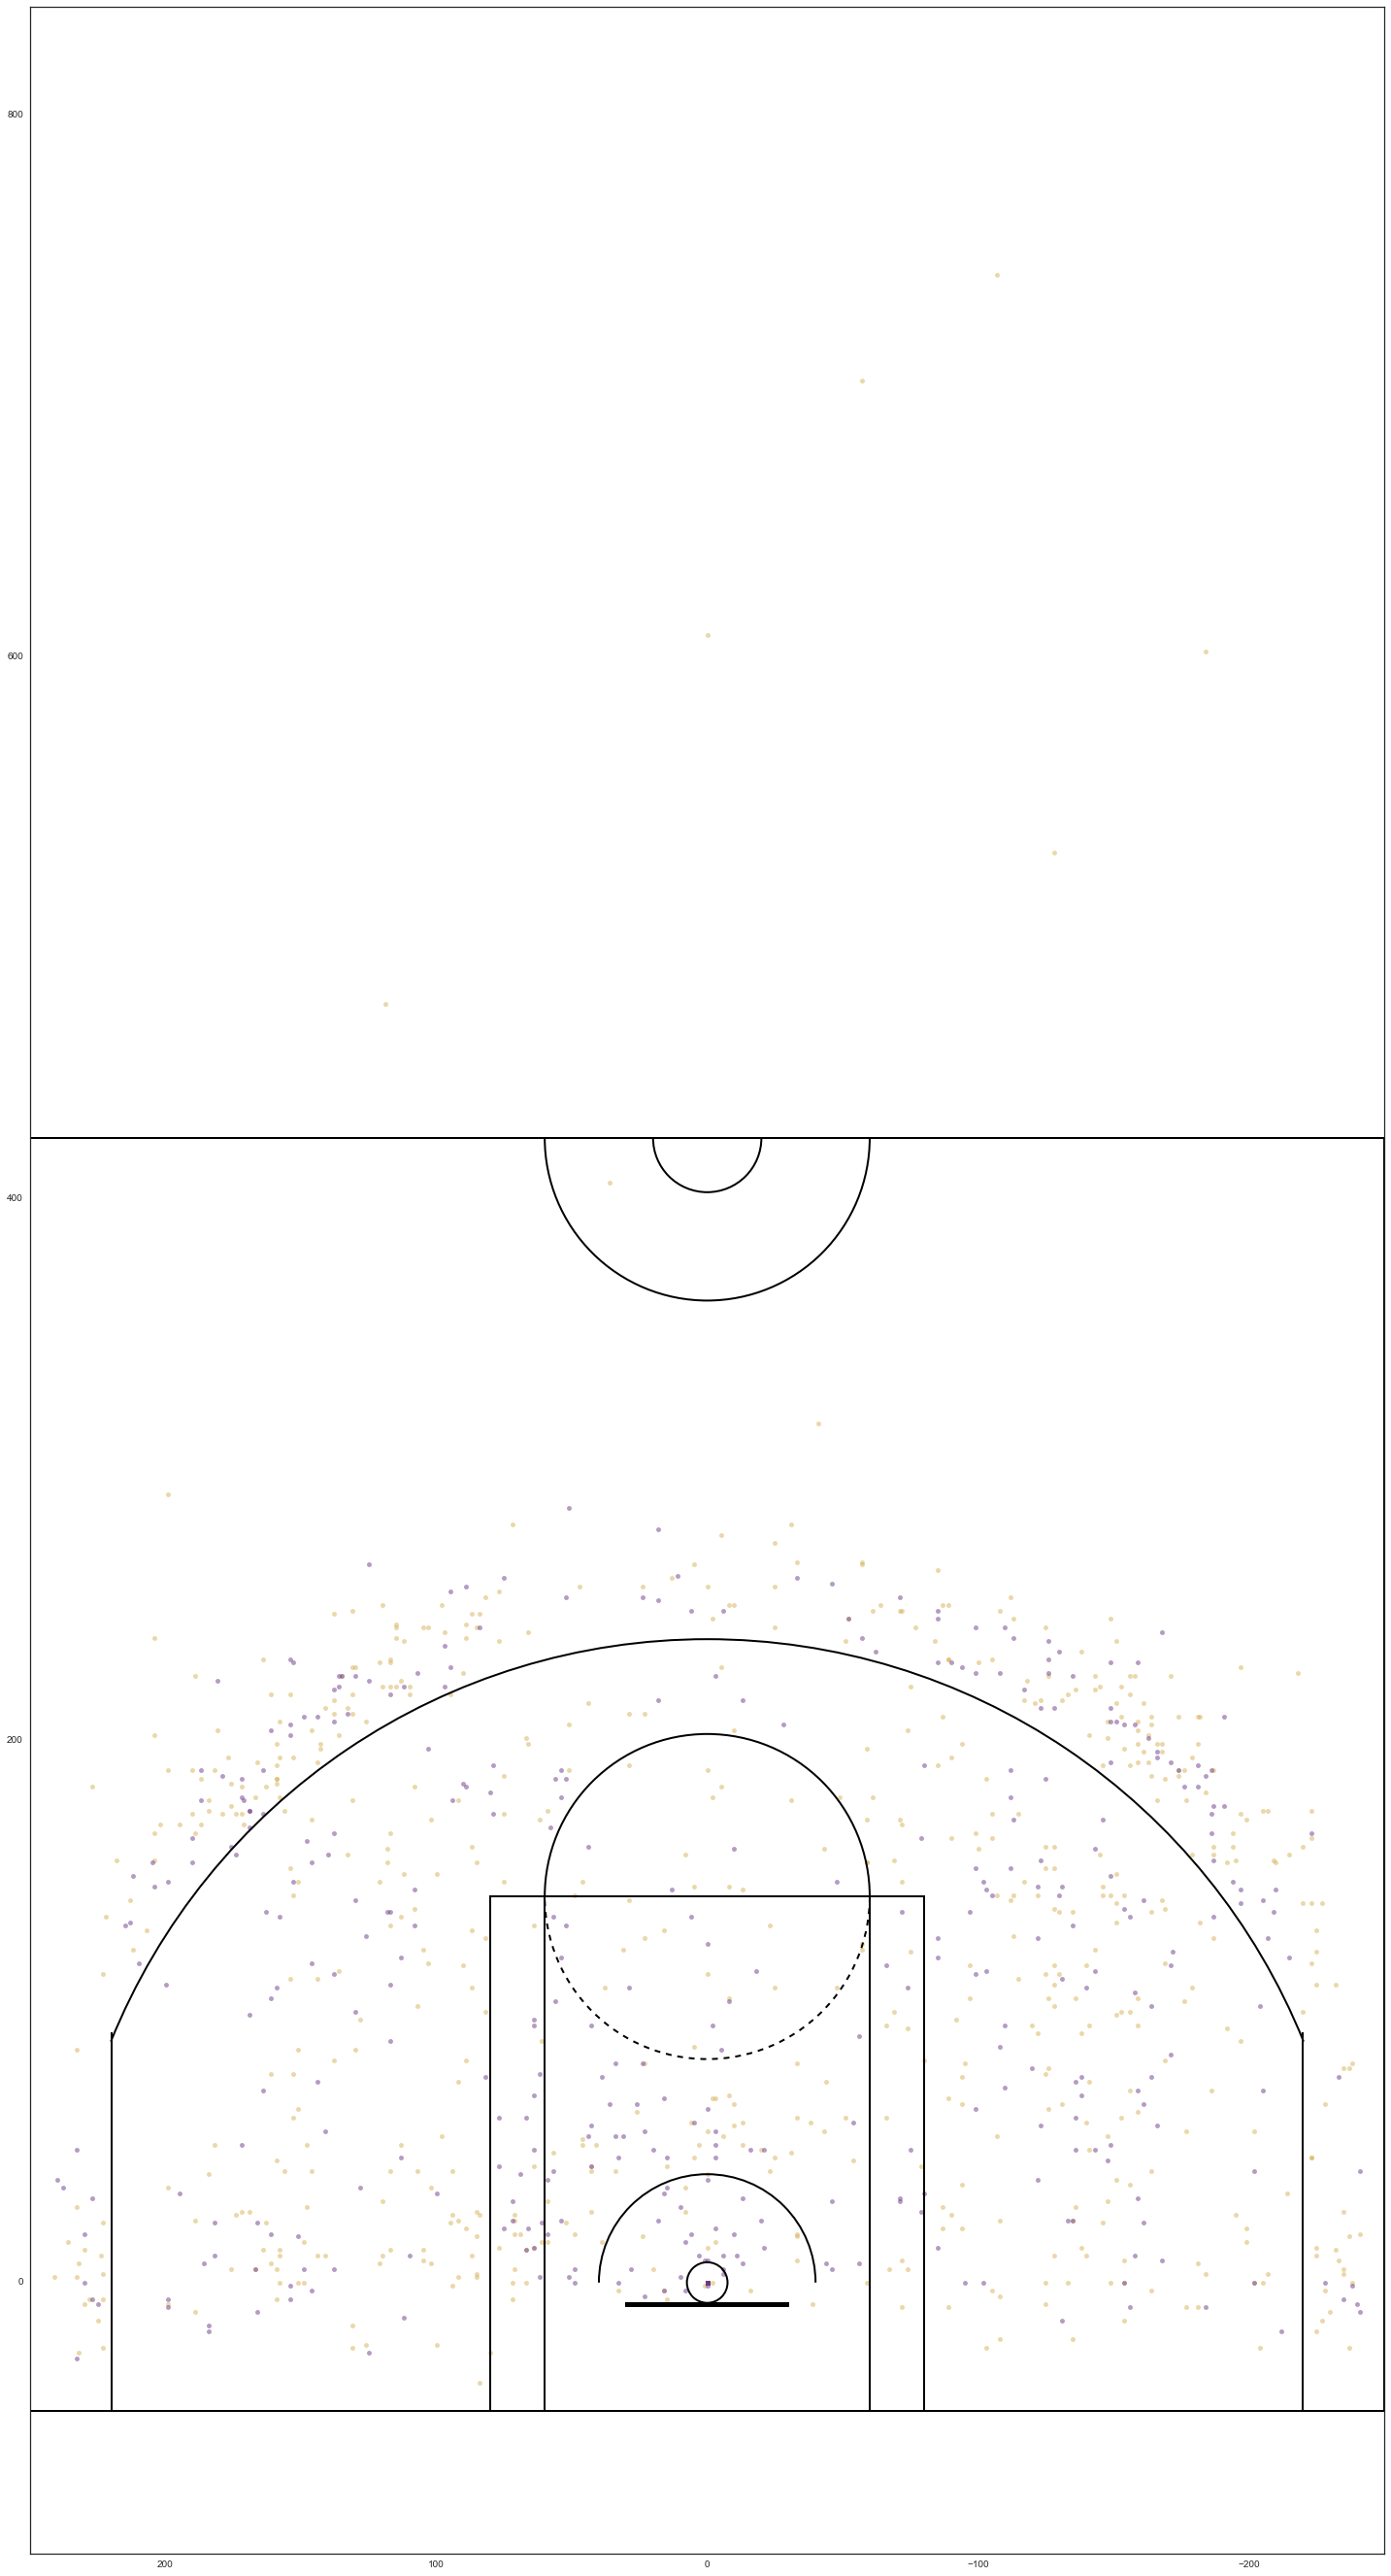

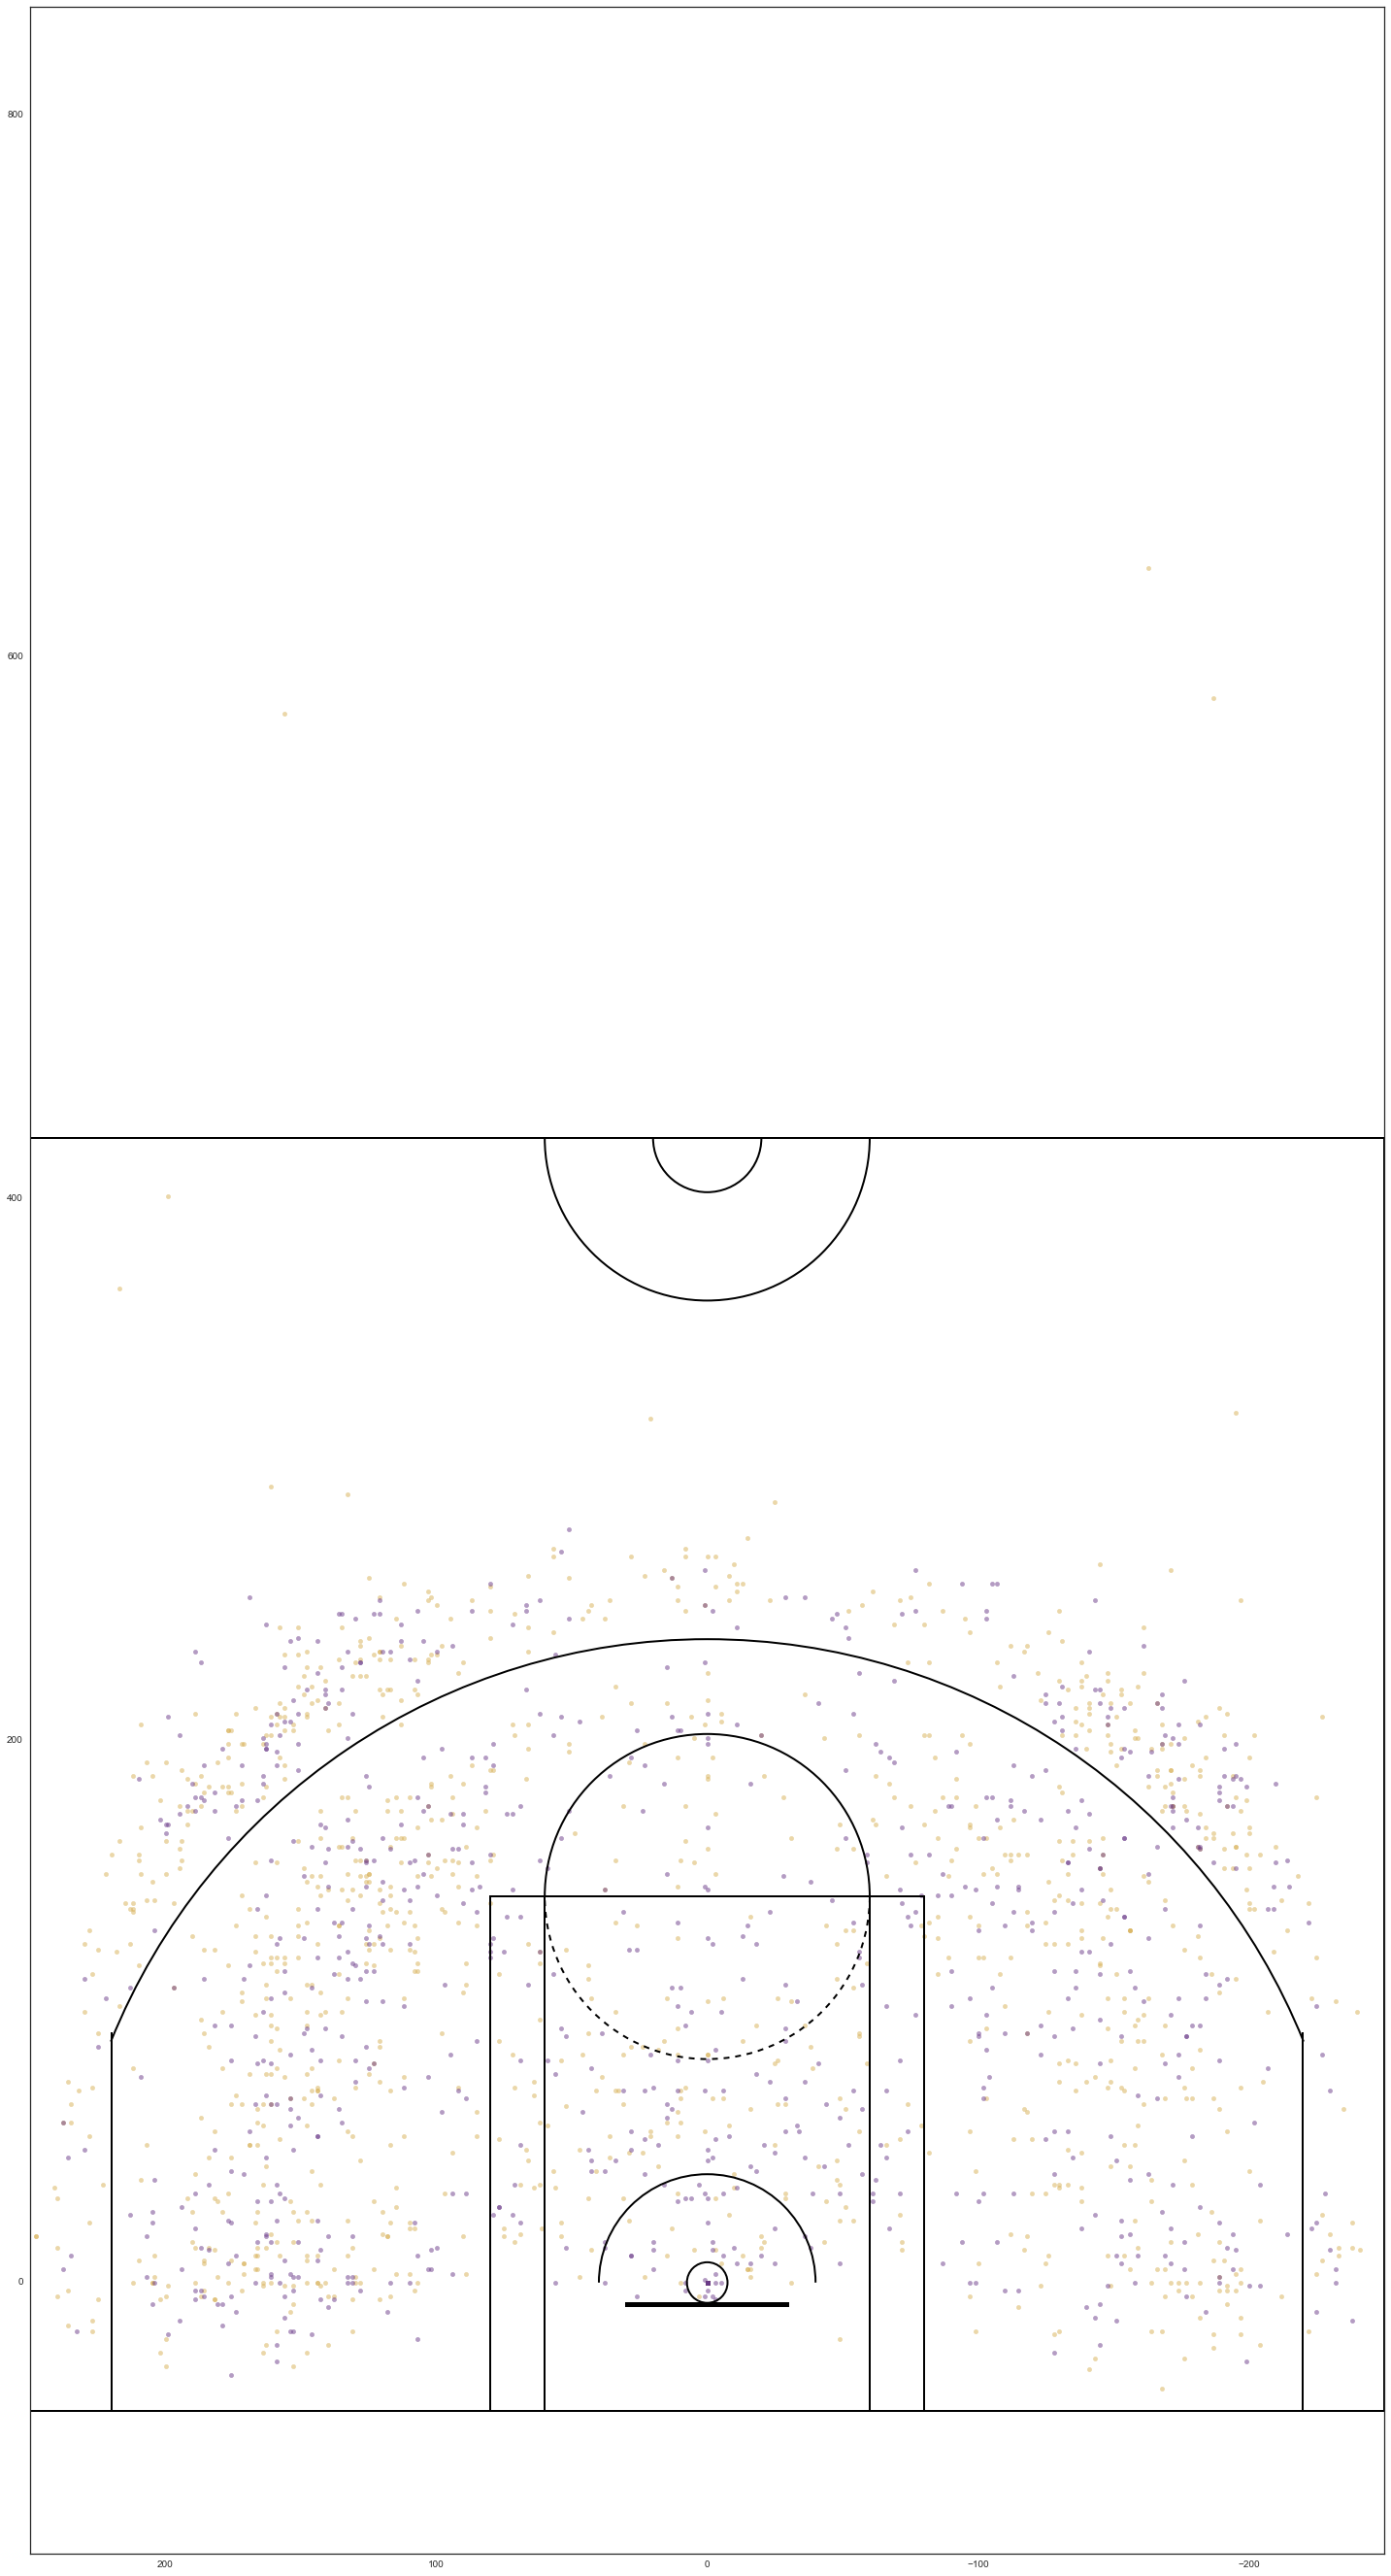

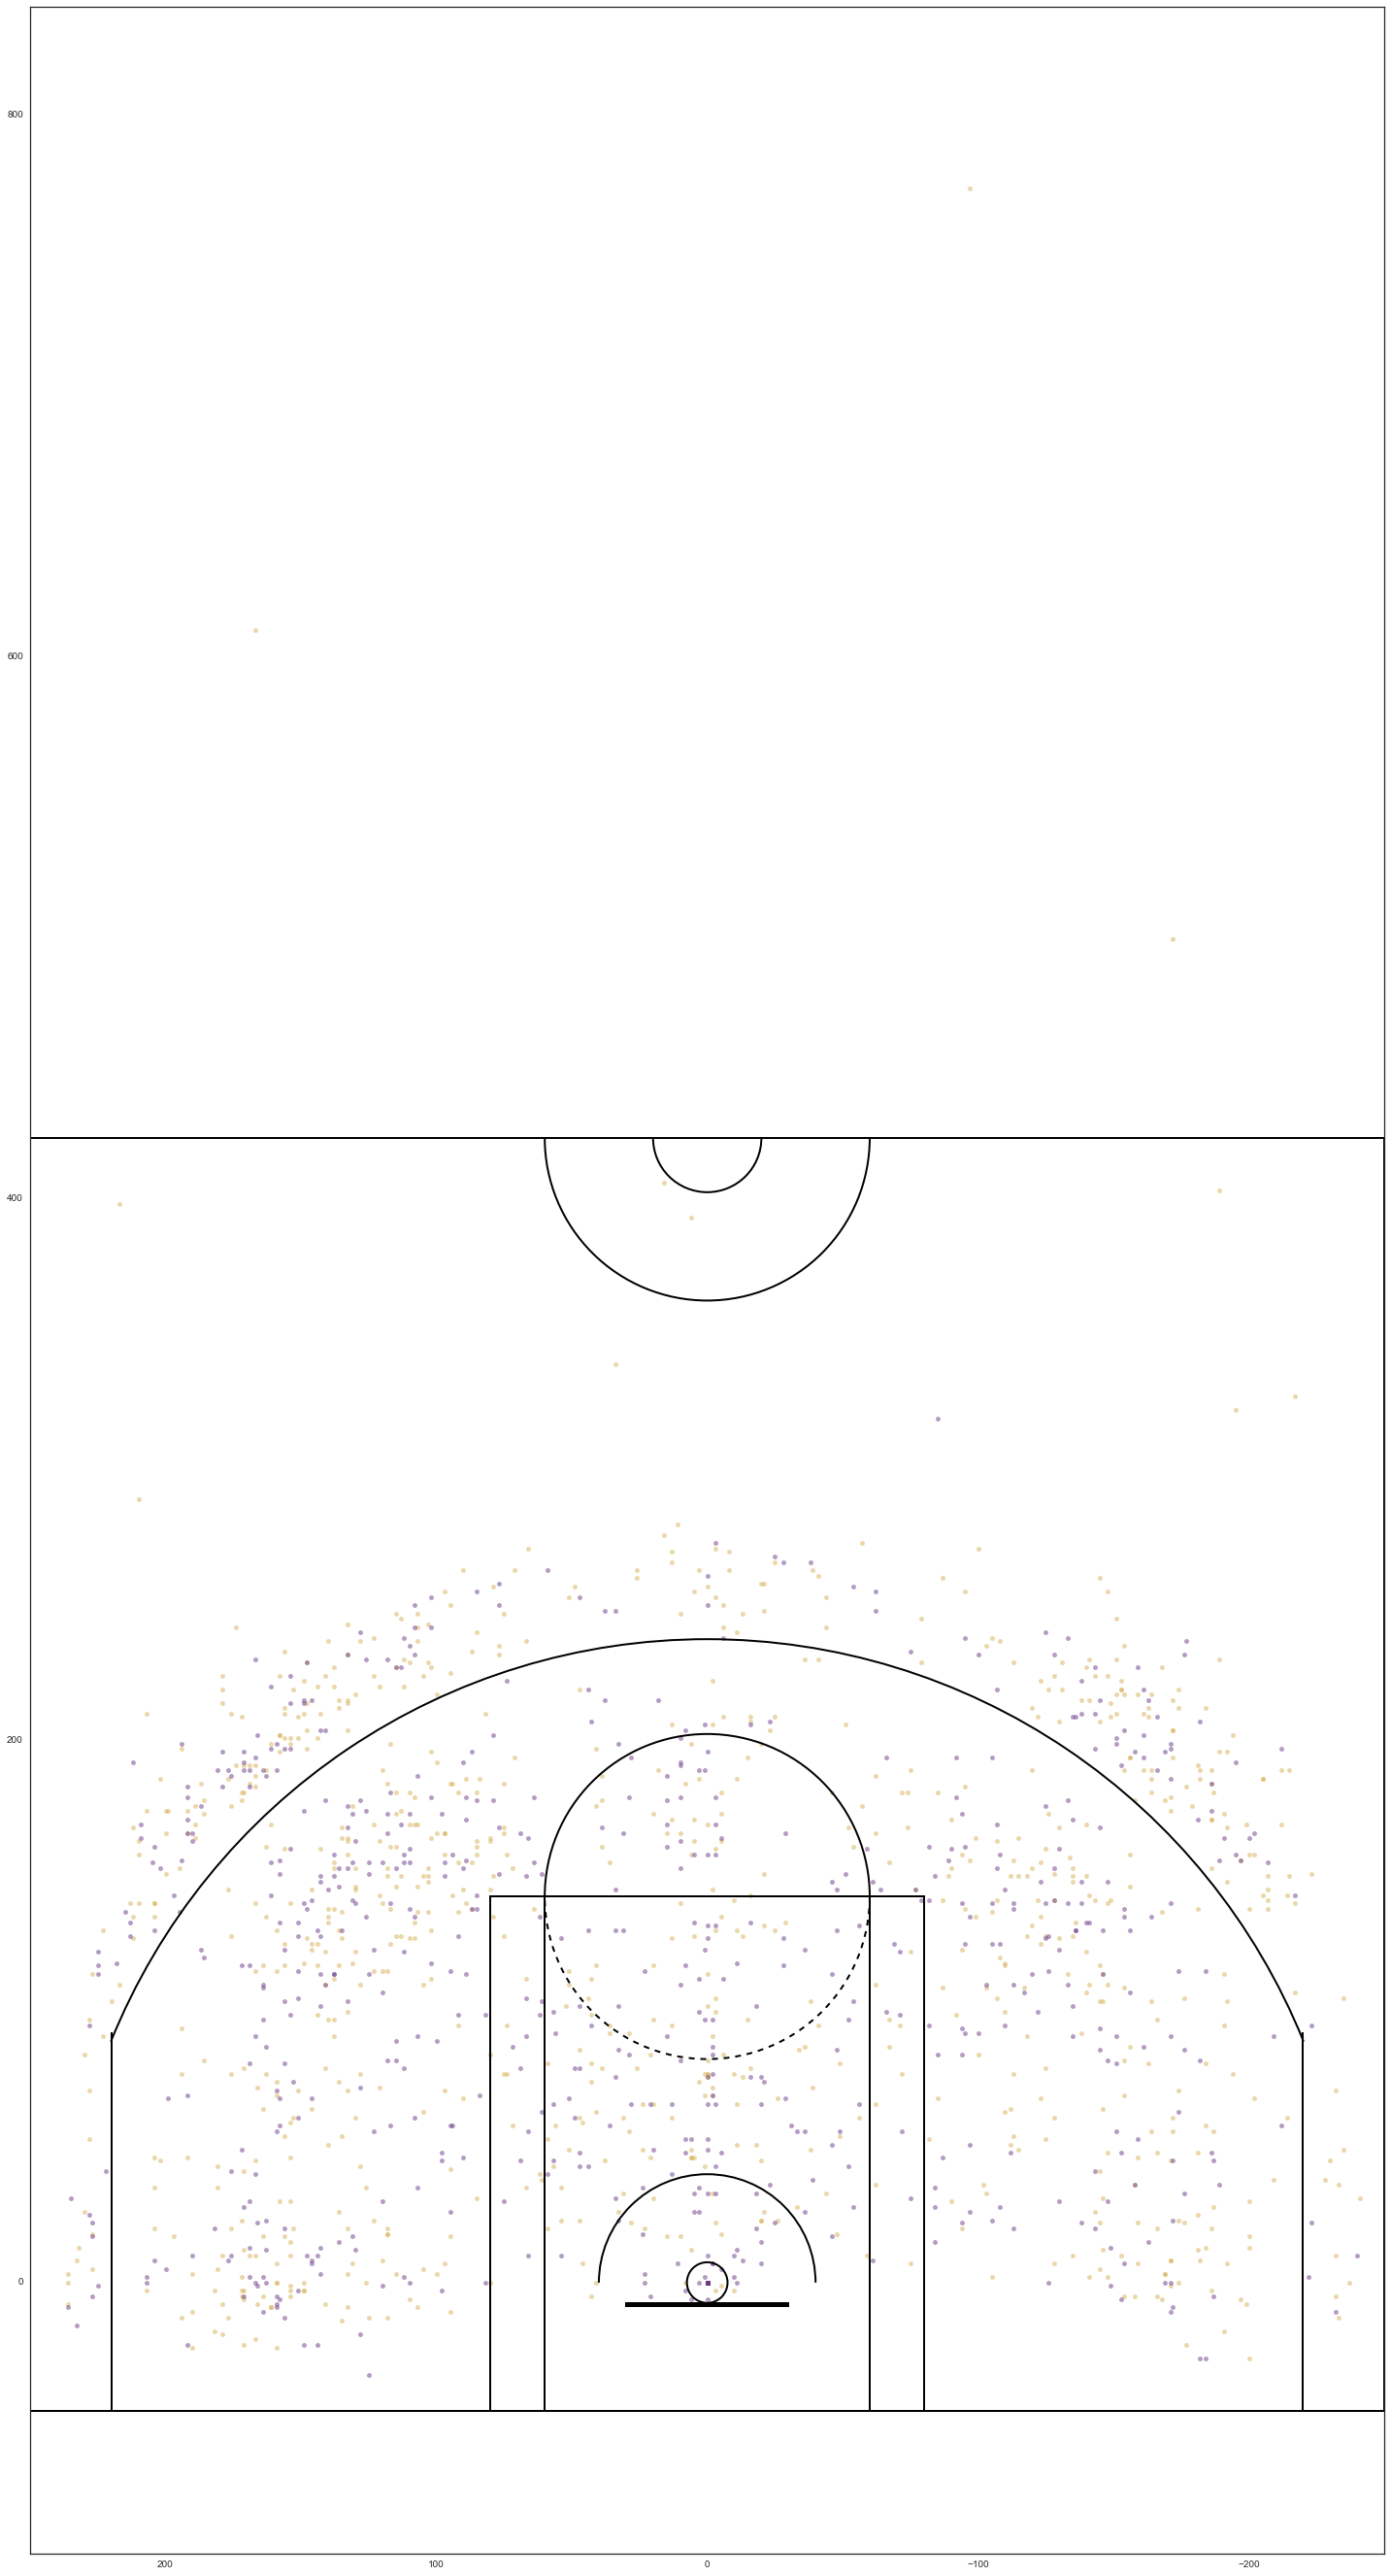

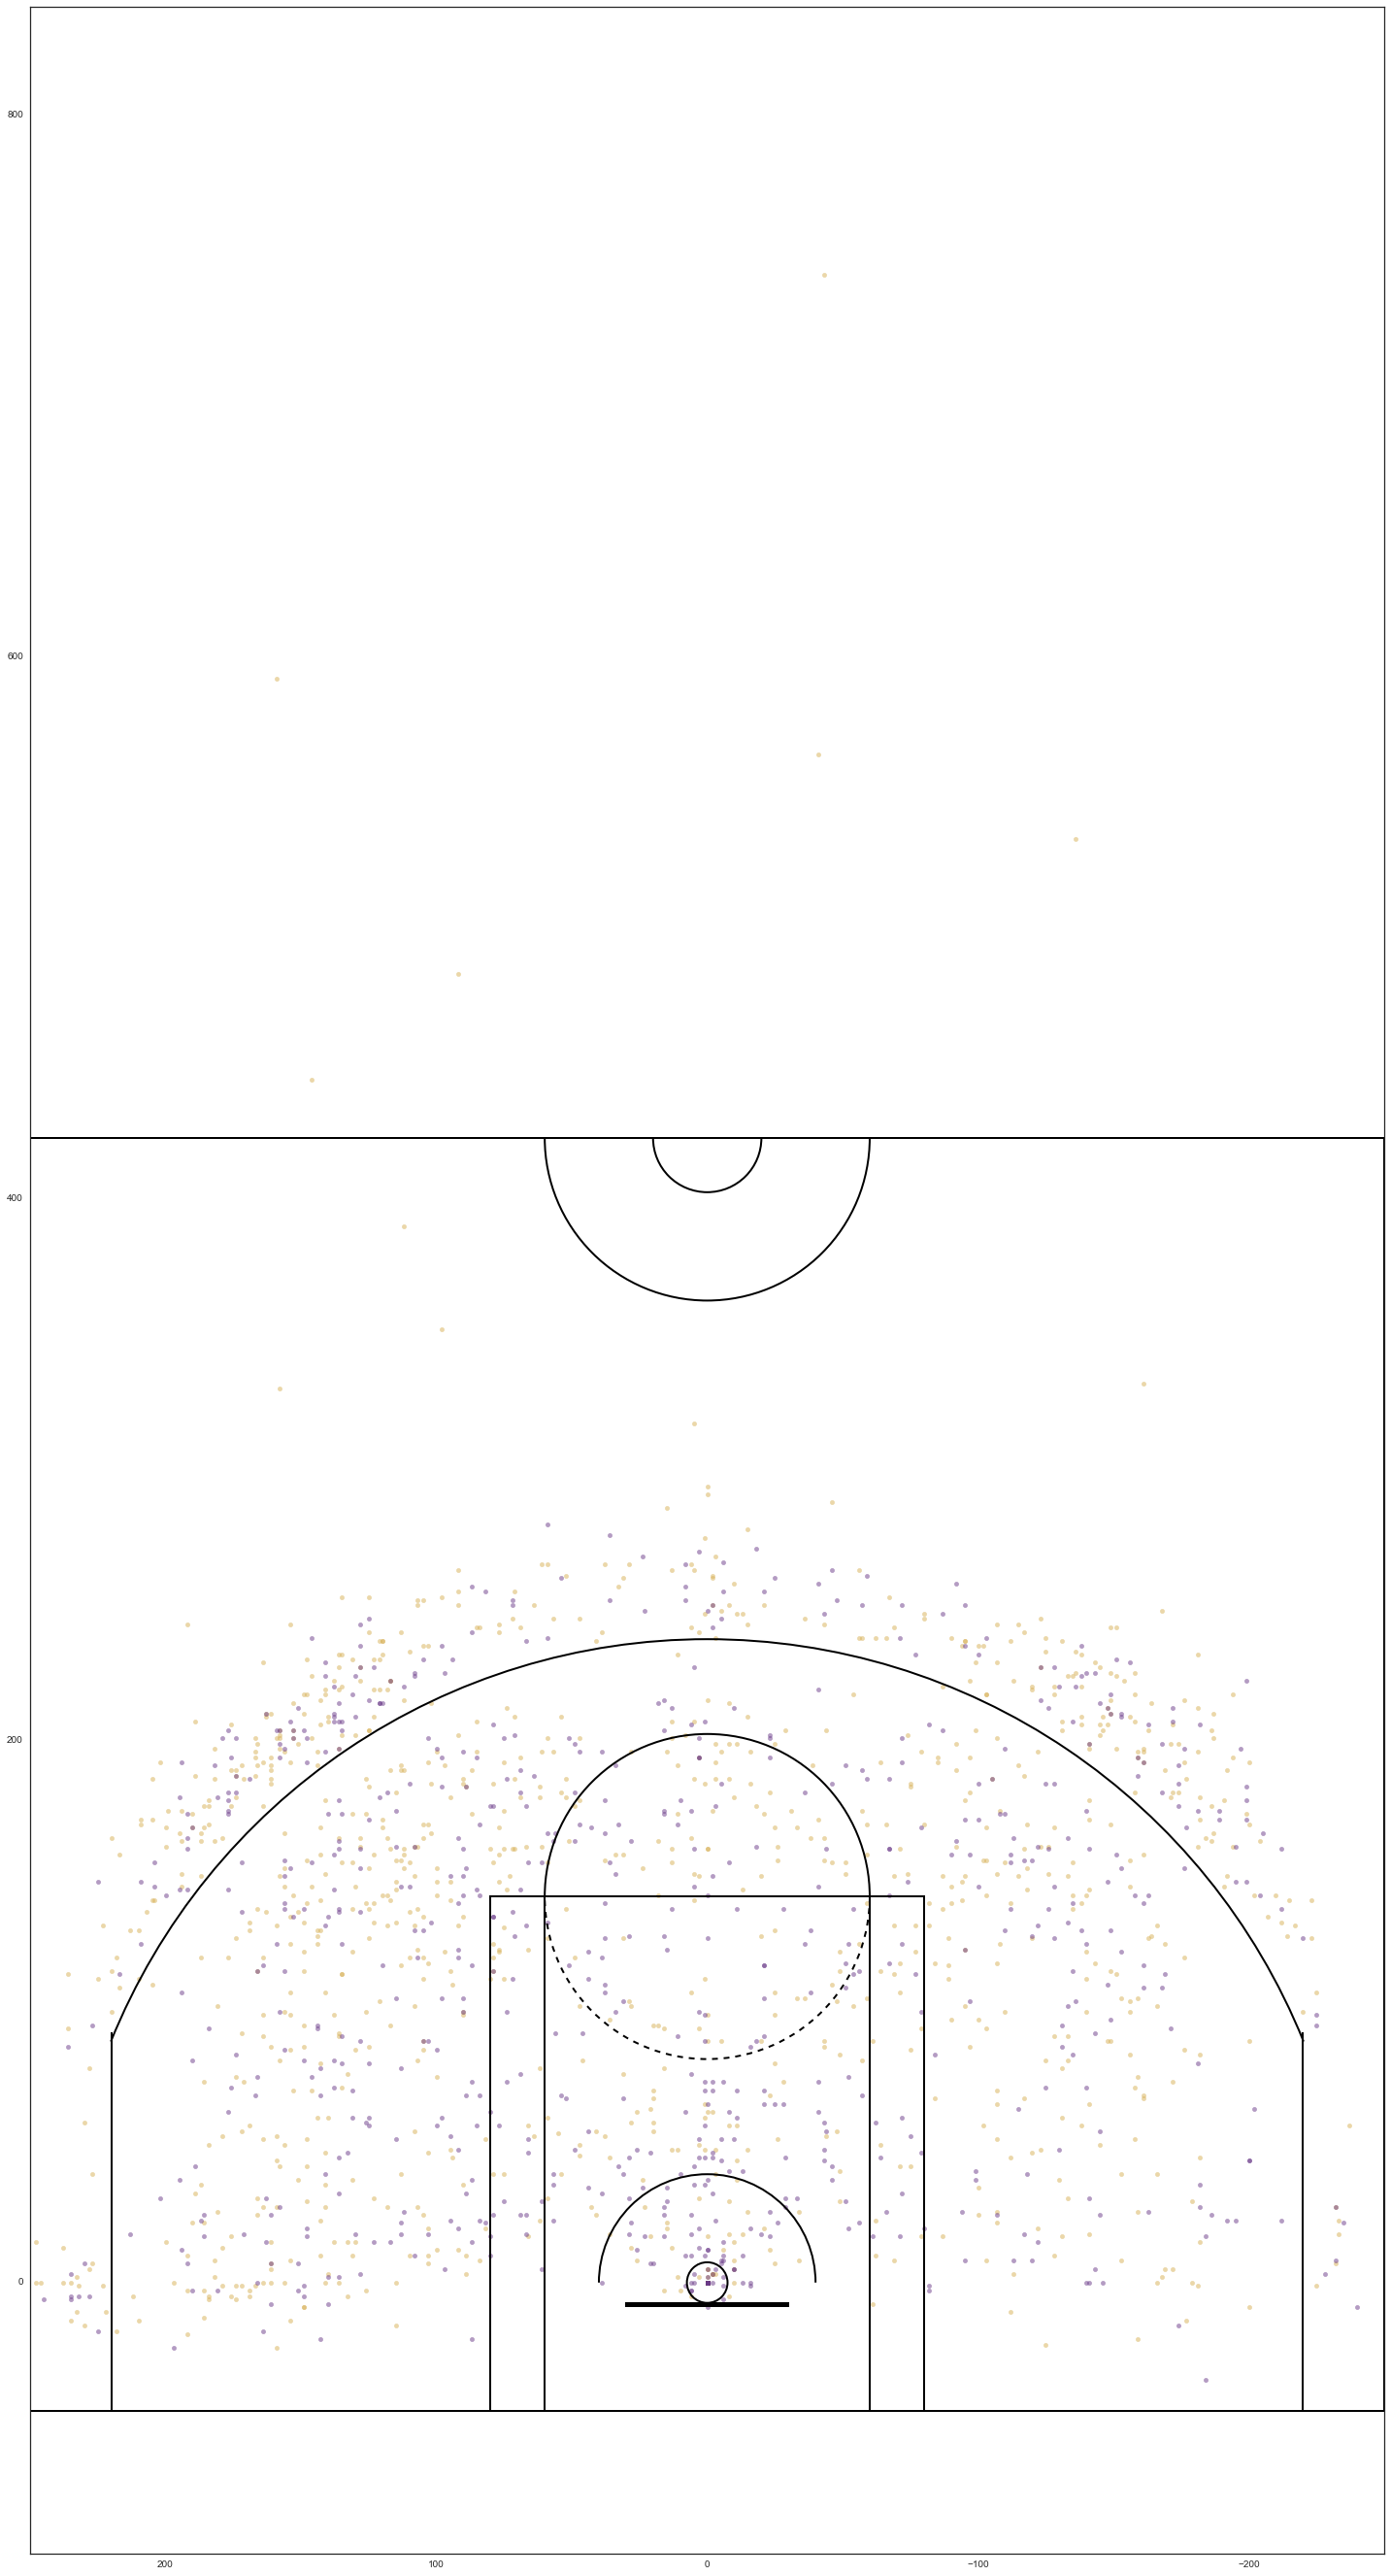

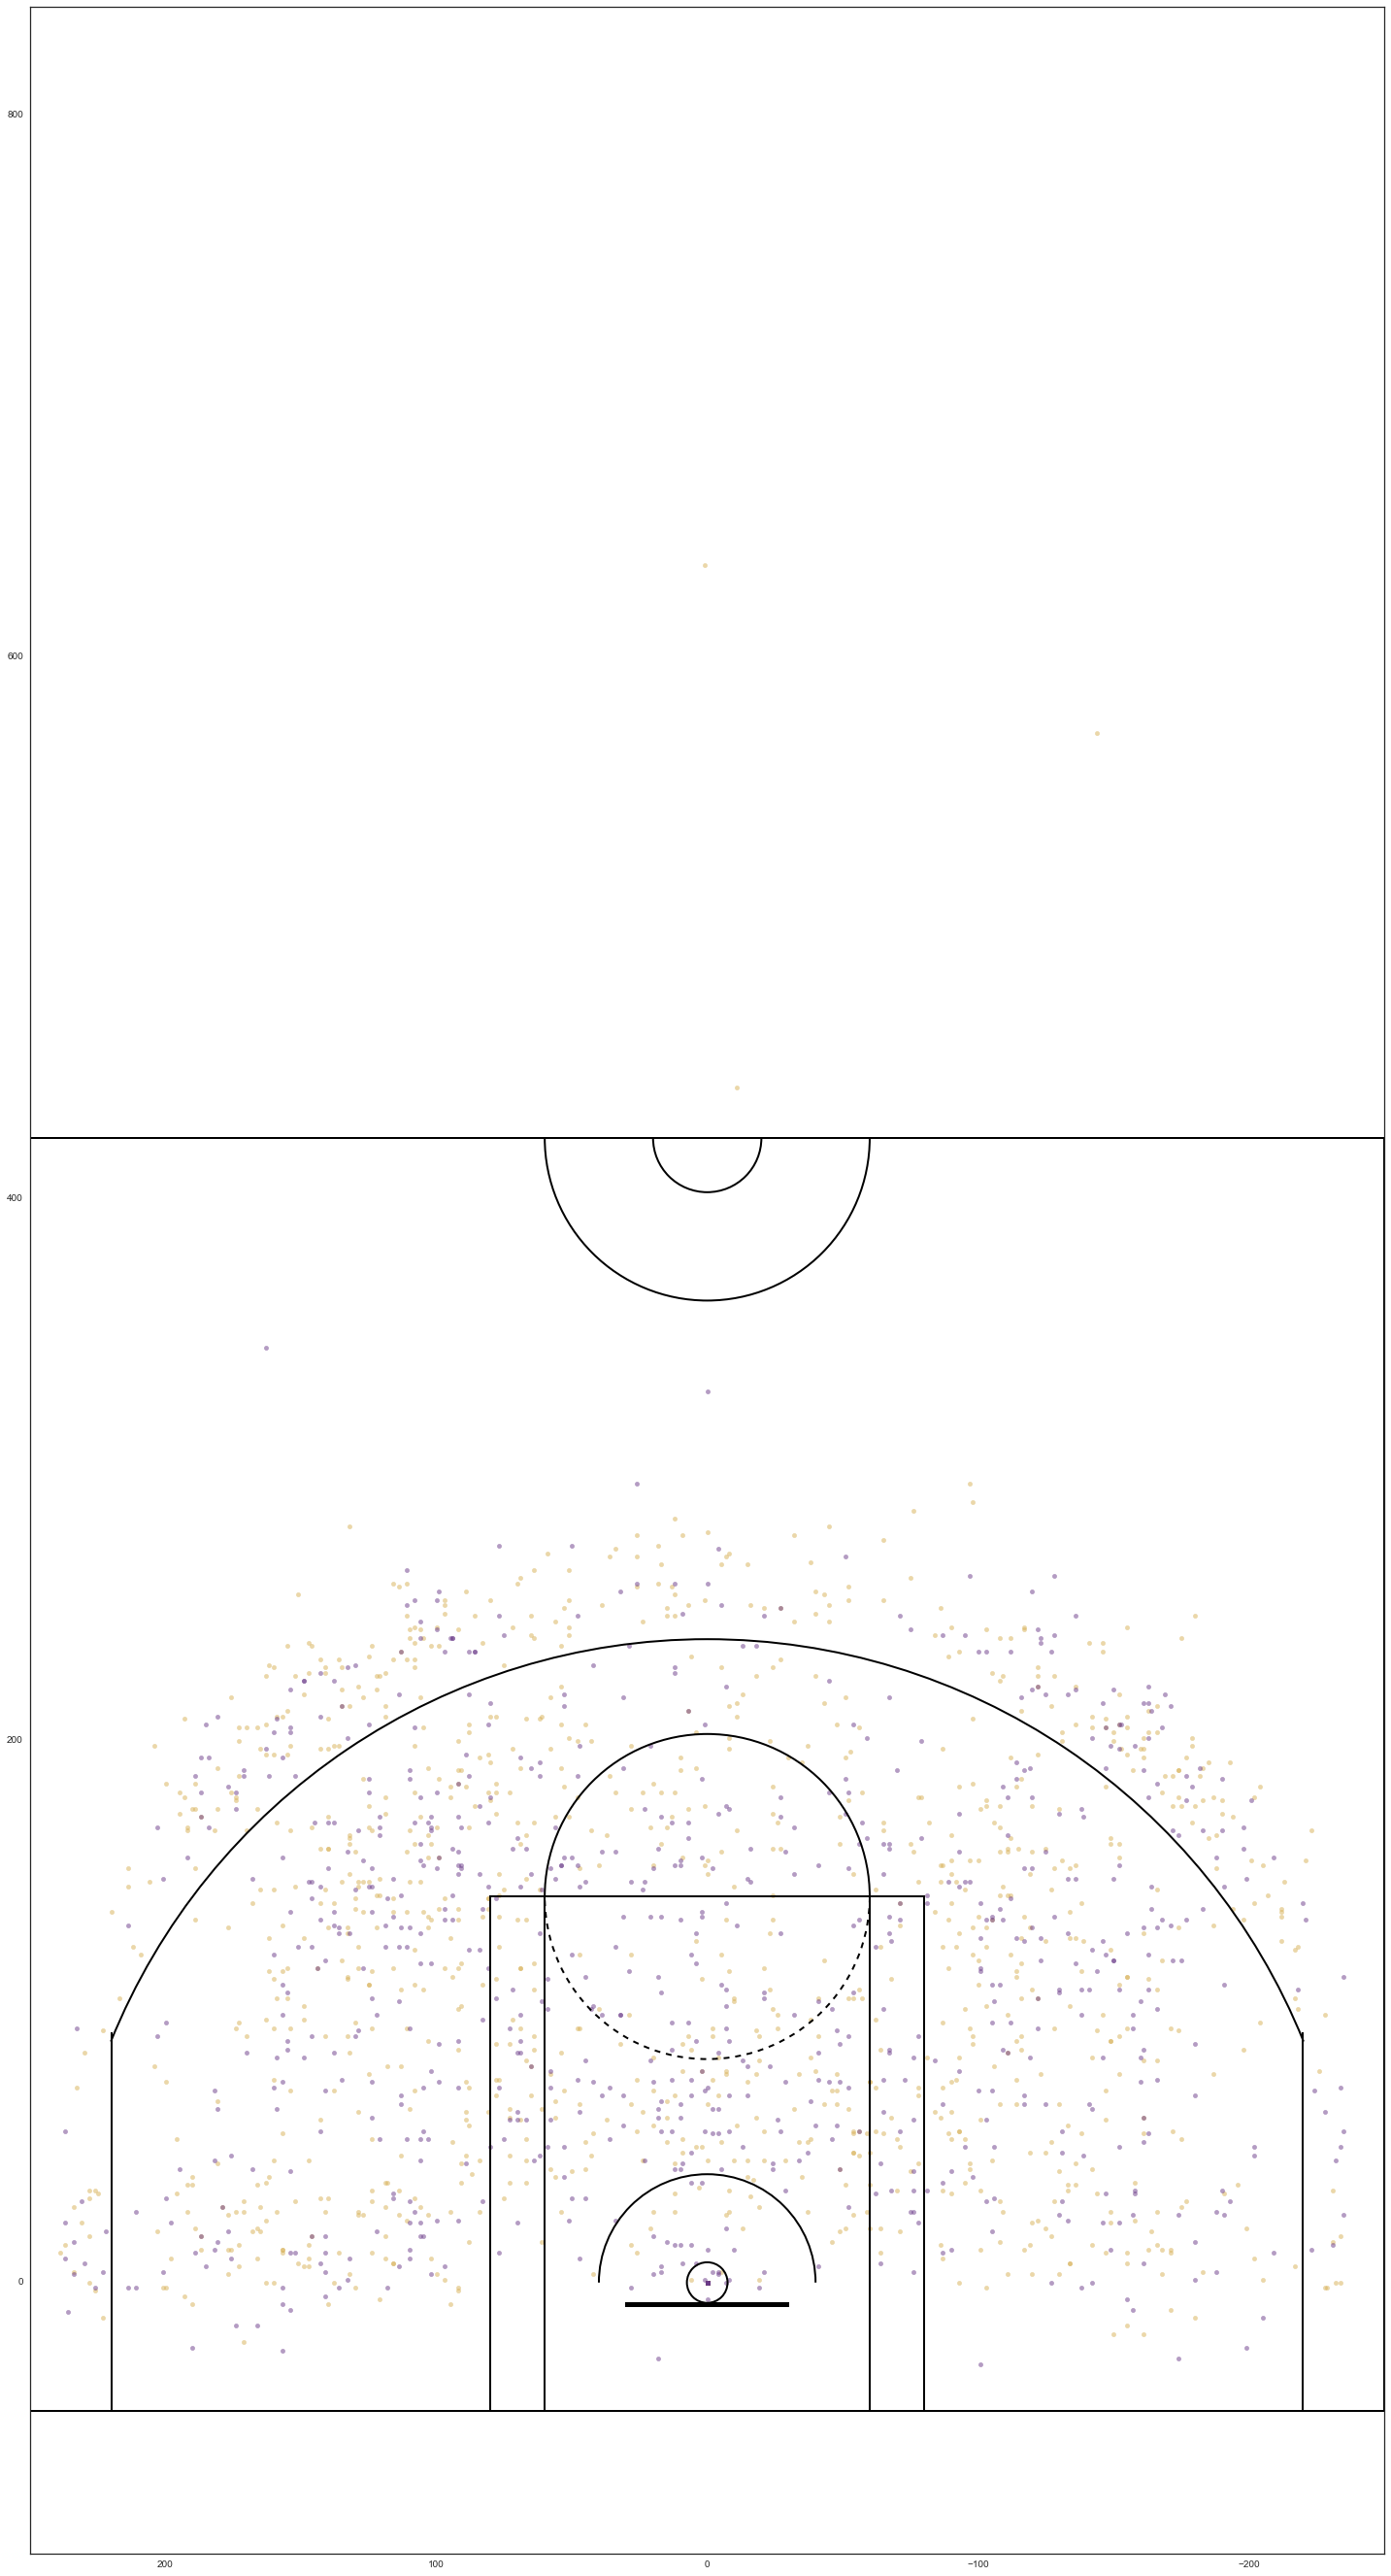

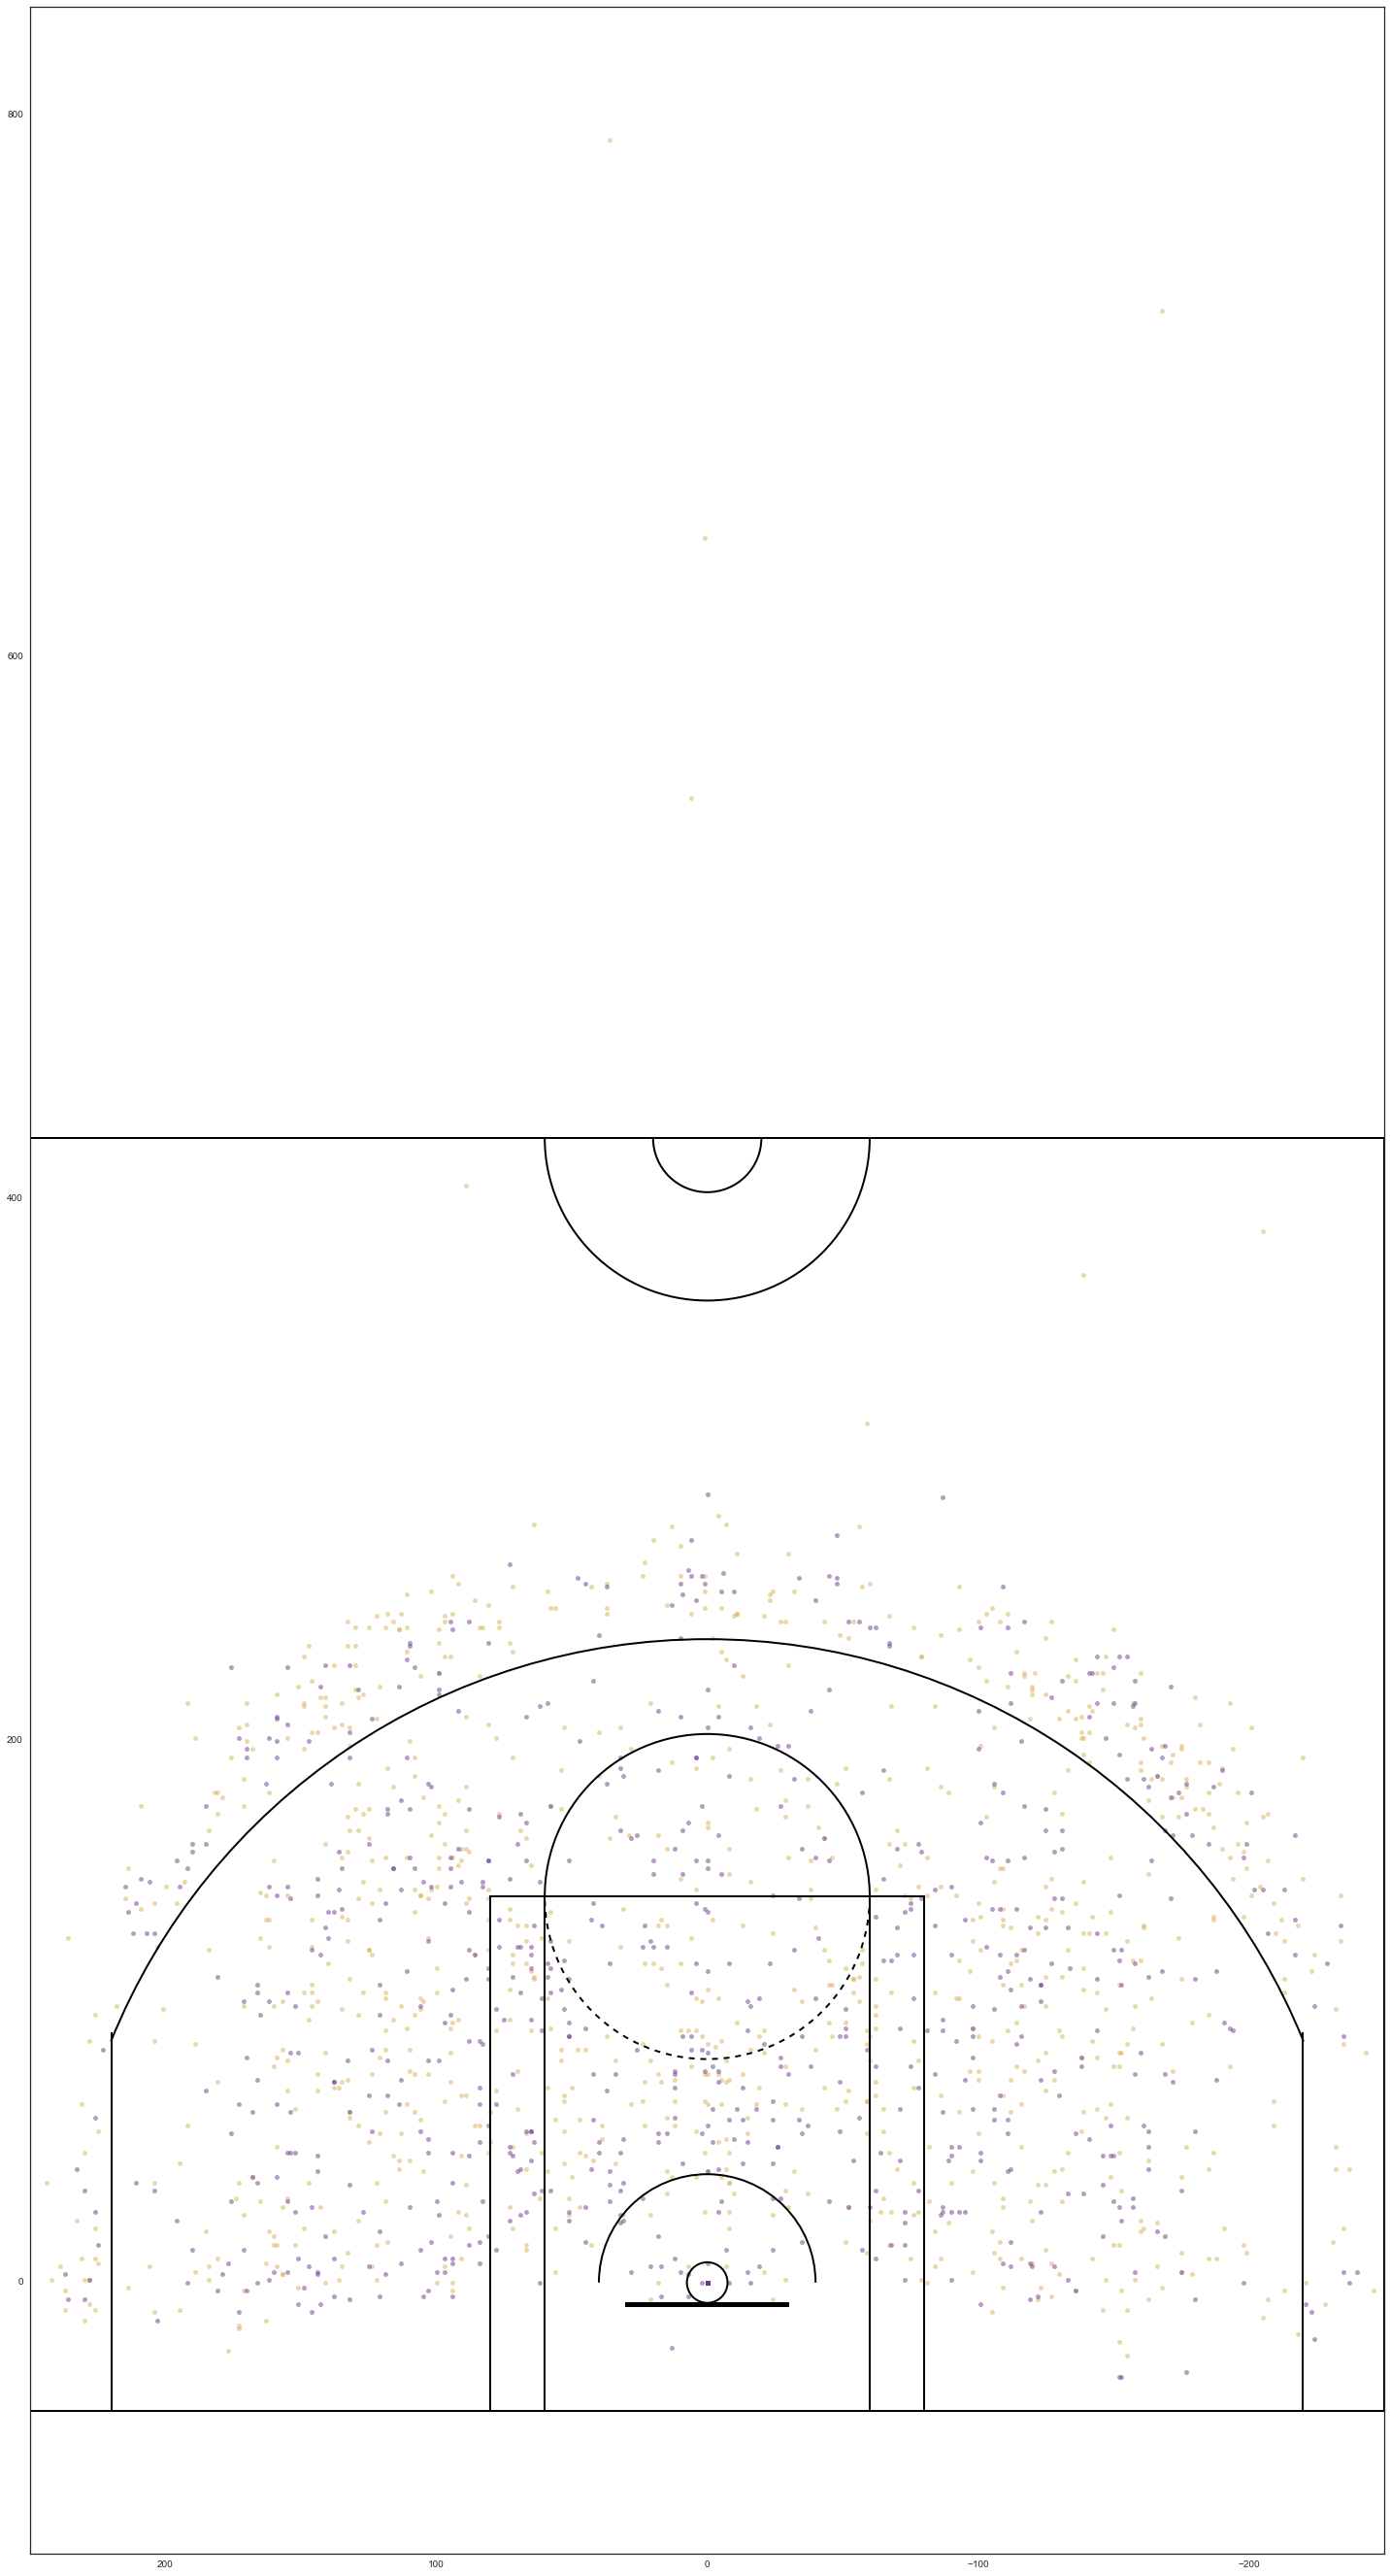

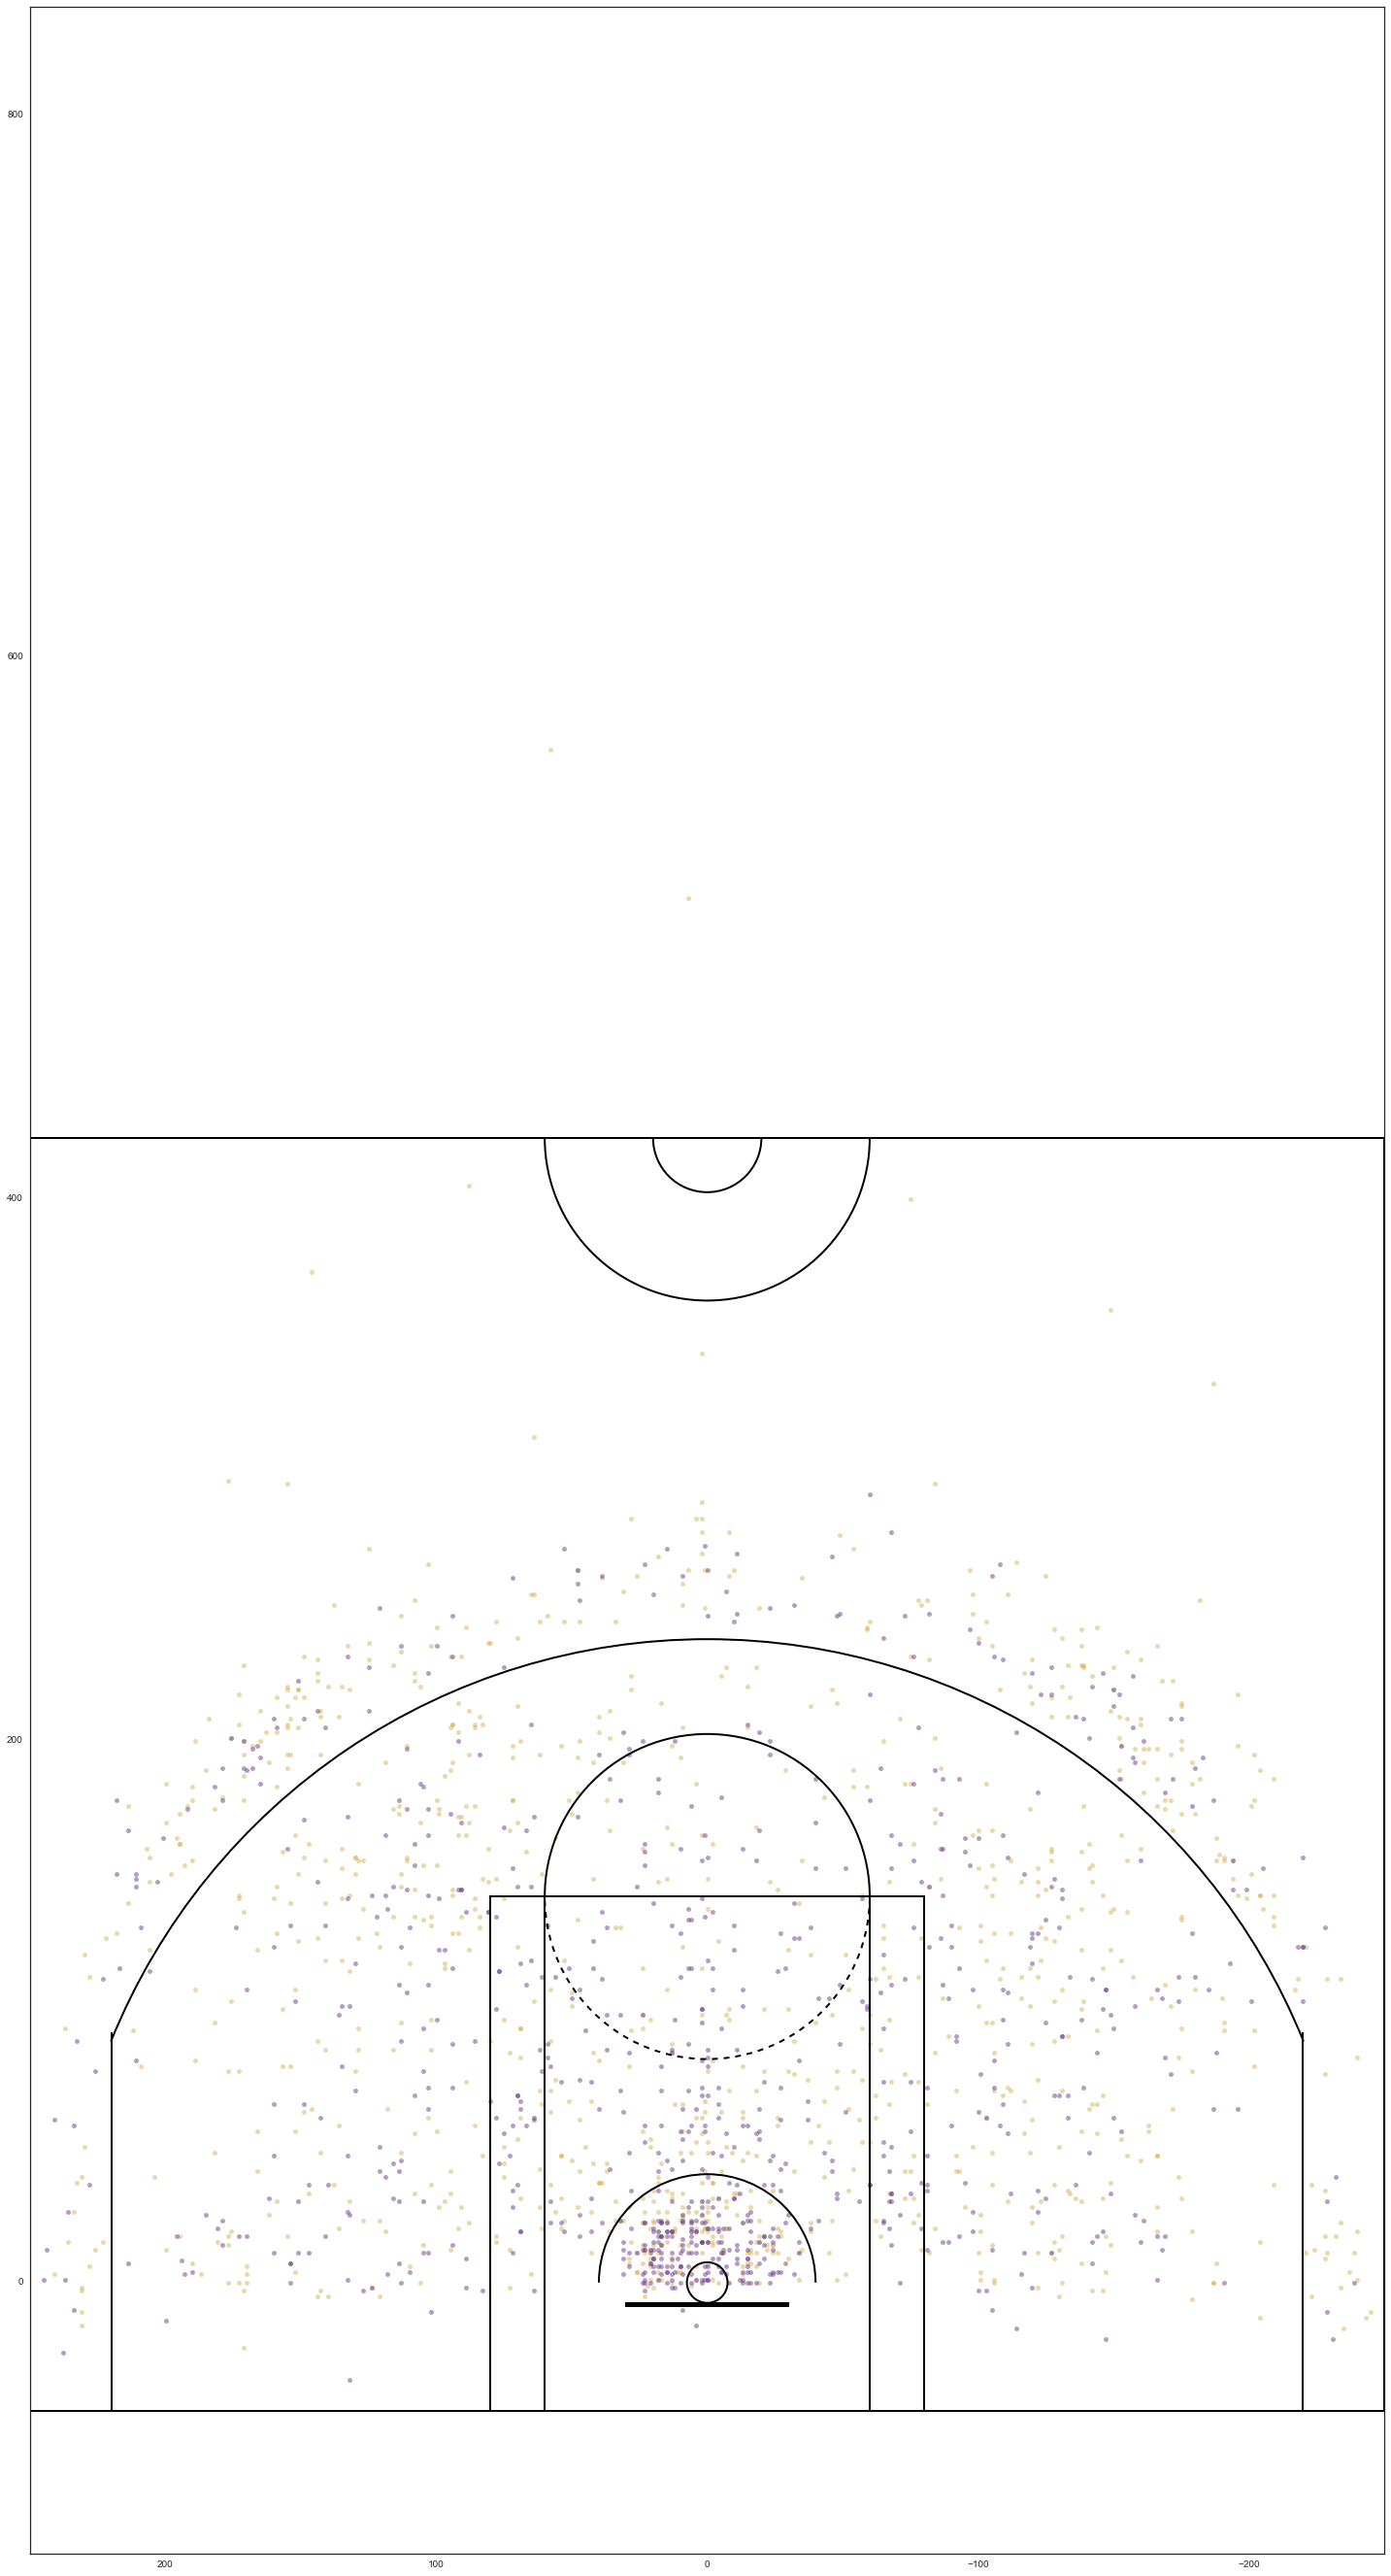

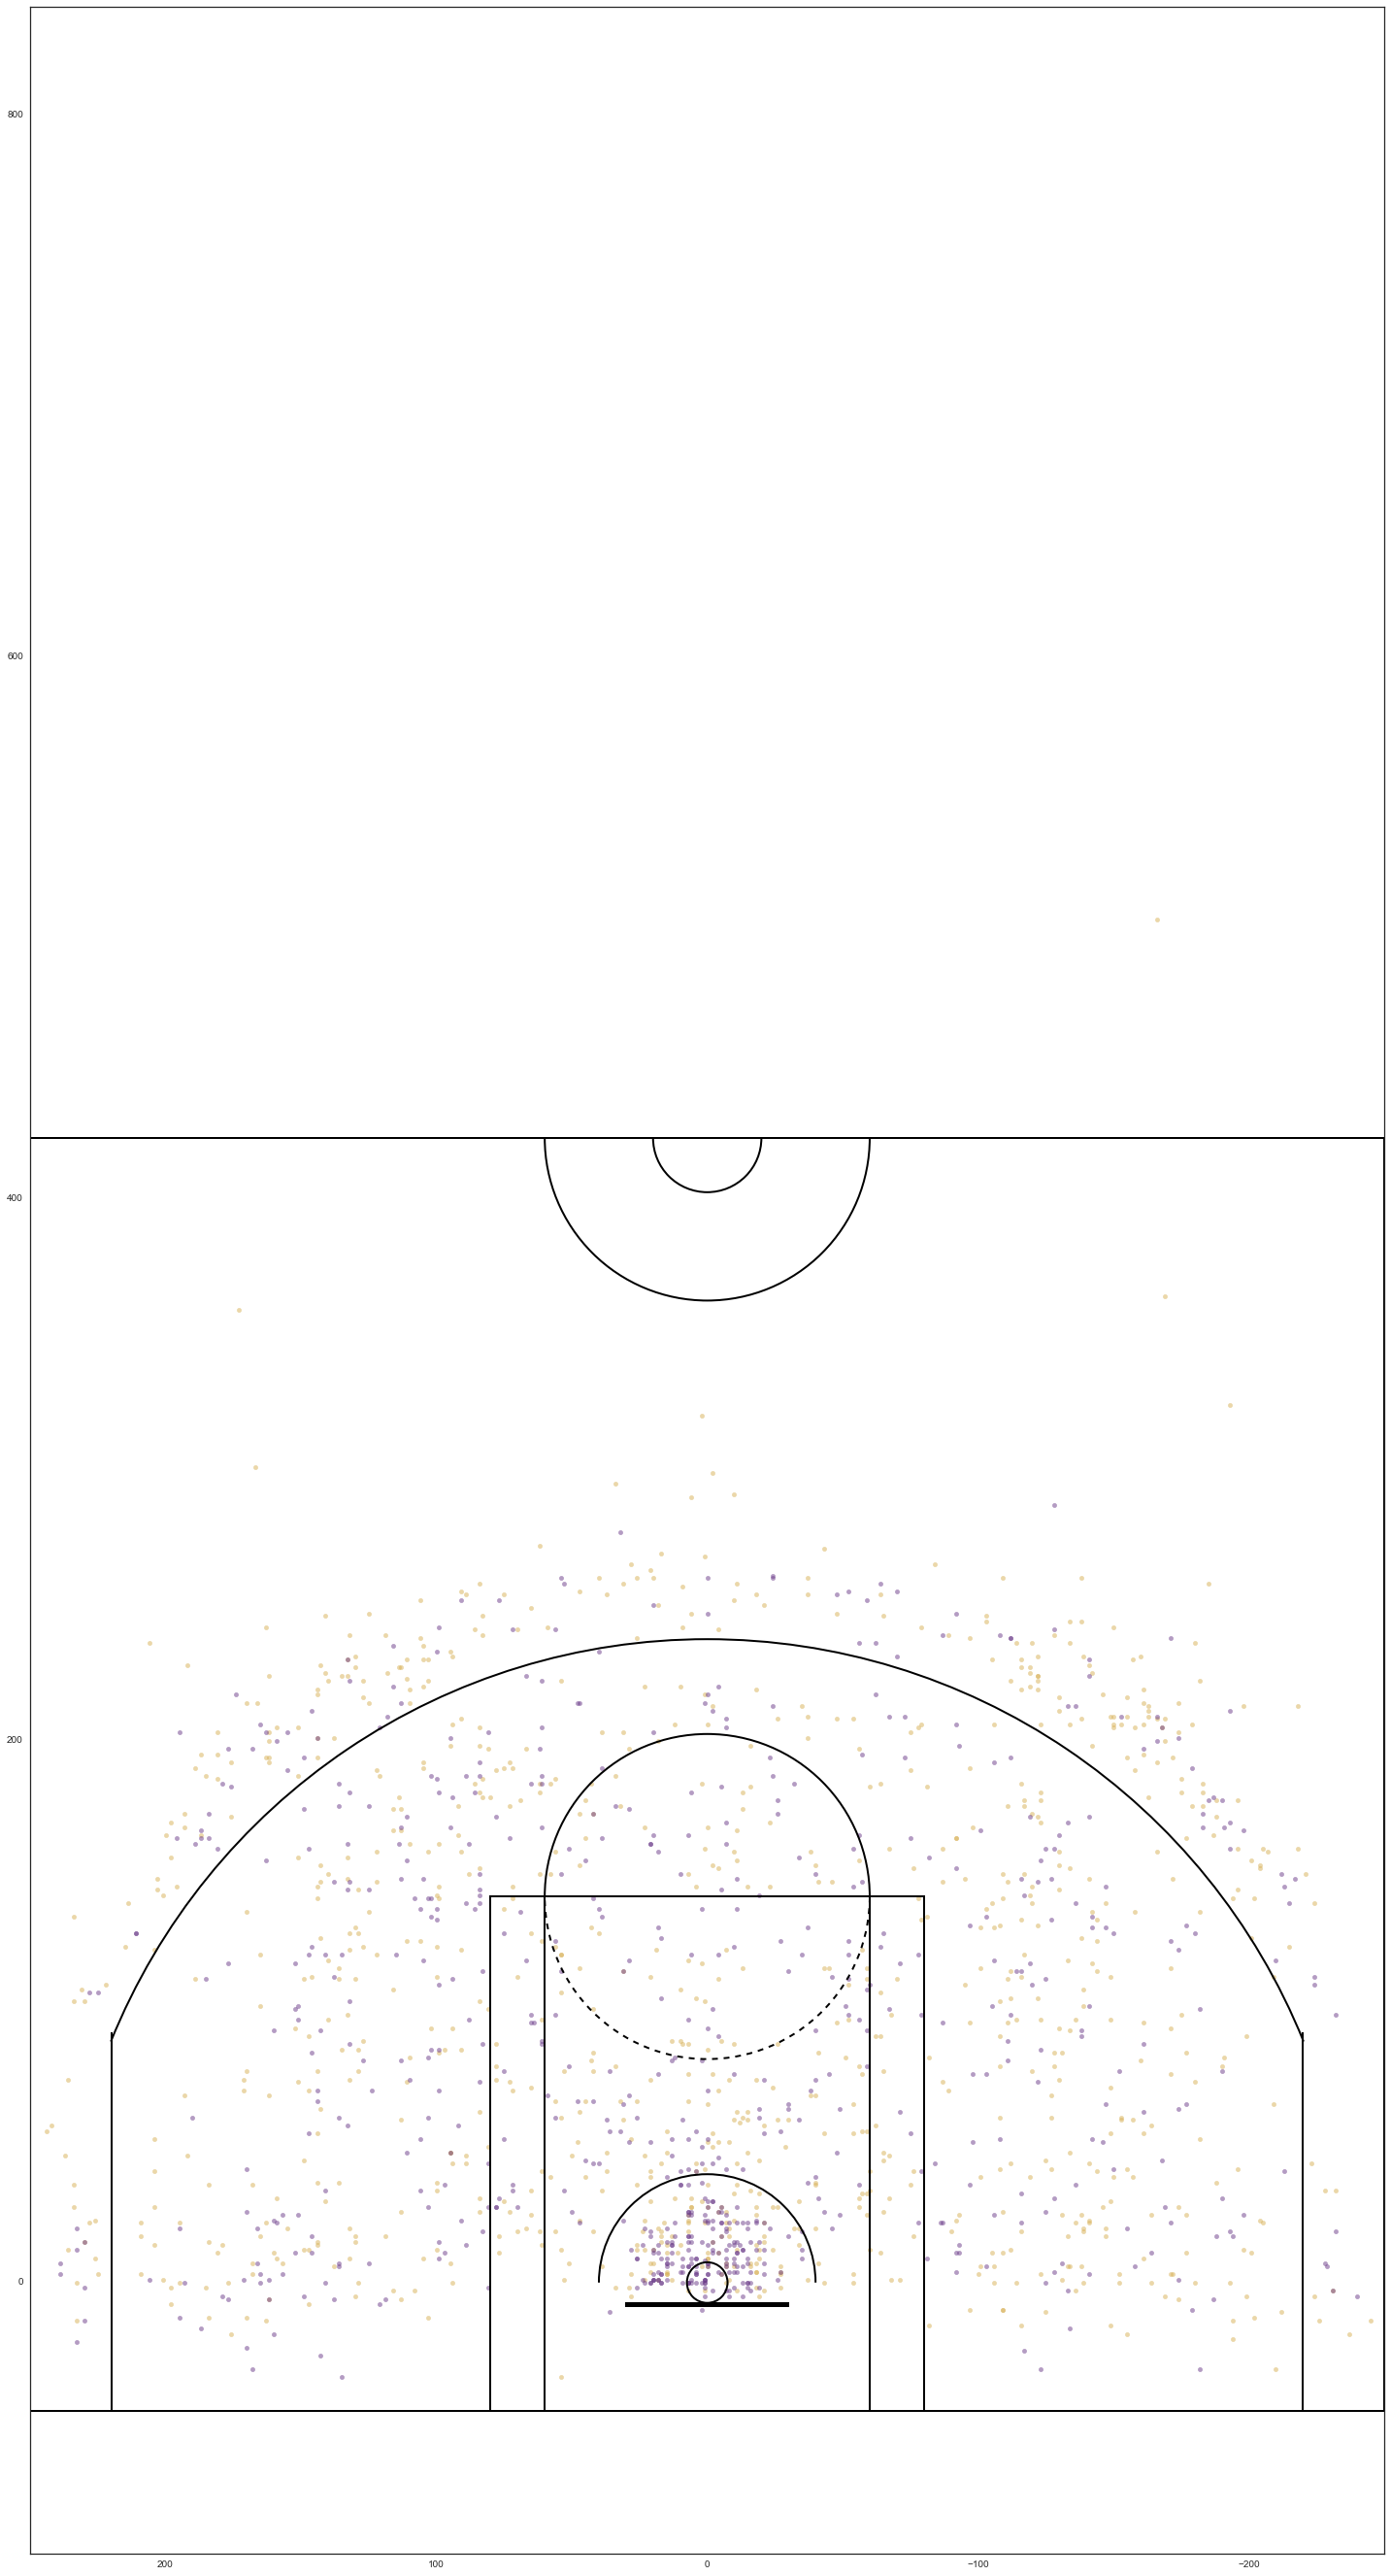

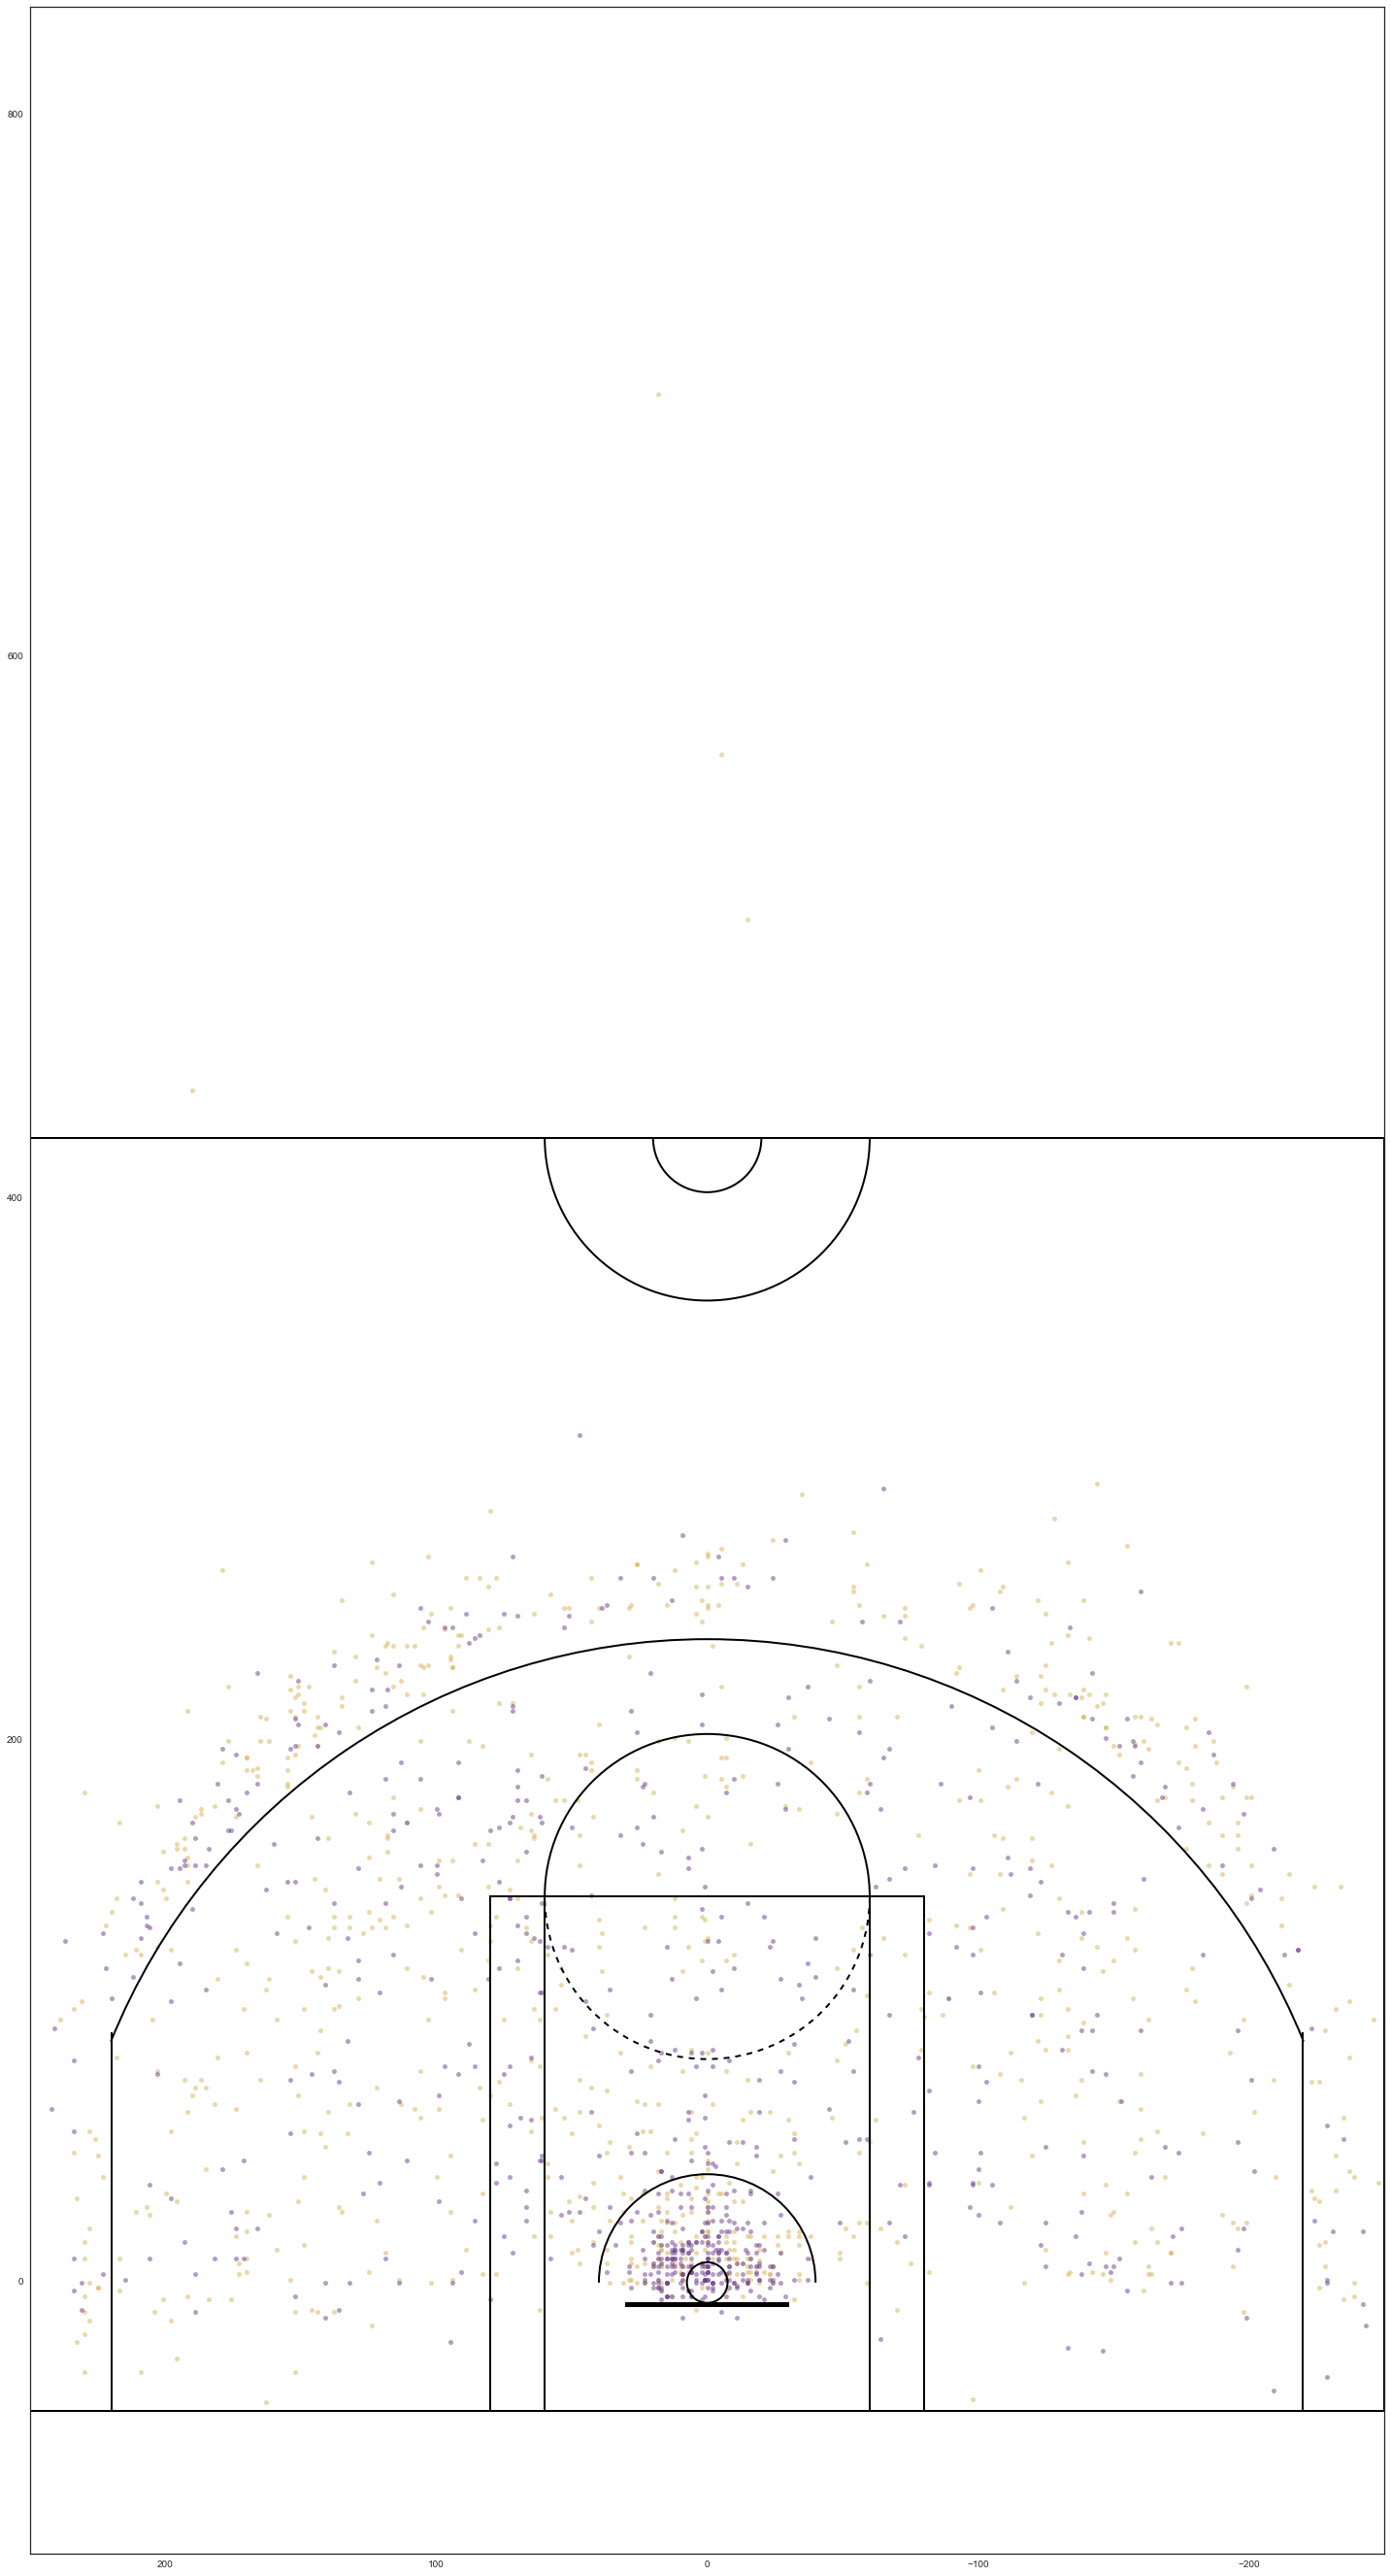

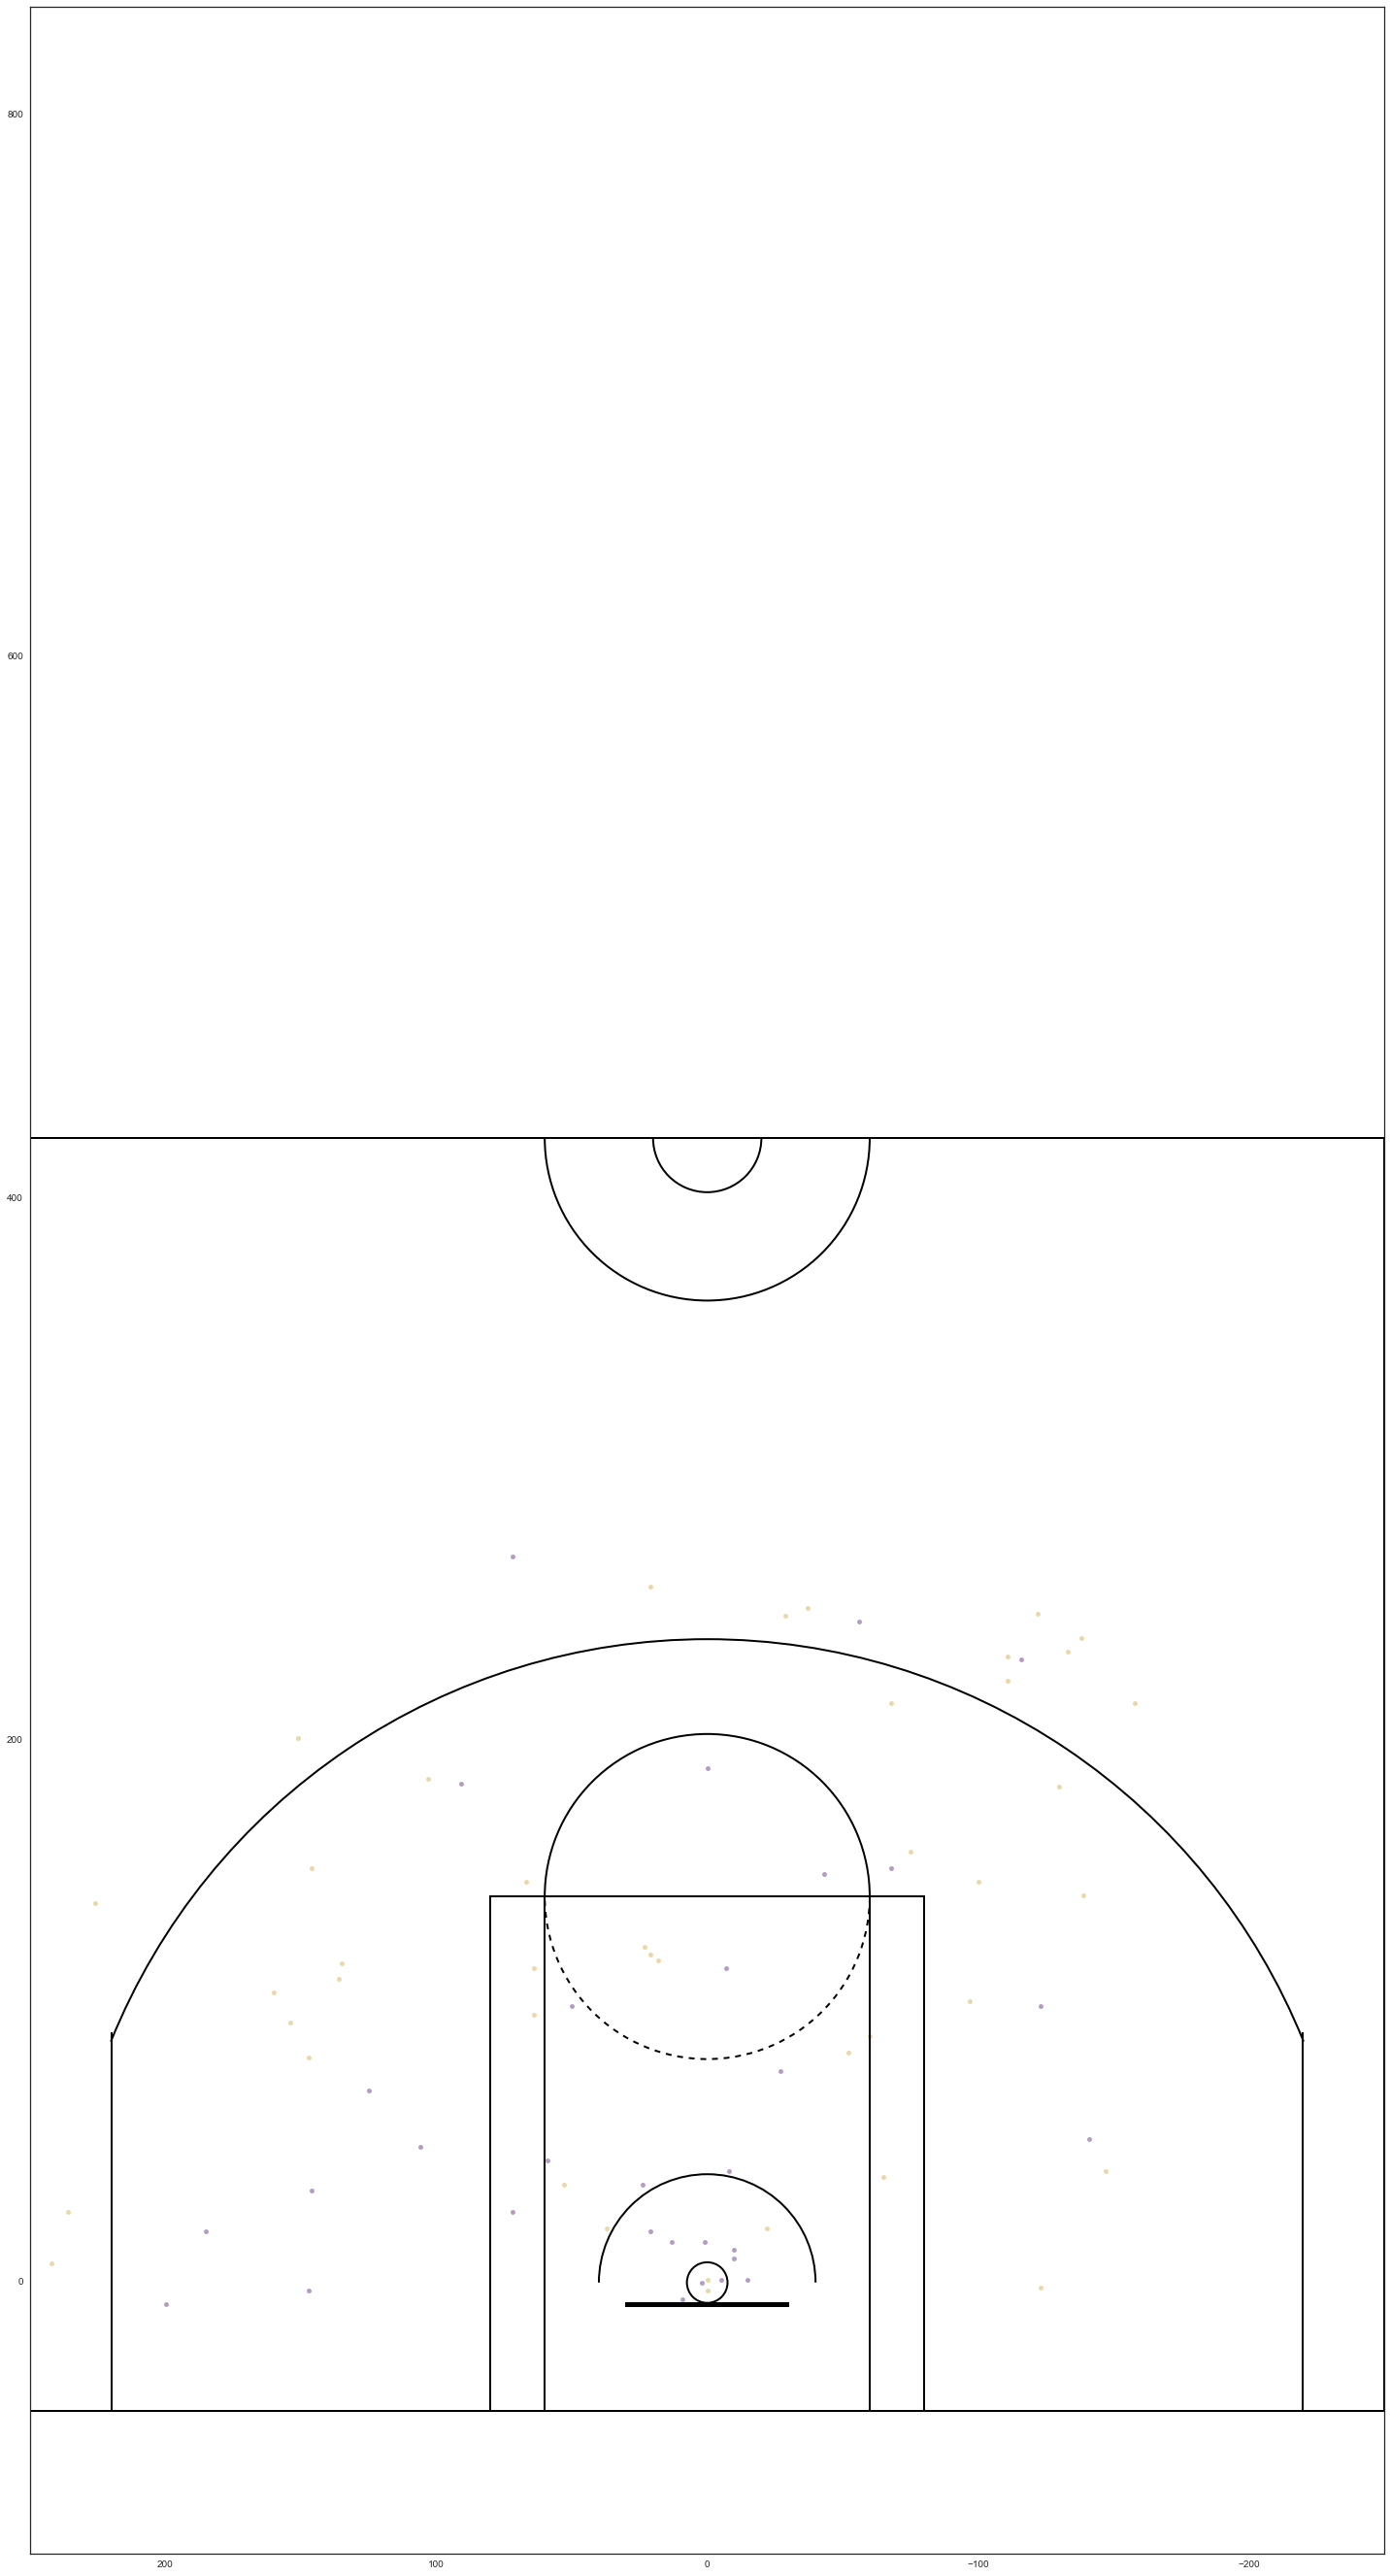

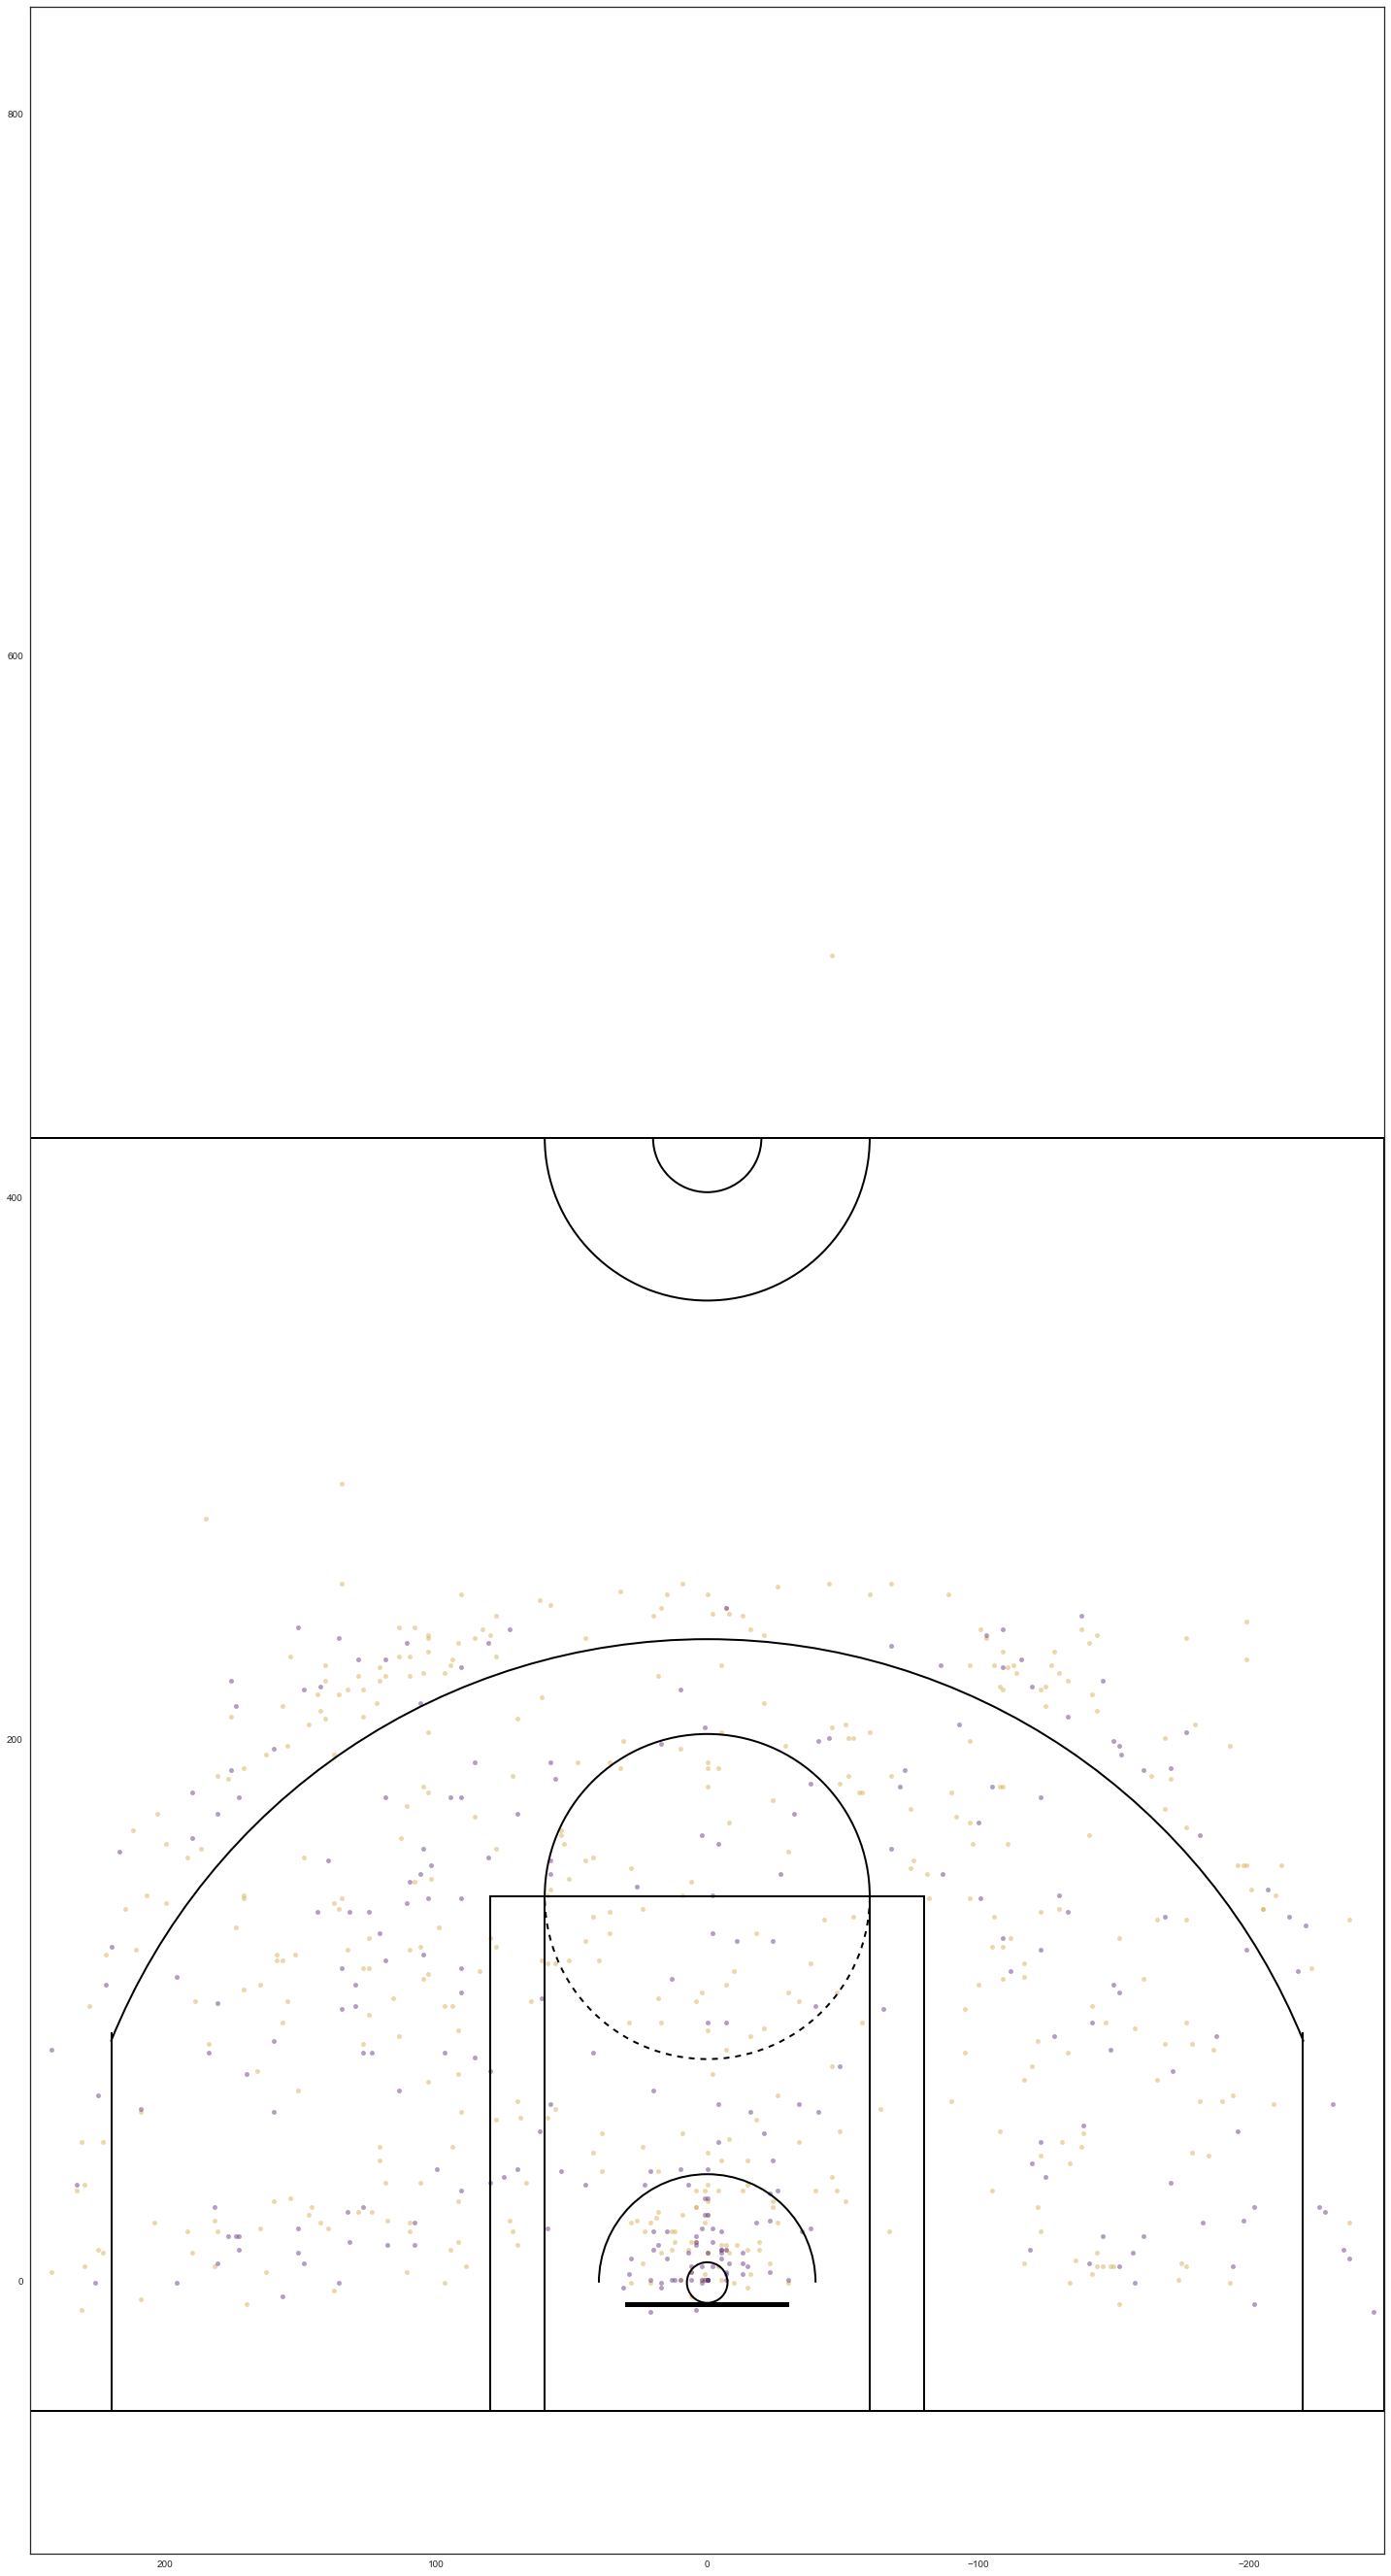

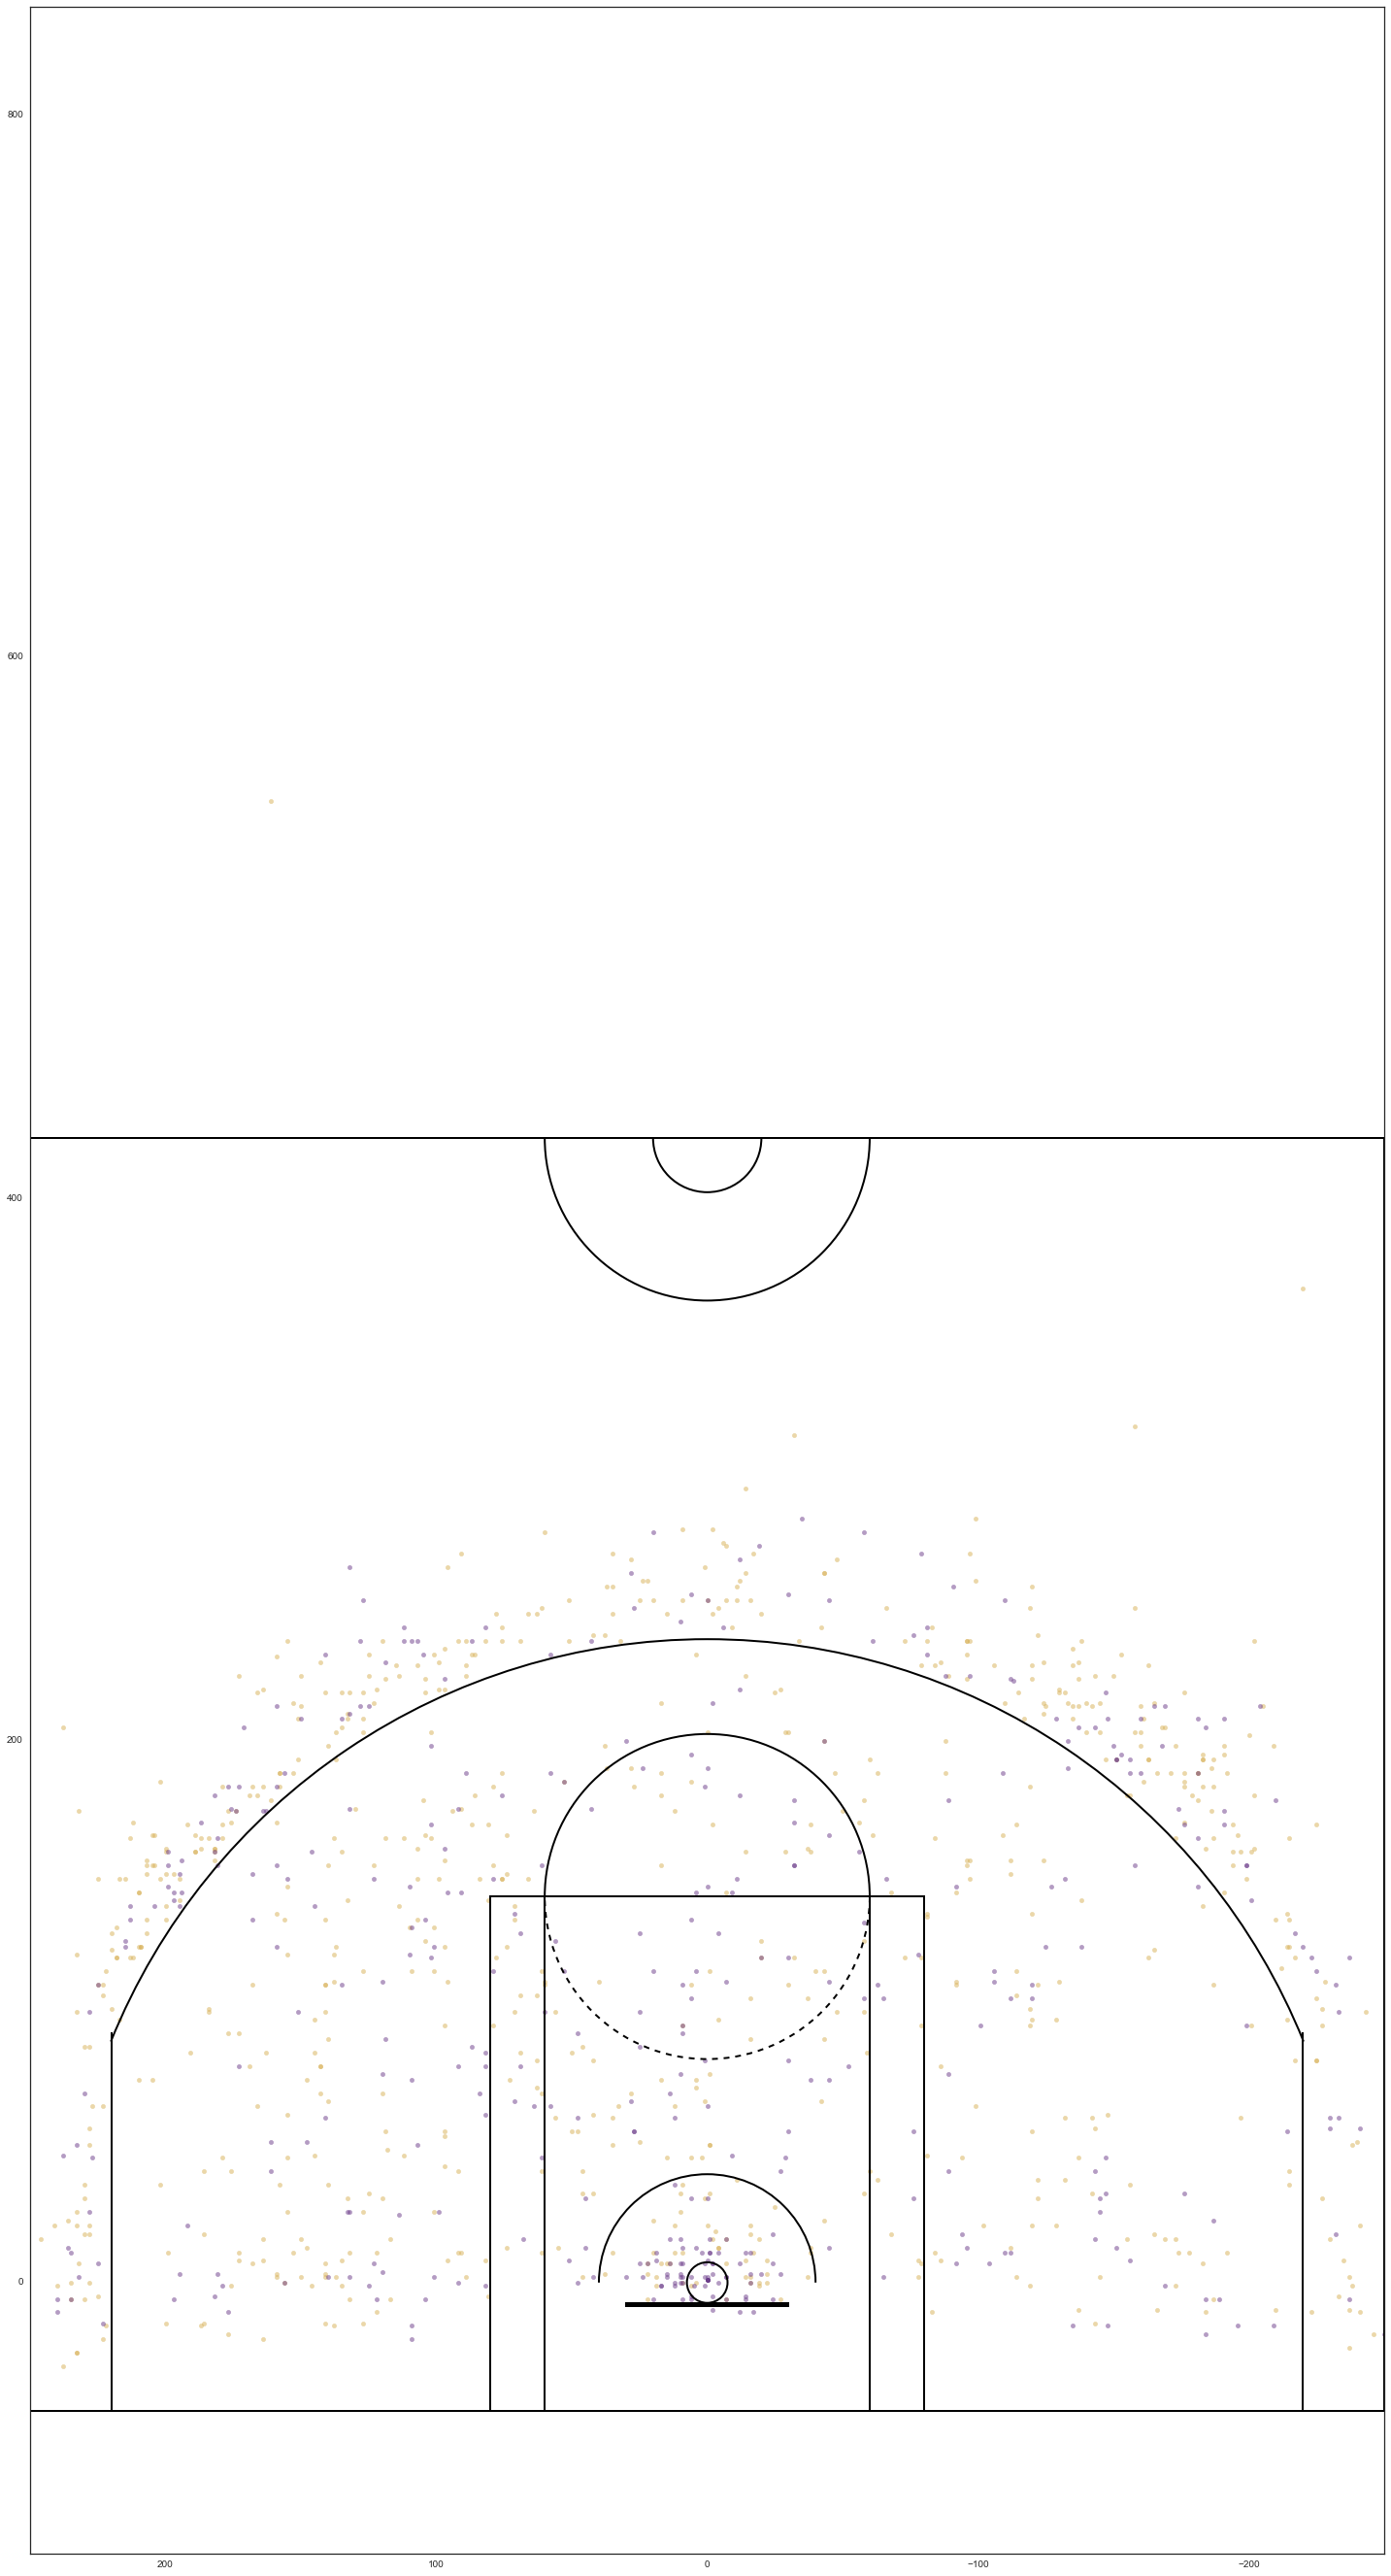

In [23]:
# loop through the seasons and plot all shots
for season in range(1996,2016):

    seasonString = str(season) + '-' + str(season+1)[2:]
    
    sns.set_style("white")
    sns.set_color_codes()
    all_shot_fig = plt.figure(figsize=(25,47),dpi=72)
    all_shot_ax = all_shot_fig.add_subplot(111)
    
    all_shot_ax.set_ylim([-100,840])
    all_shot_ax.set_xlim([250,-250])

    draw_court(ax=all_shot_ax,outer_lines=True)

    # First, draw the missed shots
    all_shot_ax.scatter(kobe_all_shots[
            (kobe_all_shots.SEASON == seasonString) &
            (kobe_all_shots.EVENT_TYPE == "Missed Shot")
        ].LOC_X,
        kobe_all_shots[
            (kobe_all_shots.SEASON == seasonString) &
            (kobe_all_shots.EVENT_TYPE == "Missed Shot")
        ].LOC_Y,color='#d8b055',alpha=0.5)
    
    # Then the made shots
    all_shot_ax.scatter(kobe_all_shots[
            (kobe_all_shots.SEASON == seasonString) &
            (kobe_all_shots.EVENT_TYPE == "Made Shot")
        ].LOC_X,
        kobe_all_shots[
            (kobe_all_shots.SEASON == seasonString) &
            (kobe_all_shots.EVENT_TYPE == "Made Shot")
        ].LOC_Y,color='#6a3a89',alpha=0.5)

    # save an svg of each season
#     all_shot_fig.savefig('shotchart_' + season_string + '.svg')

# Get game logs
Some of the data (opponent and date in particular) are not included in the shot logs, so we have to get Kobe's game logs, too.

In [72]:
# Get all Kobe game logs from 1996 to 2016
seasons_games = []
for season in range(1996,2016):
    # get regular season game logs
    gamelog_url = 'http://stats.nba.com/stats/playergamelog?LeagueID=00&PerMode=PerGame&PlayerID='+ playerID +'&Season='+str(season) + '-' + str(season+1)[2:]+'&SeasonType=Regular+Season'
    response = requests.get(gamelog_url, headers=HEADERS)
    
    headers = response.json()['resultSets'][0]['headers']
    gamelogs = response.json()['resultSets'][0]['rowSet']
    gamelog_df = pd.DataFrame(gamelogs, columns=headers)
    gamelog_df['SEASON'] = str(season) + '-' + str(season+1)[2:]
    
    
    seasons_games.append(gamelog_df)
    
    # get playoff game logs
    gamelog_url = 'http://stats.nba.com/stats/playergamelog?LeagueID=00&PerMode=PerGame&PlayerID='+ playerID +'&Season='+str(season) + '-' + str(season+1)[2:]+'&SeasonType=Playoffs'
    response = requests.get(gamelog_url, headers=HEADERS)
    
    headers = response.json()['resultSets'][0]['headers']
    gamelogs = response.json()['resultSets'][0]['rowSet']
    gamelog_df = pd.DataFrame(gamelogs, columns=headers)
    gamelog_df['SEASON'] = str(season) + '-' + str(season+1)[2:]
    seasons_games.append(gamelog_df)

In [74]:
kobe_game_logs = pd.concat(seasons_games)

In [75]:
# Grab opponent from matchuip and condense some opponent names
kobe_game_logs["OPPONENT"] = kobe_game_logs["MATCHUP"].str[-3:]
kobe_game_logs.replace(to_replace={
        'OPPONENT': {
            "CHH":"CHA",
            "NOK":"NOP",
            "PHO":"PHX",
            "SAN":"SAS",
            "UTH":"UTA"
        }
    }, regex=True, inplace=True)
kobe_game_logs.OPPONENT.value_counts().sort_index()

# save to csv
# kobe_game_logs.to_csv("kobe_game_logs.csv")

ATL    29
BKN     3
BOS    44
CHA    31
CHI    31
CLE    34
DAL    64
DEN    83
DET    38
GSW    67
HOU    77
IND    39
LAC    69
MEM    49
MIA    33
MIL    32
MIN    76
NJN    28
NOH    31
NOP    16
NYK    34
OKC    33
ORL    34
PHI    37
PHX    87
POR    83
SAC    80
SAS    91
SEA    46
TOR    33
UTA    84
VAN    18
WAS    32
Name: OPPONENT, dtype: int64